# 0. Preliminaries

WARNING #1: this notebook is intended to be run through once. If you save your progress without finishing, you may need to comment out lines that you have already run, so that you don't start all over from scratch.

WARNING #2: this notebook has only been tested on Linux/Ubuntu machines. Some of the commands that are prefixed with `!` may not work on Windows or Mac.

Before installing Cactus, you need the following dependencies. On Ubuntu, run the following line in a terminal. (This has been verified on Ubuntu 16.04 and 18.04)

In [2]:
#!sudo apt-get install -y curl subversion git make patch pkg-config python numactl gcc g++ gfortran liblapack-dev libgsl-dev libfftw3-dev libhdf5-dev libjpeg-turbo?-dev libssl-dev libpapi-dev libhwloc-dev libopenmpi-dev libhdf5-openmpi-dev

Create a new folder somewhere on your machine where you want to store the Cactus directory. Once Cactus is built, its contents cannot be easily moved without breaking things. If the Cactus directory is later moved, one has to repeat the following steps to rebuild it from its new location. Once created, specify the parent directory in the following line:

In [3]:
etk_dir='/home/ejwest/ETK'

Change the working directory to the parent directory specified above.

In [4]:
!mkdir -p {etk_dir}
%cd {etk_dir}

/home/ejwest/ETK


# 1. Download Cactus

Step 1 is to download the code. Cactus uses a script named `GetComponents` to find and prepare all the source code modules that it needs for a given installation. The `GetComponents` script can be downloaded with a simple invocation of curl. To download `GetComponents`, execute the following lines.

In [6]:
!curl -kLO https://raw.githubusercontent.com/gridaphobe/CRL/ET_2019_03/GetComponents

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   99k  100   99k    0     0   193k      0 --:--:-- --:--:-- --:--:--  193k


Step 2 is to download your thornlist. In this tutorial, we are going to use the Einstein Toolkit, a collection of thorns designed to solve the Einstein equations numerically. To download the thornlist, called `einsteintoolkit.th`, execute the following lines.

In [7]:
!curl -kLO https://bitbucket.org/einsteintoolkit/manifest/raw/ET_2019_03/einsteintoolkit.th

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 16039  100 16039    0     0  21586      0 --:--:-- --:--:-- --:--:-- 21586


You can view a file in the notebook by using the "magic" command `%pycat <filename>`. However, `%pycat` tries to highlight syntax as if the file is written in python. Alternatively you can simply use `%cat <filename>` to view a file. Unfortunately, unlike `%pycat`, `%cat` leaves the contents of the file on the screen. Throughout this tutorial we will often use `%pycat` to view files and just ignore the syntax highlighting.

To view the downloaded thornlist using `%pycat`, uncomment and execute the following lines. Note that at the top of the file is a line that reads `DEFINE_ROOT = Cactus`. This means that Cactus, and all its thorns, will be checked out under that directory.

In [5]:
%pycat einsteintoolkit.th

Step 3 is to checkout the components listed in the thornlist. You do this with the `GetComponents` script.
However before you can execute it, you need to turn on its execute bit. That is what the `chmod` line below does. To run `GetComponents`, execute the following lines.

In [8]:
!chmod a+x GetComponents
!echo no|./GetComponents --update einsteintoolkit.th

-----------------------------------------------------------------
  Checking out module: ExternalLibraries/pciutils
      from repository: https://github.com/EinsteinToolkit/ExternalLibraries-pciutils.git/trunk
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking out module: EinsteinUtils/SetMask_SphericalSurface
      from repository: https://bitbucket.org/einsteintoolkit/einsteinutils.git
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking out module: par
      from repository: https://bitbucket.org/einsteintoolkit/einsteinexamples.git
                 into: Cactus
-----------------------------------------------------------------
  Checking out module: ExternalLibraries/libjpeg
      from repository: https://github.com/EinsteinToolkit/ExternalLibraries-libjpeg.git/trunk
                 into: Cactus/arrangements
---------------------------------------

-----------------------------------------------------------------
  Checking out module: CactusUtils/Nice
      from repository: https://bitbucket.org/cactuscode/cactusutils.git
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking out module: CactusUtils/NoMPI
      from repository: https://bitbucket.org/cactuscode/cactusutils.git
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking out module: CactusUtils/SystemStatistics
      from repository: https://bitbucket.org/cactuscode/cactusutils.git
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking out module: CactusUtils/SystemTopology
      from repository: https://bitbucket.org/cactuscode/cactusutils.git
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking out module: Cact

-----------------------------------------------------------------
  Checking out module: CactusTest/TestPar
      from repository: https://bitbucket.org/cactuscode/cactustest.git
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking out module: CactusTest/TestReduce
      from repository: https://bitbucket.org/cactuscode/cactustest.git
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking out module: CactusTest/TestSchedule
      from repository: https://bitbucket.org/cactuscode/cactustest.git
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking out module: CactusTest/TestStrings
      from repository: https://bitbucket.org/cactuscode/cactustest.git
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking out module: CactusTest/

-----------------------------------------------------------------
  Checking out module: ExternalLibraries/HDF5
      from repository: https://github.com/EinsteinToolkit/ExternalLibraries-HDF5.git/trunk
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking out module: EinsteinBase/ADMCoupling
      from repository: https://bitbucket.org/einsteintoolkit/einsteinbase.git
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking out module: EinsteinBase/ADMMacros
      from repository: https://bitbucket.org/einsteintoolkit/einsteinbase.git
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking out module: EinsteinBase/Constants
      from repository: https://bitbucket.org/einsteintoolkit/einsteinbase.git
                 into: Cactus/arrangements
-----------------------------------------------------

-----------------------------------------------------------------
  Checking out module: CactusExamples/WaveToy1DF77
      from repository: https://bitbucket.org/cactuscode/cactusexamples.git
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking out module: CactusExamples/WaveToy2DF77
      from repository: https://bitbucket.org/cactuscode/cactusexamples.git
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking out module: WVUThorns_Diagnostics/Seed_Magnetic_Fields_BNS
      from repository: https://bitbucket.org/zach_etienne/wvuthorns_diagnostics.git
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking out module: WVUThorns_Diagnostics/particle_tracerET
      from repository: https://bitbucket.org/zach_etienne/wvuthorns_diagnostics.git
                 into: Cactus/arrangements
-----------

-----------------------------------------------------------------
  Checking out module: EinsteinEOS/EOS_Omni
      from repository: https://bitbucket.org/einsteintoolkit/einsteineos.git
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking out module: EinsteinEOS/EOS_Polytrope
      from repository: https://bitbucket.org/einsteintoolkit/einsteineos.git
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking out module: CactusIO/IOJpeg
      from repository: https://bitbucket.org/cactuscode/cactusio.git
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking out module: PITTNullCode/NullConstr
      from repository: https://bitbucket.org/einsteintoolkit/pittnullcode.git
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking out mod

-----------------------------------------------------------------
  Checking out module: EinsteinInitialData/Exact
      from repository: https://bitbucket.org/einsteintoolkit/einsteininitialdata.git
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking out module: EinsteinInitialData/Hydro_InitExcision
      from repository: https://bitbucket.org/einsteintoolkit/einsteininitialdata.git
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking out module: EinsteinInitialData/Hydro_RNSID
      from repository: https://bitbucket.org/einsteintoolkit/einsteininitialdata.git
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking out module: EinsteinInitialData/IDAnalyticBH
      from repository: https://bitbucket.org/einsteintoolkit/einsteininitialdata.git
                 into: Cactus/arrangements
--

-----------------------------------------------------------------
  Checking out module: Carpet/CarpetInterp2
      from repository: https://bitbucket.org/eschnett/carpet.git
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking out module: Carpet/CarpetLib
      from repository: https://bitbucket.org/eschnett/carpet.git
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking out module: Carpet/CarpetMask
      from repository: https://bitbucket.org/eschnett/carpet.git
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking out module: Carpet/CarpetProlongateTest
      from repository: https://bitbucket.org/eschnett/carpet.git
                 into: Cactus/arrangements
-----------------------------------------------------------------
  Checking out module: Carpet/CarpetReduce
      from reposito

In what follows, it will be useful to have a shortcut variable for the `Cactus` directory. All simulations are launched from this directory. To create a shortcut variable, edit and execute the following line.

In [9]:
cactus_dir='/home/ejwest/ETK/Cactus'

Move to the `Cactus` directory.

In [10]:
%cd {cactus_dir}

/home/ejwest/ETK/Cactus


# 2. Configure Simfactory

Cactus is normally built with a tool called Simfactory. Simfactory, in turn, will call make.
Before it can work, however, it needs to be configured. To configure Simfactory, edit and execute the following lines. Replace the email address in the command below with yours and then execute. (The email address isn't sent anywhere, all it's used for is allowing Cactus to send job change state notifications to you.)

In [11]:
!./simfactory/bin/sim setup-silent --setup-email=ewest@d.umn.edu 

Unknown machine name zeldovich


Here we will define some necessary Simulation Factory defaults.


Determining local machine name: zeldovich
Creating machine zeldovich from generic: machine zeldovich [/home/ejwest/ETK/Cactus/repos/simfactory2/mdb/machines/zeldovich.ini] created successfully

--------------------SUMMARY--------------------:


[default]
user            = ejwest
email           = ewest@d.umn.edu
allocation      = NO_ALLOCATION


------------------END SUMMARY------------------:

Contents successfully written to /home/ejwest/ETK/Cactus/repos/simfactory2/etc/defs.local.ini


The above command created a machine-specific file `<machine>.ini` (where `<machine>` is the name of your machine) stored in the machine database, located at `simfactory/mdb/machines`. Your machine name can be identified using the following.

In [12]:
!hostname

zeldovich


Let's create a shortcut variable for the `<machine>.ini` file. Change the name of the `<machine>.ini` file in the path below to your machine name, returned by the hostname command above.

In [13]:
mdb_file='/home/ejwest/ETK/Cactus/simfactory/mdb/machines/zeldovich.ini'
!echo {mdb_file}

/home/ejwest/ETK/Cactus/simfactory/mdb/machines/zeldovich.ini


One of the things you may want to change in your mdb file is the directory where simulation output data are dumped. By default, a folder named `simulations` is created in your home directory for this purpose. If you want output data to be printed elsewhere, change the `basedir` entry in the mdb file. To do this, first define a shortcut variable for the desired path.

In [14]:
basedir='/home/ejwest/ETK/simulations'

You may also want to change the number of `procs` for your machine, that is, the number of logical cores on your machine (number of physical cores times 2 if your CPU allows hyperthreading, otherwise just the number of physical cores).

In [15]:
ppn=2
maxnumthreads=2
numthreads=2

Now run the following script to update the mdb file.

In [16]:
# uncomment these lines if you changed basedir
!awk -n '/^basedir *=/ {{gsub($3, "'{basedir}'")}}; {{print}}' $mdb_file > {mdb_file}.tmp
%mv {mdb_file}.tmp {mdb_file}

# uncomment these lines if you changed ppn
!awk -n '/^ppn *=/ {{gsub($3, "'{ppn}'")}}; \
         /^max-num-threads *=/ {{gsub($3, "'{maxnumthreads}'")}}; \
         /^num-threads *=/ {{gsub($3, "'{numthreads}'")}}; \
         {{print}}' $mdb_file > {mdb_file}.tmp
%mv {mdb_file}.tmp {mdb_file}

View the mdb file using `%pycat` and verify that the change (if any) stuck.

In [31]:
%pycat {mdb_file}

# 3. Building Cactus

At long last, you are ready to actually build Cactus. Cactus can often figure out what compilers and build
options to use automatically, but in some cases it is necessary to specify it by hand. The file containing this information is called the `OptionList`. You can specify an `OptionList` by hand using the `--optionlist=filename.cfg` option in the command below. OptionList examples are found in `Cactus/simfactory/mdb/optionlists`. A good template to start with on a workstation is `generic.cfg`. Here we will assume that Cactus is smart enough to figure things out on its own, without any OptionList intervention.

To start from a clean slate and remove any previous configurations, uncomment and execute the following lines.

In [17]:
%cd {cactus_dir}
%rm -rf configs

/home/ejwest/ETK/Cactus


Finally, below is the command to build Cactus using our thornlist. As written, it will build in parallel using two processes. That's what the `-j` option does. If all goes well, this step takes a while. Go get a coffee and come back in 30 minutes or so! To proceed to build Cactus, uncomment and execute the following lines.

In [18]:
!time ./simfactory/bin/sim build -j2 --thornlist=thornlists/einsteintoolkit.th

Using configuration: sim
Reconfiguring sim
Writing configuration to: /home/ejwest/ETK/Cactus/configs/sim/OptionList
Cactus - version: 4.2.3
Reconfiguring sim.
Adding configuration options from '/home/ejwest/ETK/Cactus/configs/sim/OptionList'...
  Setting VERSION to '2018-12-13'
  Setting CPP to 'cpp'
  Setting CC to 'gcc'
  Setting CXX to 'g++'
  Setting FPP to 'cpp'
  Setting F90 to 'gfortran'
  Setting CPPFLAGS to ''
  Setting FPPFLAGS to '-traditional'
  Setting CFLAGS to '-g -std=gnu99'
  Setting CXXFLAGS to '-g -std=gnu++11'
  Setting F90FLAGS to '-g -fcray-pointer -ffixed-line-length-none'
  Setting LDFLAGS to '-rdynamic'
  Setting DEBUG to 'no'
  Setting CPP_DEBUG_FLAGS to ''
  Setting C_DEBUG_FLAGS to ''
  Setting CXX_DEBUG_FLAGS to ''
  Setting OPTIMISE to 'yes'
  Setting CPP_OPTIMISE_FLAGS to ''
  Setting C_OPTIMISE_FLAGS to '-O2'
  Setting CXX_OPTIMISE_FLAGS to '-O2'
  Setting F90_OPTIMISE_FLAGS to '-O2'
  Setting PROFILE to 'no'
  Setting CPP_PROFILE_FLAGS to ''
  Setting C

checking for isnormal in header math.h and library m... yes
checking for signbit in header math.h and library m... yes
checking for mkstemp... yes
checking for va_copy... yes
creating cctk_Archdefs.h
creating make.arch.defn
creating cctk_Extradefs.h
creating make.extra.defn
updating cache ./config.cache
creating ./config.status
creating make.config.defn
creating make.config.deps
creating make.config.rules
creating cctk_Config.h
Determining number of fortran underscores...
Compiling test file with gfortran -g -fcray-pointer -ffixed-line-length-none ...
Lowercase - One trailing underscore
Compiling test file with gfortran -g -fcray-pointer -ffixed-line-length-none ...
Lowercase - One trailing underscore
Use make sim to build the configuration.
Complete rebuild required
Cleaning sim
Cleaning configuration sim
Deleting all built files in /home/ejwest/ETK/Cactus/configs/sim
Updated script file for configuration sim
Updated runscript file for configuration sim
Updated thorn list for configur

   NPScalars
   NPScalars_Proca
   NaNChecker
           Provides:          NaNChecker 
   NewRad
           Requires:          GenericFD 
   NoExcision
           Optional-ifactive: Carpet 
   NoMPI
           Optional:          MPI 
   NullConstr
           Requires thorns:   Fortran NullEvolve NullGrid NullInterp
   NullEvolve
           Requires thorns:   Fortran NullDecomp NullGrid NullInterp
   NullExact
           Requires thorns:   Fortran NullEvolve NullGrid NullInterp
   NullGrid
           Provides:          NullGrid 
           Requires thorns:   Fortran
   NullInterp
           Provides:          NullInterp 
           Requires:          Fortran 
           Requires thorns:   NullGrid
   NullNews
           Requires:          MPI 
           Requires thorns:   NullDecomp NullGrid NullInterp
   NullPsiInt
           Requires thorns:   Fortran NullGrid NullNews
   NullSHRExtract
           Provides:          NullSHRExtraction 
           Requires thorns:   Fortran NullDecomp

           Implements: CarpetLib
           0 Public, 0 Protected, 0 Private variable groups
   CarpetMask
           Implements: CarpetMask
           Inherits:  grid SphericalSurface 
           0 Public, 0 Protected, 0 Private variable groups
   CarpetProlongateTest
           Implements: CarpetProlongateTest
           Inherits:  grid 
           0 Public, 0 Protected, 6 Private variable groups
   CarpetReduce
           Implements: reduce
           0 Public, 0 Protected, 4 Private variable groups
   CarpetRegrid
           Implements: CarpetRegrid
           0 Public, 0 Protected, 0 Private variable groups
   CarpetRegrid2
           Implements: CarpetRegrid2
           6 Public, 0 Protected, 6 Private variable groups
   CarpetRegridTest
           Implements: CarpetRegridTest
           Inherits:  grid 
           0 Public, 0 Protected, 1 Private variable groups
   CarpetSlab
           Implements: Hyperslab
           0 Public, 0 Protected, 0 Private variable groups
   CarpetTr

           Implements: idscalarwave
           Inherits:  wavetoy grid 
           0 Public, 0 Protected, 0 Private variable groups
   IDScalarWaveC
           Implements: idscalarwave
           Inherits:  wavetoy grid 
           0 Public, 0 Protected, 0 Private variable groups
   IDScalarWaveCXX
           Implements: idscalarwave
           Inherits:  wavetoy grid 
           0 Public, 0 Protected, 0 Private variable groups
   IDScalarWaveElliptic
           Implements: IDScalarWaveElliptic
           Inherits:  Grid WaveToy EllBase IDScalarWave 
           0 Public, 0 Protected, 2 Private variable groups
   IDWaveMoL
           Implements: idwavemol
           Inherits:  wavemol grid 
           0 Public, 0 Protected, 0 Private variable groups
   ID_converter_GiRaFFE
           Implements: ID_converter_GiRaFFE
           Inherits:  ADMBase Boundary SpaceMask Tmunubase HydroBase grid GiRaFFE 
           0 Public, 0 Protected, 0 Private variable groups
   ID_converter_ILGRMHD
      

           Implements: NullExact
           Inherits:  NullVars NullGrid NullNews NullConstr NullInterp NullEvolve 
           Friend of: NullSHRExtract 
           0 Public, 0 Protected, 37 Private variable groups
   NullGrid
           Implements: NullGrid
           10 Public, 0 Protected, 0 Private variable groups
   NullInterp
           Implements: NullInterp
           Inherits:  NullGrid 
           4 Public, 0 Protected, 1 Private variable groups
   NullNews
           Implements: NullNews
           Inherits:  NullGrid NullVars NullInterp 
           18 Public, 0 Protected, 7 Private variable groups
   NullPsiInt
           Implements: NullPsiInt
           Inherits:  NullVars NullGrid NullNews NullInterp NullEvolve 
           3 Public, 0 Protected, 4 Private variable groups
   NullSHRExtract
           Implements: NullSHRExtract
           Inherits:  NullInterp NullGrid NullVars 
           8 Public, 20 Protected, 27 Private variable groups
   NullVars
           Implements

           Implements: testglobalreduce
           Inherits:  grid 
           10 Public, 0 Protected, 0 Private variable groups
   TestInclude1
           Implements: include1
           0 Public, 0 Protected, 0 Private variable groups
   TestInclude2
           Implements: include2
           0 Public, 0 Protected, 0 Private variable groups
   TestLocalInterp2
           Implements: TestLocalInterp2
           Inherits:  Grid 
           0 Public, 0 Protected, 3 Private variable groups
   TestLocalReduce
           Implements: TestLocalReduce
           2 Public, 0 Protected, 0 Private variable groups
   TestLoop
           Implements: TestLoop
           Inherits:  grid 
           0 Public, 0 Protected, 3 Private variable groups
   TestLoopControl
           Implements: TestLoopControl
           Inherits:  grid 
           0 Public, 0 Protected, 3 Private variable groups
   TestMath
           Implements: TestMath
           0 Public, 0 Protected, 0 Private variable groups
   Test

          0 Global, 0 Restricted, 135 Private parameters
   CarpetRegridTest
          0 Global, 0 Restricted, 3 Private parameters
   CarpetSlab
          0 Global, 0 Restricted, 0 Private parameters
   CarpetTracker
          0 Global, 0 Restricted, 3 Private parameters
   CartGrid3D
          0 Global, 23 Restricted, 10 Private parameters
   Cartoon2D
          0 Global, 0 Restricted, 12 Private parameters
   Constants
          0 Global, 0 Restricted, 0 Private parameters
   Convert_to_HydroBase
          0 Global, 0 Restricted, 1 Private parameters
   CoordBase
          0 Global, 0 Restricted, 44 Private parameters
   CoordGauge
          0 Global, 2 Restricted, 1 Private parameters
   Coordinates
          0 Global, 1 Restricted, 71 Private parameters
   CoordinatesSymmetry
          0 Global, 0 Restricted, 6 Private parameters
   CycleClock
          0 Global, 0 Restricted, 1 Private parameters
   DemoInterp
          0 Global, 0 Restricted, 3 Private parameters
   Dissipation


          0 Global, 1 Restricted, 21 Private parameters
   NullPsiInt
          0 Global, 2 Restricted, 1 Private parameters
   NullSHRExtract
          0 Global, 4 Restricted, 14 Private parameters
   NullVars
          0 Global, 0 Restricted, 0 Private parameters
   OpenSSL
          0 Global, 0 Restricted, 0 Private parameters
   Outflow
          0 Global, 0 Restricted, 19 Private parameters
   PAPI
          0 Global, 0 Restricted, 11 Private parameters
   PUGH
          0 Global, 4 Restricted, 51 Private parameters
   PUGHInterp
          0 Global, 0 Restricted, 0 Private parameters
   PUGHReduce
          0 Global, 0 Restricted, 0 Private parameters
   PUGHSlab
          0 Global, 0 Restricted, 0 Private parameters
   Periodic
          0 Global, 0 Restricted, 8 Private parameters
   PeriodicCarpet
          0 Global, 0 Restricted, 5 Private parameters
   Poisson
          0 Global, 0 Restricted, 4 Private parameters
   ProcaBase
          0 Global, 10 Restricted, 0 Private para

          6 schedule blocks.
   CT_Analytic
          13 schedule blocks.
   CT_MultiLevel
          1 schedule blocks.
   Cactus
          0 schedule blocks.
   CalcK
          5 schedule blocks.
   Carpet
          6 schedule blocks.
   CarpetEvolutionMask
          7 schedule blocks.
   CarpetIOASCII
          2 schedule blocks.
   CarpetIOBasic
          2 schedule blocks.
   CarpetIOHDF5
          10 schedule blocks.
   CarpetIOScalar
          2 schedule blocks.
   CarpetIntegrateTest
          3 schedule blocks.
   CarpetInterp
          1 schedule blocks.
   CarpetInterp2
          0 schedule blocks.
   CarpetLib
          4 schedule blocks.
   CarpetMask
          4 schedule blocks.
   CarpetProlongateTest
          9 schedule blocks.
   CarpetReduce
          15 schedule blocks.
   CarpetRegrid
          1 schedule blocks.
   CarpetRegrid2
          2 schedule blocks.
   CarpetRegridTest
          3 schedule blocks.
   CarpetSlab
          0 schedule blocks.
   CarpetTracker


          10 schedule blocks.
   TensorTypes
          0 schedule blocks.
   TerminationTrigger
          8 schedule blocks.
   TestArrays
          2 schedule blocks.
   TestCarpetGridInfo
          1 schedule blocks.
   TestComplex
          3 schedule blocks.
   TestCoordinates
          3 schedule blocks.
   TestFortranCrayPointers
          2 schedule blocks.
   TestFortranDependencies1
          0 schedule blocks.
   TestFortranDependencies2
          0 schedule blocks.
   TestFpointerNULL
          1 schedule blocks.
   TestFreeF90
          0 schedule blocks.
   TestGlobalReduce
          12 schedule blocks.
   TestInclude1
          1 schedule blocks.
   TestInclude2
          1 schedule blocks.
   TestLocalInterp2
          3 schedule blocks.
   TestLocalReduce
          3 schedule blocks.
   TestLoop
          3 schedule blocks.
   TestLoopControl
          3 schedule blocks.
   TestMath
          2 schedule blocks.
   TestMoL
          7 schedule blocks.
   TestPar
        

dsyr.f:157:0:

       INTEGER I,INFO,IX,J,JX,KX
 
dsyr2.f:172:0:

       INTEGER I,INFO,IX,IY,J,JX,JY,KX,KY
 
dsyr2.f:172:0: Warning: ‘kx’ may be used uninitialized in this function [-Wmaybe-uninitialized]
dsyr2.f:172:0: Warning: ‘jy’ may be used uninitialized in this function [-Wmaybe-uninitialized]
dsyr2.f:172:0: Warning: ‘jx’ may be used uninitialized in this function [-Wmaybe-uninitialized]
dtbmv.f:210:0:

       INTEGER I,INFO,IX,J,JX,KPLUS1,KX,L
 
dtbsv.f:213:0:

       INTEGER I,INFO,IX,J,JX,KPLUS1,KX,L
 
dtpmv.f:166:0:

       INTEGER I,INFO,IX,J,JX,K,KK,KX
 
dtpsv.f:168:0:

       INTEGER I,INFO,IX,J,JX,K,KK,KX
 
dtrmv.f:171:0:

       INTEGER I,INFO,IX,J,JX,KX
 
dtrsv.f:167:0:

       INTEGER I,INFO,IX,J,JX,KX
 
sdsdot.f:228:18:

          SDSDOT = DSDOT
                  1
sdsdot.f:253:15:

       SDSDOT = DSDOT
               1
srotmg.f:225:0:

                   SH22 = SH22*GAM
 
srotmg.f:224:0:

                   SH21 = SH21*GAM
 
srotmg.f:202:0:

                   SH12

ztbmv.f:210:0:

       INTEGER I,INFO,IX,J,JX,KPLUS1,KX,L
 
ztbsv.f:213:0:

       INTEGER I,INFO,IX,J,JX,KPLUS1,KX,L
 
ztpmv.f:166:0:

       INTEGER I,INFO,IX,J,JX,K,KK,KX
 
ztpsv.f:168:0:

       INTEGER I,INFO,IX,J,JX,K,KK,KX
 
ztrmv.f:171:0:

       INTEGER I,INFO,IX,J,JX,KX
 
ztrsv.f:173:0:

       INTEGER I,INFO,IX,J,JX,KX
 
BLAS: Installing...
~/ETK/Cactus/configs/sim/scratch
BLAS: Cleaning up...
BLAS: Done.
Finished running configuration script for thorn BLAS.

********************************************************************************
Running configuration script for thorn FFTW3:
FFTW3 selected, but FFTW3_DIR not set. Checking some places...
Found FFTW3 in /usr
Finished running configuration script for thorn FFTW3.

********************************************************************************
Running configuration script for thorn FORTRAN:
Found a traditional Fortran cpp
Finished running configuration script for thorn FORTRAN.

****************************************

cgelss.f:447:0:

          IF( M.GE.MNTHR ) THEN
 
cgeqlf.f:158:0:

      $                   MU, NB, NBMIN, NU, NX
 
cgerfsx.f:496:23:

             REF_TYPE = PARAMS( LA_LINRX_ITREF_I )
                       1
cgerqf.f:158:0:

      $                   MU, NB, NBMIN, NU, NX
 
cgesvd.f:325:25:

             LWORK_CGEQRF=DUM(1)
                         1
cgesvd.f:328:27:

             LWORK_CUNGQR_N=DUM(1)
                           1
cgesvd.f:330:27:

             LWORK_CUNGQR_M=DUM(1)
                           1
cgesvd.f:334:25:

             LWORK_CGEBRD=DUM(1)
                         1
cgesvd.f:338:27:

             LWORK_CUNGBR_P=DUM(1)
                           1
cgesvd.f:341:27:

             LWORK_CUNGBR_Q=DUM(1)
                           1
cgesvd.f:449:28:

                LWORK_CGEBRD=DUM(1)
                            1
cgesvd.f:454:33:

                   LWORK_CUNGBR_Q=DUM(1)
                                 1
cgesvd.f:460:33:

                   LWORK_CUNGBR_Q=DUM(1)

cgglse.f:282:13:

       LOPT = WORK( P+MN+1 )
             1
cggqrf.f:282:13:

       LOPT = WORK( 1 )
             1
cggrqf.f:281:13:

       LOPT = WORK( 1 )
             1
chbev.f:226:21:

             W( 1 ) = AB( 1, 1 )
                     1
chbev.f:228:21:

             W( 1 ) = AB( KD+1, 1 )
                     1
chbevd.f:326:18:

          W( 1 ) = AB( 1, 1 )
                  1
chbevx.f:378:21:

             W( 1 ) = CTMP1
                     1
chbtrd.f:462:21:

             D( I ) = AB( KD1, I )
                     1
chbtrd.f:669:21:

             D( I ) = AB( 1, I )
                     1
cheequb.f:263:16:

           AVG = AVG + S( I )*WORK( I )
                1
cheequb.f:280:15:

           C1 = ( N-2 ) * ( WORK( I ) - T*SI )
               1
cheequb.f:281:15:

           C0 = -(T*SI)*SI + 2*WORK( I )*SI - N*AVG
               1
cheequb.f:315:16:

           AVG = AVG + ( U + WORK( I ) ) * D / N
                1
cheev.f:227:18:

          W( 1 ) = A( 1, 1 )
        

chetf2.f:204:0:

       INTEGER            I, IMAX, J, JMAX, K, KK, KP, KSTEP
 
chetrd.f:331:24:

                D( J ) = A( J, J )
                        1
chetrd.f:363:24:

                D( J ) = A( J, J )
                        1
chgeqz.f:854:0:

             IF( ILZ )
 
chgeqz.f:796:0:

             IF( ILQ ) THEN
 
chgeqz.f:688:0:

          IF( .NOT.ILSCHR ) THEN
 
chpev.f:209:18:

          W( 1 ) = AP( 1 )
                  1
chpevd.f:306:18:

          W( 1 ) = AP( 1 )
                  1
chpevx.f:331:21:

             W( 1 ) = AP( 1 )
                     1
chpevx.f:335:24:

                W( 1 ) = AP( 1 )
                        1
chpgst.f:188:21:

                BJJ = BP( JJ )
                     1
chpgst.f:209:21:

                AKK = AP( KK )
                     1
chpgst.f:210:21:

                BKK = BP( KK )
                     1
chpgst.f:240:21:

                AKK = AP( KK )
                     1
chpgst.f:241:21:

                BKK = BP( KK )
       

claic1.f:197:21:

                TMP = SQRT( S*CONJG( S )+C*CONJG( C ) )
                     1
claic1.f:251:19:

                T = C / ( B+SQRT( B*B+C ) )
                   1
claic1.f:253:19:

                T = SQRT( B*B+C ) - B
                   1
claic1.f:258:18:

             TMP = SQRT( SINE*CONJG( SINE )+COSINE*CONJG( COSINE ) )
                  1
claic1.f:283:18:

             TMP = SQRT( S*CONJG( S )+C*CONJG( C ) )
                  1
claic1.f:341:19:

                T = C / ( B+SQRT( ABS( B*B-C ) ) )
                   1
claic1.f:352:22:

                   T = -C / ( B+SQRT( B*B+C ) )
                      1
claic1.f:354:22:

                   T = B - SQRT( B*B+C )
                      1
claic1.f:360:18:

             TMP = SQRT( SINE*CONJG( SINE )+COSINE*CONJG( COSINE ) )
                  1
clals0.f:413:0:

      $                            DIFRJ ) / ( POLES( I, 2 )+DJ )
 
clangb.f:150:0:

       REAL               SCALE, SUM, VALUE, TEMP
 
clange.f:140:0:

    

cpotf2.f:180:18:

             AJJ = REAL( A( J, J ) ) - CDOTC( J-1, A( 1, J ), 1,
                  1
cpotf2.f:207:18:

             AJJ = REAL( A( J, J ) ) - CDOTC( J-1, A( J, 1 ), LDA,
                  1
cppsvx.f:393:0:

                SCOND = MAX( SMIN, SMLNUM ) / MIN( SMAX, BIGNUM )
 
cppsvx.f:393:0: Warning: ‘bignum’ may be used uninitialized in this function [-Wmaybe-uninitialized]
cpptrf.f:195:18:

             AJJ = REAL( AP( JJ ) ) - CDOTC( J-1, AP( JC ), 1, AP( JC ),
                  1
cpptri.f:167:18:

             AJJ = AP( JJ )
                  1
cspr.f:156:0:

       INTEGER            I, INFO, IX, J, JX, K, KK, KX
 
csptrf.f:600:0:

             IPIV( K ) = KP
 
csptrf.f:287:0:

                KPC = ( IMAX-1 )*IMAX / 2 + 1
 
cstegr.f:256:23:

      $           ABSTOL, M, W, Z, LDZ, ISUPPZ, WORK, LWORK, IWORK,
                       1
cstein.f:400:0:

             IF( ABS( XJ-XJM ).GT.ORTOL )
 
cstein.f:400:0: Warning: ‘xjm’ may be used uninitialized in this functio

cungbr.f:240:18:

          LWKOPT = WORK( 1 )
                  1
cungql.f:220:0:

             IWS = LDWORK*NB
 
cungrq.f:220:0:

             IWS = LDWORK*NB
 
cunmql.f:281:0:

          IWS = NW*NB
 
cunmrq.f:282:0:

          IWS = NW*NB
 
dbdsdc.f:461:0:

      $                      WORK( WSTART ), IWORK, INFO )
 
dbdsdc.f:461:0: Warning: ‘poles’ may be used uninitialized in this function [-Wmaybe-uninitialized]
dbdsdc.f:461:0: Warning: ‘ivt’ may be used uninitialized in this function [-Wmaybe-uninitialized]
dbdsdc.f:461:0: Warning: ‘is’ may be used uninitialized in this function [-Wmaybe-uninitialized]
dbdsdc.f:461:0: Warning: ‘ic’ may be used uninitialized in this function [-Wmaybe-uninitialized]
dbdsdc.f:461:0: Warning: ‘givnum’ may be used uninitialized in this function [-Wmaybe-uninitialized]
dbdsdc.f:461:0: Warning: ‘givcol’ may be used uninitialized in this function [-Wmaybe-uninitialized]
dbdsdc.f:461:0: Warning: ‘difr’ may be used uninitialized in this function [-Wmaybe

dgelss.f:444:0:

          IF( M.GE.MNTHR ) THEN
 
dgeqlf.f:158:0:

      $                   MU, NB, NBMIN, NU, NX
 
dgerfsx.f:496:23:

             REF_TYPE = PARAMS( LA_LINRX_ITREF_I )
                       1
dgerqf.f:158:0:

      $                   MU, NB, NBMIN, NU, NX
 
dgesdd.f:1350:0:

      $                           WORK( IL ), M )
 
dgesdd.f:922:0:

      $                           WORK( IR ), LDWRKR )
 
dgesdd.f:559:0:

          IF( M.GE.MNTHR ) THEN
 
dgesdd.f:610:0:

                   LDWRKR = ( LWORK-N*N-3*N-BDSPAC ) / N
 
dgesvd.f:317:25:

             LWORK_DGEQRF=DUM(1)
                         1
dgesvd.f:320:27:

             LWORK_DORGQR_N=DUM(1)
                           1
dgesvd.f:322:27:

             LWORK_DORGQR_M=DUM(1)
                           1
dgesvd.f:326:25:

             LWORK_DGEBRD=DUM(1)
                         1
dgesvd.f:330:27:

             LWORK_DORGBR_P=DUM(1)
                           1
dgesvd.f:334:27:

             LWORK_DORGBR_Q=D

dggbal.f:528:14:

          IR = LSCALE( I ) + SIGN( HALF, LSCALE( I ) )
              1
dggbal.f:536:14:

          JC = RSCALE( I ) + SIGN( HALF, RSCALE( I ) )
              1
dggglm.f:287:13:

       LOPT = WORK( M+NP+1 )
             1
dgglse.f:282:13:

       LOPT = WORK( P+MN+1 )
             1
dggqrf.f:282:13:

       LOPT = WORK( 1 )
             1
dggrqf.f:281:13:

       LOPT = WORK( 1 )
             1
dhgeqz.f:1334:0:

             IF( ILZ ) THEN
 
dhgeqz.f:825:0:

             IF( ILQ ) THEN
 
dhgeqz.f:713:0:

          IF( .NOT.ILSCHR ) THEN
 
dlaebz.f:319:45:

      $                   RELTOL, PIVMIN, D, E, E2, NVAL, AB, C, MOUT,
                                             1
dlaed0.f:197:0:

      $                   IGIVPT, INDXQ, IPERM, IPRMPT, IQ, IQPTR, IWREM,
 
dlaed0.f:197:0: Warning: ‘iqptr’ may be used uninitialized in this function [-Wmaybe-uninitialized]
dlaed0.f:197:0: Warning: ‘iq’ may be used uninitialized in this function [-Wmaybe-uninitialized]
dlaed0.f:19

dlarrc.f:136:54:

       SUBROUTINE DLARRC( JOBT, N, VL, VU, D, E, PIVMIN,
                                                      1
dlarrd.f:737:0:

                IF( W( JE ).GE.WUL .AND. IDISCU.GT.0 ) THEN
 
dlarrd.f:720:0:

                IF( W( JE ).LE.WLU .AND. IDISCL.GT.0 ) THEN
 
dlarre.f:390:0:

      $       ((IRANGE.EQ.VALRNG).AND.(D(1).GT.VL).AND.(D(1).LE.VU)).OR.
 
dlarrv.f:280:34:

       SUBROUTINE DLARRV( N, VL, VU, D, L, PIVMIN,
                                  1
dlaruv.f:441:0:

       ISEED( 4 ) = IT4
 
dlaruv.f:440:0:

       ISEED( 3 ) = IT3
 
dlaruv.f:439:0:

       ISEED( 2 ) = IT2
 
dlaruv.f:438:0:

       ISEED( 1 ) = IT1
 
dlasd2.f:300:0:

       INTEGER            CT, I, IDXI, IDXJ, IDXJP, J, JP, JPREV, K2, M,
 
dlasd4.f:304:0:

          TAU = TAU2 / ( D( N )+SQRT( D( N )*D( N )+TAU2 ) )
 
dlasd7.f:310:0:

       INTEGER            I, IDXI, IDXJ, IDXJP, J, JP, JPREV, K2, M, N,
 
dlasd8.f:325:0:

      $                   / ( DSIGMA( I )+DJ )
 
dlasq4.f:420:

dormrq.f:280:0:

          IWS = NW*NB
 
dormrz.f:304:0:

          IWS = NW*NB
 
dpbsvx.f:432:0:

                SCOND = MAX( SMIN, SMLNUM ) / MIN( SMAX, BIGNUM )
 
dpbsvx.f:432:0: Warning: ‘bignum’ may be used uninitialized in this function [-Wmaybe-uninitialized]
dporfsx.f:475:23:

             REF_TYPE = PARAMS( LA_LINRX_ITREF_I )
                       1
dposvx.f:394:0:

                SCOND = MAX( SMIN, SMLNUM ) / MIN( SMAX, BIGNUM )
 
dposvx.f:394:0: Warning: ‘bignum’ may be used uninitialized in this function [-Wmaybe-uninitialized]
dppsvx.f:394:0:

                SCOND = MAX( SMIN, SMLNUM ) / MIN( SMAX, BIGNUM )
 
dppsvx.f:394:0: Warning: ‘bignum’ may be used uninitialized in this function [-Wmaybe-uninitialized]
dspgvd.f:313:14:

       LWMIN = MAX( DBLE( LWMIN ), DBLE( WORK( 1 ) ) )
              1
dspgvd.f:314:15:

       LIWMIN = MAX( DBLE( LIWMIN ), DBLE( IWORK( 1 ) ) )
               1
dsptrf.f:597:0:

             IPIV( K ) = KP
 
dsptrf.f:280:0:

                KPC

iparmq.f:296:0:

             IPARMQ = 3*NS / 2
 
iparmq.f:293:0:

          IF( NH.LE.KNWSWP ) THEN
 
sbdsdc.f:461:0:

      $                      WORK( WSTART ), IWORK, INFO )
 
sbdsdc.f:461:0: Warning: ‘poles’ may be used uninitialized in this function [-Wmaybe-uninitialized]
sbdsdc.f:461:0: Warning: ‘ivt’ may be used uninitialized in this function [-Wmaybe-uninitialized]
sbdsdc.f:461:0: Warning: ‘is’ may be used uninitialized in this function [-Wmaybe-uninitialized]
sbdsdc.f:461:0: Warning: ‘ic’ may be used uninitialized in this function [-Wmaybe-uninitialized]
sbdsdc.f:461:0: Warning: ‘givnum’ may be used uninitialized in this function [-Wmaybe-uninitialized]
sbdsdc.f:461:0: Warning: ‘givcol’ may be used uninitialized in this function [-Wmaybe-uninitialized]
sbdsdc.f:461:0: Warning: ‘difr’ may be used uninitialized in this function [-Wmaybe-uninitialized]
sbdsdc.f:461:0: Warning: ‘difl’ may be used uninitialized in this function [-Wmaybe-uninitialized]
sgbrfsx.f:523:23:

        

sgelss.f:440:0:

          IF( M.GE.MNTHR ) THEN
 
sgeqlf.f:158:0:

      $                   MU, NB, NBMIN, NU, NX
 
sgerfsx.f:496:23:

             REF_TYPE = PARAMS( LA_LINRX_ITREF_I )
                       1
sgerqf.f:158:0:

      $                   MU, NB, NBMIN, NU, NX
 
sgesdd.f:1350:0:

      $                           WORK( IL ), M )
 
sgesdd.f:922:0:

      $                           WORK( IR ), LDWRKR )
 
sgesdd.f:559:0:

          IF( M.GE.MNTHR ) THEN
 
sgesdd.f:610:0:

                   LDWRKR = ( LWORK-N*N-3*N-BDSPAC ) / N
 
sgesvd.f:317:25:

             LWORK_SGEQRF=DUM(1)
                         1
sgesvd.f:320:27:

             LWORK_SORGQR_N=DUM(1)
                           1
sgesvd.f:322:27:

             LWORK_SORGQR_M=DUM(1)
                           1
sgesvd.f:326:25:

             LWORK_SGEBRD=DUM(1)
                         1
sgesvd.f:330:27:

             LWORK_SORGBR_P=DUM(1)
                           1
sgesvd.f:334:27:

             LWORK_SORGBR_Q=D

sggbal.f:528:14:

          IR = LSCALE( I ) + SIGN( HALF, LSCALE( I ) )
              1
sggbal.f:536:14:

          JC = RSCALE( I ) + SIGN( HALF, RSCALE( I ) )
              1
sggglm.f:287:13:

       LOPT = WORK( M+NP+1 )
             1
sgglse.f:282:13:

       LOPT = WORK( P+MN+1 )
             1
sggqrf.f:282:13:

       LOPT = WORK( 1 )
             1
sggrqf.f:281:13:

       LOPT = WORK( 1 )
             1
shgeqz.f:1334:0:

             IF( ILZ ) THEN
 
shgeqz.f:825:0:

             IF( ILQ ) THEN
 
shgeqz.f:713:0:

          IF( .NOT.ILSCHR ) THEN
 
slaebz.f:319:45:

      $                   RELTOL, PIVMIN, D, E, E2, NVAL, AB, C, MOUT,
                                             1
slaed0.f:197:0:

      $                   IGIVPT, INDXQ, IPERM, IPRMPT, IQ, IQPTR, IWREM,
 
slaed0.f:197:0: Warning: ‘iqptr’ may be used uninitialized in this function [-Wmaybe-uninitialized]
slaed0.f:197:0: Warning: ‘iq’ may be used uninitialized in this function [-Wmaybe-uninitialized]
slaed0.f:19

slarre.f:394:0:

      $       ((IRANGE.EQ.VALRNG).AND.(D(1).GT.VL).AND.(D(1).LE.VU)).OR.
 
slarrv.f:280:34:

       SUBROUTINE SLARRV( N, VL, VU, D, L, PIVMIN,
                                  1
slaruv.f:442:0:

       ISEED( 4 ) = IT4
 
slaruv.f:441:0:

       ISEED( 3 ) = IT3
 
slaruv.f:440:0:

       ISEED( 2 ) = IT2
 
slaruv.f:439:0:

       ISEED( 1 ) = IT1
 
slasd2.f:300:0:

       INTEGER            CT, I, IDXI, IDXJ, IDXJP, J, JP, JPREV, K2, M,
 
slasd4.f:304:0:

          TAU = TAU2 / ( D( N )+SQRT( D( N )*D( N )+TAU2 ) )
 
slasd7.f:310:0:

       INTEGER            I, IDXI, IDXJ, IDXJP, J, JP, JPREV, K2, M, N,
 
slasd8.f:325:0:

      $                   / ( DSIGMA( I )+DJ )
 
slasq4.f:420:0:

       TAU = S
 
slasy2.f:426:0:

          IF( JPSV.NE.I )
 
slasy2.f:420:0:

          IF( IPSV.NE.I ) THEN
 
slatbs.f:794:0:

                   X( J ) = X( J ) / TJJS - SUMJ
 
slatps.f:775:0:

                   X( J ) = X( J ) / TJJS - SUMJ
 
slatrs.f:769:0:

                   X

sppsvx.f:394:0:

                SCOND = MAX( SMIN, SMLNUM ) / MIN( SMAX, BIGNUM )
 
sppsvx.f:394:0: Warning: ‘bignum’ may be used uninitialized in this function [-Wmaybe-uninitialized]
sspgvd.f:313:14:

       LWMIN = MAX( REAL( LWMIN ), REAL( WORK( 1 ) ) )
              1
sspgvd.f:314:15:

       LIWMIN = MAX( REAL( LIWMIN ), REAL( IWORK( 1 ) ) )
               1
ssptrf.f:595:0:

             IPIV( K ) = KP
 
ssptrf.f:278:0:

                KPC = ( IMAX-1 )*IMAX / 2 + 1
 
sstebz.f:660:0:

                ELSE IF( W( JE ).GE.WUL .AND. IDISCU.GT.0 ) THEN
 
sstebz.f:658:0:

                IF( W( JE ).LE.WLU .AND. IDISCL.GT.0 ) THEN
 
sstedc.f:214:0:

      $                   LWMIN, M, SMLSIZ, START, STOREZ, STRTRW
 
sstedc.f:482:0:

       IWORK( 1 ) = LIWMIN
 
sstegr.f:256:23:

      $           ABSTOL, M, W, Z, LDZ, ISUPPZ, WORK, LWORK, IWORK,
                       1
sstein.f:409:0:

             IF( NRM.LT.STPCRT )
 
sstein.f:375:0:

      $            SASUM( BLKSIZ, WORK( INDRV1

zgees.f:288:21:

             HSWORK = WORK( 1 )
                     1
zgeesx.f:343:21:

             HSWORK = WORK( 1 )
                     1
zgeesx.f:272:0:

      $                   ITAU, IWRK, LWRK, MAXWRK, MINWRK
 
zgeev.f:280:21:

             HSWORK = WORK( 1 )
                     1
zgeevx.f:404:21:

             HSWORK = WORK( 1 )
                     1
zgegv.f:693:20:

             SBETA = ( SCALE*BETA( JC ) )*BNRM
                    1
zgehrd.f:300:0:

          DO 40 I = ILO, IHI - 1 - NX, NB
 
zgels.f:499:0:

       WORK( 1 ) = DBLE( WSIZE )
 
zgels.f:358:0:

          IF( .NOT.TPSD ) THEN
 
zgelsd.f:465:0:

          IF( M.GE.MNTHR ) THEN
 
zgelss.f:272:28:

                LWORK_ZGEQRF=DUM(1)
                            1
zgelss.f:276:28:

                LWORK_ZUNMQR=DUM(1)
                            1
zgelss.f:290:28:

                LWORK_ZGEBRD=DUM(1)
                            1
zgelss.f:294:28:

                LWORK_ZUNMBR=DUM(1)
                            

zgesvd.f:247:0:

      $                   NRVT, WRKBL
 
zgesvd.f:663:0:

          IF( M.GE.MNTHR ) THEN
 
zgesvx.f:443:0:

                ROWCND = MAX( RCMIN, SMLNUM ) / MIN( RCMAX, BIGNUM )
 
zgesvx.f:443:0: Warning: ‘bignum’ may be used uninitialized in this function [-Wmaybe-uninitialized]
zgetc2.f:204:0:

          A( N, N ) = DCMPLX( SMIN, ZERO )
 
zgetc2.f:186:0:

      $      CALL ZSWAP( N, A( 1, JPV ), 1, A( 1, I ), 1 )
 
zgetc2.f:180:0:

      $      CALL ZSWAP( N, A( IPV, 1 ), LDA, A( I, 1 ), LDA )
 
zggbak.f:259:19:

                K = RSCALE( I )
                   1
zggbak.f:269:19:

                K = RSCALE( I )
                   1
zggbak.f:283:19:

                K = LSCALE( I )
                   1
zggbak.f:293:19:

                K = LSCALE( I )
                   1
zggbal.f:541:14:

          IR = LSCALE( I ) + SIGN( HALF, LSCALE( I ) )
              1
zggbal.f:549:14:

          JC = RSCALE( I ) + SIGN( HALF, RSCALE( I ) )
              1
zggglm.f:288:13:

 

zhegvd.f:366:13:

       LOPT = MAX( DBLE( LOPT ), DBLE( WORK( 1 ) ) )
             1
zhegvd.f:367:14:

       LROPT = MAX( DBLE( LROPT ), DBLE( RWORK( 1 ) ) )
              1
zhegvd.f:368:14:

       LIOPT = MAX( DBLE( LIOPT ), DBLE( IWORK( 1 ) ) )
              1
zherfsx.f:481:23:

             REF_TYPE = PARAMS( LA_LINRX_ITREF_I )
                       1
zhetd2.f:251:21:

             E( I ) = ALPHA
                     1
zhetd2.f:279:23:

             D( I+1 ) = A( I+1, I+1 )
                       1
zhetd2.f:282:18:

          D( 1 ) = A( 1, 1 )
                  1
zhetd2.f:295:21:

             E( I ) = ALPHA
                     1
zhetd2.f:324:21:

             D( I ) = A( I, I )
                     1
zhetd2.f:327:18:

          D( N ) = A( N, N )
                  1
zhetf2.f:209:0:

       INTEGER            I, IMAX, J, JMAX, K, KK, KP, KSTEP
 
zhetrd.f:331:24:

                D( J ) = A( J, J )
                        1
zhetrd.f:363:24:

                D( J ) = A( J, J )
 

zhptrf.f:529:0:

                IF( KP.LT.N )
 
zla_lin_berr.f:151:21:

                TMP = (SAFE1 + CABS1(RES(I,J)))/AYB(I,J)
                     1
zlabrd.f:273:21:

             D( I ) = ALPHA
                     1
zlabrd.f:313:24:

                E( I ) = ALPHA
                        1
zlabrd.f:357:21:

             D( I ) = ALPHA
                     1
zlabrd.f:391:24:

                E( I ) = ALPHA
                        1
zlaed8.f:256:0:

       INTEGER            I, IMAX, J, JLAM, JMAX, JP, K2, N1, N1P1, N2
 
zlag2c.f:148:25:

             SA( I, J ) = A( I, J )
                         1
zlahef.f:548:0:

                   JMAX = IMAX + IZAMAX( N-IMAX, W( IMAX+1, K+1 ), 1 )
 
zlahqr.f:538:0:

      $         CALL ZSCAL( I2-I, DCONJG( TEMP ), H( I, I+1 ), LDH )
 
zlahr2.f:307:0:

       A( K+NB, NB ) = EI
 
zlahr2.f:307:0: Warning: ‘REALPART_EXPR <ei>’ may be used uninitialized in this function [-Wmaybe-uninitialized]
zlaic1.f:197:21:

                TMP = SQRT( S*DCON

zlarfgp.f:241:25:

                   BETA = -SAVEALPHA
                         1
zlarrv.f:280:34:

       SUBROUTINE ZLARRV( N, VL, VU, D, L, PIVMIN,
                                  1
zlat2c.f:157:28:

                SA( I, J ) = A( I, J )
                            1
zlat2c.f:170:28:

                SA( I, J ) = A( I, J )
                            1
zlatrd.f:274:26:

                E( I-1 ) = ALPHA
                          1
zlatrd.f:328:24:

                E( I ) = ALPHA
                        1
zlauu2.f:168:18:

             AII = A( I, I )
                  1
zlauu2.f:187:18:

             AII = A( I, I )
                  1
zpbsvx.f:430:0:

                SCOND = MAX( SMIN, SMLNUM ) / MIN( SMAX, BIGNUM )
 
zpbsvx.f:430:0: Warning: ‘bignum’ may be used uninitialized in this function [-Wmaybe-uninitialized]
zpoequb.f:180:15:

       S( 1 ) = A( 1, 1 )
               1
zpoequb.f:184:18:

          S( I ) = A( I, I )
                  1
zporfsx.f:473:23:

             RE

zsysv.f:229:21:

             LWKOPT = WORK(1)
                     1
zsytf2.f:506:0:

      $            CALL ZSWAP( N-KP, A( KP+1, KK ), 1, A( KP+1, KP ), 1 )
 
ztgevc.f:699:0:

                IF( ILBACK ) THEN
 
ztgevc.f:575:0:

             IF( ILALL ) THEN
 
ztgsyl.f:611:0:

                SCALE = SCALE2
 
ztptri.f:230:0:

      $                     AP( JCLAST ), AP( JC+1 ), 1 )
 
ztrsen.f:356:0:

          WORK( 1 ) = LWMIN
 
ztzrzf.f:251:0:

             IWS = LDWORK*NB
 
zuncsd.f:526:0:

      $             WORK(IORBDB), LORBDBWORK, CHILDINFO )
 
zuncsd.f:526:0: Warning: ‘itauq1’ may be used uninitialized in this function [-Wmaybe-uninitialized]
zuncsd.f:526:0: Warning: ‘itaup2’ may be used uninitialized in this function [-Wmaybe-uninitialized]
zuncsd.f:579:0:

      $                   WORK(IORGQR), LORGQRWORK, INFO )
 
zuncsd.f:550:0:

      $                   WORK(IORGLQ), LORGLQWORK, INFO )
 
zuncsd.f:526:0:

      $             WORK(IORBDB), LORBDBWORK, CHILDINFO )
 
z

   Creating parameter bindings...
   Creating variable bindings...
   Creating schedule bindings...
   Creating function bindings...
CST finished.
Checking status of thorn CoordBase
COMPILING CactusBase/CoordBase/src/Domain.c
COMPILING CactusBase/CoordBase/src/CoordBase.c
COMPILING CactusBase/CoordBase/src/GHExtension.c
COMPILING configs/sim/bindings/build/CoordBase/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_CoordBase.a
Checking status of thorn CartGrid3D
COMPILING CactusBase/CartGrid3D/src/Startup.c
COMPILING CactusBase/CartGrid3D/src/ParamCheck.c
COMPILING CactusBase/CartGrid3D/src/DecodeSymParameters.c
COMPILING CactusBase/CartGrid3D/src/CartGrid3D.c
COMPILING CactusBase/CartGrid3D/src/GetSymmetry.c
COMPILING CactusBase/CartGrid3D/src/SetSymmetry.c
COMPILING CactusBase/CartGrid3D/src/Symmetry.c
COMPILING CactusBase/CartGrid3D/src/RegisterSymmetries.c
COMPILING configs/sim/bindings/build/CartGrid3D/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cac

COMPILING EinsteinAnalysis/ADMAnalysis/src/Trace.c
COMPILING configs/sim/bindings/build/ADMAnalysis/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_ADMAnalysis.a
Checking status of thorn Boundary
COMPILING CactusBase/Boundary/src/ScalarBoundary.c
COMPILING CactusBase/Boundary/src/StaticBoundary.c
COMPILING CactusBase/Boundary/src/CopyBoundary.c
COMPILING CactusBase/Boundary/src/FlatBoundary.c
COMPILING CactusBase/Boundary/src/RadiationBoundary.c
COMPILING CactusBase/Boundary/src/RobinBoundary.c
COMPILING CactusBase/Boundary/src/NoneBoundary.c
COMPILING CactusBase/Boundary/src/Boundary.c
COMPILING CactusBase/Boundary/src/Register.c
COMPILING CactusBase/Boundary/src/Check.c
COMPILING configs/sim/bindings/build/Boundary/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_Boundary.a
Checking status of thorn ADMBase
COMPILING EinsteinBase/ADMBase/src/ParamCheck.c
COMPILING EinsteinBase/ADMBase/src/Initialisation.c
COMPILING EinsteinB

COMPILING CactusNumerical/SummationByParts/src/Dissipation_6_5_min_err_coeff.F90
/home/ejwest/ETK/Cactus/configs/sim/build/SummationByParts/Dissipation_6_5_min_err_coeff.f90:936:32:

   subroutine set_bmatrix ( b, bb, lsh, gsh, lbnd, h, dfl )
                                1
/home/ejwest/ETK/Cactus/configs/sim/build/SummationByParts/Dissipation_6_5_min_err_coeff.f90:936:37:

   subroutine set_bmatrix ( b, bb, lsh, gsh, lbnd, h, dfl )
                                     1
/home/ejwest/ETK/Cactus/configs/sim/build/SummationByParts/Dissipation_6_5_min_err_coeff.f90:791:0:

                         a(nkk,nkk-6) * var(:,:,or) ) * idel
 
/home/ejwest/ETK/Cactus/configs/sim/build/SummationByParts/Dissipation_6_5_min_err_coeff.f90:281:0:

   INTEGER*4 :: nii, njj, nkk
 
note: ‘nkk’ was declared here
/home/ejwest/ETK/Cactus/configs/sim/build/SummationByParts/Dissipation_6_5_min_err_coeff.f90:592:0:

                         a(njj,njj-6) * var(:,or,:) ) * idel
 
/home/ejwest/ETK/Cactus/configs

COMPILING CactusNumerical/SummationByParts/src/Coefficients2_4_2.F90
/home/ejwest/ETK/Cactus/configs/sim/build/SummationByParts/Coefficients2_4_2.f90:1:44:

 subroutine set_coeff2_4_2 ( nsize, loc_order, bb, gsize, imin, imax, dd )
                                            1
COMPILING CactusNumerical/SummationByParts/src/Coefficients2_4_2_min_err_coeff.F90
/home/ejwest/ETK/Cactus/configs/sim/build/SummationByParts/Coefficients2_4_2_min_err_coeff.f90:1:48:

 subroutine set_coeff2_4_2_opt ( nsize, loc_order, bb, gsize, imin, imax, dd )
                                                1
COMPILING CactusNumerical/SummationByParts/src/Coefficients2_4.F90
/home/ejwest/ETK/Cactus/configs/sim/build/SummationByParts/Coefficients2_4.f90:1:42:

 subroutine set_coeff2_4 ( nsize, loc_order, bb, gsize, imin, imax, dd )
                                          1
COMPILING CactusNumerical/SummationByParts/src/Coefficients_6_3.F90
/home/ejwest/ETK/Cactus/configs/sim/build/SummationByParts/Coefficient

/home/ejwest/ETK/Cactus/configs/sim/build/SummationByParts/Coefficients_6_5.f90:1:43:

 subroutine set_coeff_6_5 ( nsize, loc_order, bb, gsize, imin, imax, dd )
                                           1
COMPILING CactusNumerical/SummationByParts/src/Coefficients_6_5_min_err_coeff.F90
/home/ejwest/ETK/Cactus/configs/sim/build/SummationByParts/Coefficients_6_5_min_err_coeff.f90:1:47:

 subroutine set_coeff_6_5_opt ( nsize, loc_order, bb, gsize, imin, imax, dd )
                                               1
COMPILING CactusNumerical/SummationByParts/src/Poisoning.F90
COMPILING CactusNumerical/SummationByParts/src/get_offset.c
/home/ejwest/ETK/Cactus/configs/sim/build/SummationByParts/get_offset.c: In function ‘get_shiftout’:
/home/ejwest/ETK/Cactus/configs/sim/build/SummationByParts/get_offset.c:14:32: warning: unused variable ‘cctkGH’ [-Wunused-variable]
     cGH const * restrict const cctkGH = cctkGH_;
                                ^~~~~~
COMPILING CactusNumerical/SummationByPar

COMPILING EinsteinAnalysis/AHFinder/src/AHFinder_flow.F
/home/ejwest/ETK/Cactus/configs/sim/build/AHFinder/AHFinder_flow.f:25:13:

      &y,z,rmx,status,logf)
             1
COMPILING EinsteinAnalysis/AHFinder/src/AHFinder_mask.F
COMPILING EinsteinAnalysis/AHFinder/src/AHFinder_output.F
COMPILING EinsteinAnalysis/AHFinder/src/AHFinder_find3.F
COMPILING EinsteinAnalysis/AHFinder/src/AHFinder_calcsigma.F
/home/ejwest/ETK/Cactus/configs/sim/build/AHFinder/AHFinder_calcsigma.f:983:0:

      $           - dble(m) * phiy * zlm0(l,m) * sinmphi(m)
 
/home/ejwest/ETK/Cactus/configs/sim/build/AHFinder/AHFinder_calcsigma.f:978:0:

      $           - dble(m) * phix * zlm0(l,m) * sinmphi(m)
 
/home/ejwest/ETK/Cactus/configs/sim/build/AHFinder/AHFinder_calcsigma.f:983:0:

      $           - dble(m) * phiy * zlm0(l,m) * sinmphi(m)
 
/home/ejwest/ETK/Cactus/configs/sim/build/AHFinder/AHFinder_calcsigma.f:978:0:

      $           - dble(m) * phix * zlm0(l,m) * sinmphi(m)
 
COMPILING EinsteinAnalysis

COMPILING EinsteinAnalysis/AHFinderDirect/src/patch/grid.cc
COMPILING EinsteinAnalysis/AHFinderDirect/src/patch/fd_grid.cc
COMPILING EinsteinAnalysis/AHFinderDirect/src/patch/patch.cc
COMPILING EinsteinAnalysis/AHFinderDirect/src/patch/ghost_zone.cc
COMPILING EinsteinAnalysis/AHFinderDirect/src/patch/patch_interp.cc
COMPILING EinsteinAnalysis/AHFinderDirect/src/patch/patch_info.cc
COMPILING EinsteinAnalysis/AHFinderDirect/src/patch/patch_system.cc
/home/ejwest/ETK/Cactus/configs/sim/build/AHFinderDirect/patch/patch_system.cc:2548:13: warning: ‘void AHFinderDirect::WriteAttribute(hid_t, const char*, char)’ defined but not used [-Wunused-function]
 static void WriteAttribute (const hid_t dataset, const char* const name, const char value)
             ^~~~~~~~~~~~~~
/home/ejwest/ETK/Cactus/configs/sim/build/AHFinderDirect/patch/patch_system.cc: In member function ‘void AHFinderDirect::patch_system::output_unknown_gridfn(bool, int, const char*, const cGH*, bool, bool, int, const char*, boo

COMPILING EinsteinAnalysis/AHFinderDirect/src/elliptic/Jacobian.cc
COMPILING EinsteinAnalysis/AHFinderDirect/src/elliptic/dense_Jacobian.cc
COMPILING EinsteinAnalysis/AHFinderDirect/src/elliptic/lapack_wrapper.F77
/home/ejwest/ETK/Cactus/configs/sim/build/AHFinderDirect/elliptic/lapack_wrapper.f:19:44:

      $                                  N, A, LDA, anorm, rcond,
                                            1
/home/ejwest/ETK/Cactus/configs/sim/build/AHFinderDirect/elliptic/lapack_wrapper.f:19:56:

      $                                  N, A, LDA, anorm, rcond,
                                                        1
/home/ejwest/ETK/Cactus/configs/sim/build/AHFinderDirect/elliptic/lapack_wrapper.f:20:57:

      $                                  WORK, IWORK, info)
                                                         1
/home/ejwest/ETK/Cactus/configs/sim/build/AHFinderDirect/elliptic/lapack_wrapper.f:20:51:

      $                                  WORK, IWORK, info)
       

COMPILING EinsteinAnalysis/AHFinderDirect/src/gr/misc-gr.cc
COMPILING EinsteinAnalysis/AHFinderDirect/src/driver/state.cc
COMPILING EinsteinAnalysis/AHFinderDirect/src/driver/setup.cc
COMPILING EinsteinAnalysis/AHFinderDirect/src/driver/find_horizons.cc
COMPILING EinsteinAnalysis/AHFinderDirect/src/driver/initial_guess.cc
/home/ejwest/ETK/Cactus/configs/sim/build/AHFinderDirect/driver/initial_guess.cc: In function ‘void AHFinderDirect::{anonymous}::setup_coord_ellipsoid(AHFinderDirect::patch_system&, fp, fp, fp, fp, fp, fp, bool)’:
/home/ejwest/ETK/Cactus/configs/sim/build/AHFinderDirect/driver/initial_guess.cc:329:47: warning: ‘r’ may be used uninitialized in this function [-Wmaybe-uninitialized]
   p.ghosted_gridfn(gfns::gfn__h, irho,isigma) = r;
   ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^~~
COMPILING EinsteinAnalysis/AHFinderDirect/src/driver/Newton.cc
/home/ejwest/ETK/Cactus/configs/sim/build/AHFinderDirect/driver/Newton.cc: In function ‘void AHFinderDirect::Newton(const cGH*,

COMPILING EinsteinAnalysis/AHFinderDirect/src/driver/announce.cc
COMPILING EinsteinAnalysis/AHFinderDirect/src/driver/aliased_functions.cc
/home/ejwest/ETK/Cactus/configs/sim/build/AHFinderDirect/driver/aliased_functions.cc: In function ‘CCTK_INT4 AHFinderDirect::AHFinderDirect_local_coordinate_origin(CCTK_INT4, CCTK_REAL8*, CCTK_REAL8*, CCTK_REAL8*)’:
/home/ejwest/ETK/Cactus/configs/sim/build/AHFinderDirect/driver/aliased_functions.cc:73:28: warning: unused variable ‘verbose_info’ [-Wunused-variable]
 const struct verbose_info& verbose_info = state.verbose_info;
                            ^~~~~~~~~~~~
/home/ejwest/ETK/Cactus/configs/sim/build/AHFinderDirect/driver/aliased_functions.cc: In function ‘CCTK_INT4 AHFinderDirect::AHFinderDirect_horizon_was_found(CCTK_INT4)’:
/home/ejwest/ETK/Cactus/configs/sim/build/AHFinderDirect/driver/aliased_functions.cc:117:28: warning: unused variable ‘verbose_info’ [-Wunused-variable]
 const struct verbose_info& verbose_info = state.verbose_info;
  

COMPILING Carpet/CarpetLib/src/dist.cc
COMPILING Carpet/CarpetLib/src/fulltree.cc
COMPILING Carpet/CarpetLib/src/gdata.cc
COMPILING Carpet/CarpetLib/src/gf.cc
COMPILING Carpet/CarpetLib/src/ggf.cc
COMPILING Carpet/CarpetLib/src/gh.cc
COMPILING Carpet/CarpetLib/src/limits.cc
COMPILING Carpet/CarpetLib/src/mem.cc
COMPILING Carpet/CarpetLib/src/memstat.cc
COMPILING Carpet/CarpetLib/src/mpi_string.cc
COMPILING Carpet/CarpetLib/src/region.cc
COMPILING Carpet/CarpetLib/src/startup_time.cc
COMPILING Carpet/CarpetLib/src/th.cc
COMPILING Carpet/CarpetLib/src/timestat.cc
COMPILING Carpet/CarpetLib/src/vect.cc
COMPILING Carpet/CarpetLib/src/copy_3d.cc
COMPILING Carpet/CarpetLib/src/copy_4d.cc
COMPILING Carpet/CarpetLib/src/interpolate_3d_2tl.cc
COMPILING Carpet/CarpetLib/src/interpolate_3d_3tl.cc
COMPILING Carpet/CarpetLib/src/interpolate_3d_4tl.cc
COMPILING Carpet/CarpetLib/src/interpolate_3d_5tl.cc
COMPILING Carpet/CarpetLib/src/interpolate_eno_3d_3tl.cc
COMPILING Carpet/CarpetLib/src/restrict_

COMPILING configs/sim/bindings/build/Fortran/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_Fortran.a
Checking status of thorn CalcK
COMPILING EinsteinAnalysis/CalcK/src/CalcK.F90
COMPILING EinsteinAnalysis/CalcK/src/copy.F90
COMPILING configs/sim/bindings/build/CalcK/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_CalcK.a
Checking status of thorn CarpetEvolutionMask
COMPILING Carpet/CarpetEvolutionMask/src/evolution_mask.cc
COMPILING Carpet/CarpetEvolutionMask/src/evolution_mask_init.c
COMPILING Carpet/CarpetEvolutionMask/src/evolution_mask_enforce.c
COMPILING configs/sim/bindings/build/CarpetEvolutionMask/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_CarpetEvolutionMask.a
Checking status of thorn CarpetIOASCII
COMPILING Carpet/CarpetIOASCII/src/ioascii.cc
COMPILING configs/sim/bindings/build/CarpetIOASCII/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_Carpet

COMPILING configs/sim/bindings/build/Constants/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_Constants.a
Checking status of thorn Convert_to_HydroBase
COMPILING WVUThorns/Convert_to_HydroBase/src/Convert_to_HydroBase.C
COMPILING configs/sim/bindings/build/Convert_to_HydroBase/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_Convert_to_HydroBase.a
Checking status of thorn CoordGauge
COMPILING EinsteinBase/CoordGauge/src/Slicing.c
COMPILING configs/sim/bindings/build/CoordGauge/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_CoordGauge.a
Checking status of thorn LAPACK
COMPILING ExternalLibraries/LAPACK/src/lapack.F90
COMPILING configs/sim/bindings/build/LAPACK/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_LAPACK.a
Checking status of thorn TGRtensor
COMPILING EinsteinUtils/TGRtensor/src/constants.F90
COMPILING EinsteinUtils/TGRtensor/src/tensor.F90
COMPILING Eins

COMPILING Llama/Coordinates/src/global_to_local.cc
/home/ejwest/ETK/Cactus/configs/sim/build/Coordinates/global_to_local.cc: In function ‘CCTK_INT4 Coordinates::Coordinates_GlobalToLocal(CCTK_POINTER_TO_CONST, CCTK_INT4, CCTK_INT4, CCTK_POINTER_TO_CONST, CCTK_INT4*, CCTK_POINTER, CCTK_POINTER, CCTK_POINTER)’:
/home/ejwest/ETK/Cactus/configs/sim/build/Coordinates/global_to_local.cc:49:32: warning: unused variable ‘cctkGH’ [-Wunused-variable]
     cGH const * restrict const cctkGH = (cGH*) cctkGH_;
                                ^~~~~~
COMPILING Llama/Coordinates/src/twopatchcartesian.cc
COMPILING Llama/Coordinates/src/cylinderinbox.cc
COMPILING Llama/Coordinates/src/spherecolumn.cc
/home/ejwest/ETK/Cactus/configs/sim/build/Coordinates/spherecolumn.cc: In function ‘void Coordinates::Coordinates_SetJacobian_SphereColumn(cGH*)’:
/home/ejwest/ETK/Cactus/configs/sim/build/Coordinates/spherecolumn.cc:306:15: warning: unused variable ‘Rstart’ [-Wunused-variable]
     CCTK_REAL Rstart = sphere

COMPILING configs/sim/bindings/build/DemoInterp/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_DemoInterp.a
Checking status of thorn SphericalSurface
COMPILING CactusNumerical/SphericalSurface/src/check.c
COMPILING CactusNumerical/SphericalSurface/src/radius.c
COMPILING CactusNumerical/SphericalSurface/src/setup.cc
COMPILING configs/sim/bindings/build/SphericalSurface/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_SphericalSurface.a
Checking status of thorn Dissipation
COMPILING CactusNumerical/Dissipation/src/apply_dissipation.F77
COMPILING CactusNumerical/Dissipation/src/basegrid.c
COMPILING CactusNumerical/Dissipation/src/dissipation.c
COMPILING CactusNumerical/Dissipation/src/paramcheck.c
COMPILING CactusNumerical/Dissipation/src/setup_epsdis.c
COMPILING configs/sim/bindings/build/Dissipation/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_Dissipation.a
Checking status of thorn DistortedB

/home/ejwest/ETK/Cactus/configs/sim/build/EOS_Omni/EOS_Omni_SingleVarCalls.f90:742:0:

            press_th = coldeos_thfac*(barotropiceos_gammath - 1.0d0)*rho(i)*eps_th
 
/home/ejwest/ETK/Cactus/configs/sim/build/EOS_Omni/EOS_Omni_SingleVarCalls.f90:570:0:

   real*8 :: eps_cold, eps_th
 
note: ‘eps_th’ was declared here
/home/ejwest/ETK/Cactus/configs/sim/build/EOS_Omni/EOS_Omni_SingleVarCalls.f90:724:0:

                 (xrho - barotropiceos_logrho(ir-1)) + barotropiceos_logpress(ir-1)
 
/home/ejwest/ETK/Cactus/configs/sim/build/EOS_Omni/EOS_Omni_SingleVarCalls.f90:564:0:

   real*8           :: xrho,xye,xtemp,xenr,xent
 
note: ‘xrho’ was declared here
/home/ejwest/ETK/Cactus/configs/sim/build/EOS_Omni/EOS_Omni_SingleVarCalls.f90:568:0:

   integer :: ir
 
/home/ejwest/ETK/Cactus/configs/sim/build/EOS_Omni/EOS_Omni_SingleVarCalls.f90:699:0:

            press_th = coldeos_thfac*(coldeos_gammath - 1.0d0)*rho(i)*eps_th
 
/home/ejwest/ETK/Cactus/configs/sim/build/EOS_Omni/EOS_Omni_Sin

COMPILING EinsteinEOS/EOS_Omni/src/EOS_Omni_Handles.c
COMPILING EinsteinEOS/EOS_Omni/src/EOS_Omni_MultiVarCalls.F90
/home/ejwest/ETK/Cactus/configs/sim/build/EOS_Omni/EOS_Omni_MultiVarCalls.f90:758:76:

  subroutine EOS_Omni_EOS_DEpsByDRho_DEpsByDPress(eoskey,keytemp,rf_precision,&
                                                                            1
/home/ejwest/ETK/Cactus/configs/sim/build/EOS_Omni/EOS_Omni_MultiVarCalls.f90:759:26:

       npoints,rho,eps,temp,ye,depsdrho,depsdpress,keyerr,anyerr)
                          1
/home/ejwest/ETK/Cactus/configs/sim/build/EOS_Omni/EOS_Omni_MultiVarCalls.f90:759:29:

       npoints,rho,eps,temp,ye,depsdrho,depsdpress,keyerr,anyerr)
                             1
/home/ejwest/ETK/Cactus/configs/sim/build/EOS_Omni/EOS_Omni_MultiVarCalls.f90:1343:0:

                 (xrho - coldeos_logrho(ir-1)) + coldeos_gamma(ir-1)
 
/home/ejwest/ETK/Cactus/configs/sim/build/EOS_Omni/EOS_Omni_MultiVarCalls.f90:1240:0:

   integer :: ir
 
/home/ejwe

COMPILING EinsteinInitialData/Exact/src/metrics/boost_rotation_symmetric.F
COMPILING EinsteinInitialData/Exact/src/metrics/bowl.F
COMPILING EinsteinInitialData/Exact/src/metrics/constant_density_star.F
COMPILING configs/sim/bindings/build/Exact/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_Exact.a
Checking status of thorn Extract
COMPILING EinsteinAnalysis/Extract/src/D2_extract_int.F
COMPILING EinsteinAnalysis/Extract/src/D3_extract_int.F
COMPILING EinsteinAnalysis/Extract/src/D3_to_D2_int.F
COMPILING EinsteinAnalysis/Extract/src/cartesian_to_spherical_int.F
COMPILING EinsteinAnalysis/Extract/src/unphysical_to_physical_int.F
COMPILING EinsteinAnalysis/Extract/src/ADMmass_integrand3D_int.F
COMPILING EinsteinAnalysis/Extract/src/momentum_integrand3D_int.F
COMPILING EinsteinAnalysis/Extract/src/spin_integrand3D_int.F
COMPILING EinsteinAnalysis/Extract/src/met_rad_der_int.F
COMPILING EinsteinAnalysis/Extract/src/Extract.F
/home/ejwest/ETK/Cactus/configs/si

COMPILING CactusExamples/FleshInfo/src/Coord.c
COMPILING configs/sim/bindings/build/FleshInfo/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_FleshInfo.a
Checking status of thorn Formaline
COMPILING CactusUtils/Formaline/src/announce.cc
/home/ejwest/ETK/Cactus/configs/sim/build/Formaline/announce.cc: In function ‘void Formaline::Formaline_AnnounceInitial(cGH*)’:
/home/ejwest/ETK/Cactus/configs/sim/build/Formaline/announce.cc:427:13: warning: ignoring return value of ‘char* getcwd(char*, size_t)’, declared with attribute warn_unused_result [-Wunused-result]
       getcwd(cwd, sizeof cwd);
       ~~~~~~^~~~~~~~~~~~~~~~~
COMPILING CactusUtils/Formaline/src/file.cc
COMPILING CactusUtils/Formaline/src/id.cc
COMPILING CactusUtils/Formaline/src/json_file.cc
COMPILING CactusUtils/Formaline/src/multistorage.cc
COMPILING CactusUtils/Formaline/src/output_source.c
/home/ejwest/ETK/Cactus/configs/sim/build/Formaline/output_source.c:121:14: warning: ‘start_routine’ def

COMPILING EinsteinEvolve/GRHydro/src/GRHydro_ENOScalars.F90
COMPILING EinsteinEvolve/GRHydro/src/GRHydro_ENOReconstruct.F90
COMPILING EinsteinEvolve/GRHydro/src/GRHydro_EOS.c
COMPILING EinsteinEvolve/GRHydro/src/GRHydro_Flux.F90
COMPILING EinsteinEvolve/GRHydro/src/GRHydro_FluxSplit.F90
COMPILING EinsteinEvolve/GRHydro/src/GRHydro_HLLE.F90
COMPILING EinsteinEvolve/GRHydro/src/GRHydro_HLLC.F90
COMPILING EinsteinEvolve/GRHydro/src/GRHydro_Loop.F90
COMPILING EinsteinEvolve/GRHydro/src/GRHydro_Minima.F90
COMPILING EinsteinEvolve/GRHydro/src/GRHydro_Minima.cc
COMPILING EinsteinEvolve/GRHydro/src/GRHydro_PPM.F90
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro/GRHydro_PPM.f90:18:10:

      nx,dx,rho,velx,vely,velz,eps,press,rhominus,&
          1
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro/GRHydro_PPM.f90:2439:10:

      nx,dx,velx,temperature,press,&
          1
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro/GRHydro_PPM.f90:3865:49:

 subroutine SimplePPM_tracer_1d(apply_enhanced_

COMPILING EinsteinEvolve/GRHydro/src/GRHydro_Set_TP_GF.c
COMPILING EinsteinEvolve/GRHydro/src/GRHydro_Differences.F90
COMPILING EinsteinEvolve/GRHydro/src/GRHydro_EoSChangeGamma.F90
COMPILING EinsteinEvolve/GRHydro/src/GRHydro_Tmunu.F90
COMPILING EinsteinEvolve/GRHydro/src/Con2PrimM_fortran_interfaces.F90
COMPILING EinsteinEvolve/GRHydro/src/GRHydro_Con2PrimM.F90
COMPILING EinsteinEvolve/GRHydro/src/GRHydro_Con2PrimM_pt_EOSOmniold.c
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro/GRHydro_Con2PrimM_pt_EOSOmniold.c: In function ‘grhydro_con2primm_pt2_’:
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro/GRHydro_Con2PrimM_pt_EOSOmniold.c:371:13: warning: unused variable ‘uold’ [-Wunused-variable]
   CCTK_REAL uold = u;
             ^~~~
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro/GRHydro_Con2PrimM_pt_EOSOmniold.c:242:14: warning: unused variable ‘j’ [-Wunused-variable]
   CCTK_INT i,j, i_increase ;
              ^
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro/GRHydro_Con2PrimM_

/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro/GRHydro_Con2PrimM_pt_EOSOmniold.c: In function ‘grhydro_con2primm_pt2_’:
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro/GRHydro_Con2PrimM_pt_EOSOmniold.c:451:17: warning: ‘x_3d[2]’ may be used uninitialized in this function [-Wmaybe-uninitialized]
     *epsilon = u/rho0;
                ~^~~~~
COMPILING EinsteinEvolve/GRHydro/src/GRHydro_Con2PrimM_pt_EOSOmni.c
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro/GRHydro_Con2PrimM_pt_EOSOmni.c: In function ‘grhydro_con2primm_pt_’:
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro/GRHydro_Con2PrimM_pt_EOSOmni.c:243:41: warning: variable ‘failinfomode’ set but not used [-Wunused-but-set-variable]
   CCTK_INT nf, nfudgemax, failwarnmode, failinfomode;
                                         ^~~~~~~~~~~~
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro/GRHydro_Con2PrimM_pt_EOSOmni.c:243:27: warning: variable ‘failwarnmode’ set but not used [-Wunused-but-set-variable]
   CCTK_INT nf, nfudge

/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro/GRHydro_Con2PrimM_pt_EOSOmni.c: In function ‘grhydro_con2primm_pt_’:
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro/GRHydro_Con2PrimM_pt_EOSOmni.c:591:17: warning: ‘x_3d[2]’ may be used uninitialized in this function [-Wmaybe-uninitialized]
     *epsilon = u/rho0;
                ~^~~~~
COMPILING EinsteinEvolve/GRHydro/src/GRHydro_Con2PrimM_pt.c
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro/GRHydro_Con2PrimM_pt.c: In function ‘twod_newton_raphson’:
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro/GRHydro_Con2PrimM_pt.c:512:13: warning: variable ‘vsq’ set but not used [-Wunused-but-set-variable]
   CCTK_REAL vsq,W,W_old;
             ^~~
At top level:
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro/GRHydro_Con2PrimM_pt.c:478:13: warning: ‘validate_x’ defined but not used [-Wunused-function]
 static void validate_x(CCTK_REAL x[2], CCTK_REAL x0[2] )
             ^~~~~~~~~~
COMPILING EinsteinEvolve/GRHydro/src/GRHydro_Con2PrimM_pt

/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro/GRHydro_UpdateMaskM.f90:7348:0:

     do j = 1, cctk_lsh(2)
 
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro/GRHydro_UpdateMaskM.f90:7348:0: Warning: ‘pg33_p’ may be used uninitialized in this function [-Wmaybe-uninitialized]
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro/GRHydro_UpdateMaskM.f90:7348:0: Warning: ‘pg23_p’ may be used uninitialized in this function [-Wmaybe-uninitialized]
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro/GRHydro_UpdateMaskM.f90:7348:0: Warning: ‘pg22_p’ may be used uninitialized in this function [-Wmaybe-uninitialized]
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro/GRHydro_UpdateMaskM.f90:7348:0: Warning: ‘pg13_p’ may be used uninitialized in this function [-Wmaybe-uninitialized]
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro/GRHydro_UpdateMaskM.f90:7348:0: Warning: ‘pg12_p’ may be used uninitialized in this function [-Wmaybe-uninitialized]
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro/GRH

COMPILING EinsteinEvolve/GRHydro/src/GRHydro_Source.F90
COMPILING configs/sim/bindings/build/GRHydro/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_GRHydro.a
Checking status of thorn GRHydro_InitData
<stdin>:110:2: warning: #warning "This algorithm does only work on Cartesian grids!!" [-Wcpp]
COMPILING EinsteinEvolve/GRHydro_InitData/src/GRHydro_C2P2C.F90
COMPILING EinsteinEvolve/GRHydro_InitData/src/GRHydro_C2P2CM.F90
COMPILING EinsteinEvolve/GRHydro_InitData/src/GRHydro_Con2Prim.F90
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro_InitData/GRHydro_Con2Prim.f90:686:31:

   GRHydro_init_data_reflevel = aint(log10(dble(cctk_levfac(1)))/log10(2.0d0))
                               1
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro_InitData/GRHydro_Con2Prim.f90:1950:15:

   integer didit,i,j,k,nx,ny,nz
               1
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro_InitData/GRHydro_Con2Prim.f90:1950:17:

   integer didit,i,j,k,nx,ny,nz
                

COMPILING EinsteinEvolve/GRHydro_InitData/src/GRHydro_Only_Atmo.F90
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro_InitData/GRHydro_Only_Atmo.f90:1283:0:

     atmo = atmo * initial_atmosphere_factor
 
COMPILING EinsteinEvolve/GRHydro_InitData/src/GRHydro_ReadConformalData.F90
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro_InitData/GRHydro_ReadConformalData.f90:1703:27:

   INTEGER*4 :: i,j,k,handle,ierr
                           1
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro_InitData/GRHydro_ReadConformalData.f90:1712:21:

   REAL*8 :: xpress(1) = 0.0d0
                     1
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro_InitData/GRHydro_ReadConformalData.f90:1749:0:

   if (initial_atmosphere_factor > 0.0) rho_min = rho_min * initial_atmosphere_factor
 
COMPILING EinsteinEvolve/GRHydro_InitData/src/GRHydro_SimpleWave.F90
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro_InitData/GRHydro_SimpleWave.f90:1704:14:

   REAL*8 :: dr, k1, k2, k3, k4, in_data, old_data, sourc

COMPILING EinsteinEvolve/GRHydro_InitData/src/GRHydro_CylindricalExplosionM.F90
COMPILING EinsteinEvolve/GRHydro_InitData/src/GRHydro_RotorM.F90
COMPILING EinsteinEvolve/GRHydro_InitData/src/GRHydro_AdvectedLoopM.F90
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro_InitData/GRHydro_AdvectedLoopM.f90:1715:16:

   REAL*8 :: dx_d, dy_d, dz_d, dx_x, dz_x
                1
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro_InitData/GRHydro_AdvectedLoopM.f90:1715:22:

   REAL*8 :: dx_d, dy_d, dz_d, dx_x, dz_x
                      1
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro_InitData/GRHydro_AdvectedLoopM.f90:1715:28:

   REAL*8 :: dx_d, dy_d, dz_d, dx_x, dz_x
                            1
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro_InitData/GRHydro_AdvectedLoopM.f90:1709:28:

   REAL*8 :: r_loop,A_loop,pi
                            1
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro_InitData/GRHydro_AdvectedLoopM.f90:1781:0:

              vel(i,j,k,3)=vzval
 
/home/ejwest/ETK

/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro_InitData/GRHydro_Bondi_new.f90:1907:0:

   INTEGER*4 :: n_iter, i_extra, doing_extra, keep_iterating, i_increase
 
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro_InitData/GRHydro_Bondi_new.f90:1774:0:

         utmp = K * rhotmp**gl_gamma  / (gl_gamma - 1.)
 
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro_InitData/GRHydro_Bondi_new.f90:2003:0:

       INTEGER*4 :: n_iter, i_extra, doing_extra, keep_iterating, i_increase
 
COMPILING EinsteinEvolve/GRHydro_InitData/src/GRHydro_BondiM_new.F90
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro_InitData/GRHydro_BondiM_new.f90:1713:22:

   REAL*8 :: f,df,ddf,a,b,c,rsm,roverm,dudr,uisocheck2,auiso,buiso
                      1
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro_InitData/GRHydro_BondiM_new.f90:1713:24:

   REAL*8 :: f,df,ddf,a,b,c,rsm,roverm,dudr,uisocheck2,auiso,buiso
                        1
/home/ejwest/ETK/Cactus/configs/sim/build/GRHydro_InitData/GRHydro_BondiM_new.f90

COMPILING CactusConnect/HTTPD/src/Groups.c
COMPILING CactusConnect/HTTPD/src/Parameters.c
COMPILING CactusConnect/HTTPD/src/Thorns.c
COMPILING CactusConnect/HTTPD/src/Steer.c
COMPILING CactusConnect/HTTPD/src/Authorisation.c
COMPILING CactusConnect/HTTPD/src/base64.c
COMPILING CactusConnect/HTTPD/src/Cookies.c
COMPILING CactusConnect/HTTPD/src/Redirect.c
COMPILING CactusConnect/HTTPD/src/SString.c
COMPILING CactusConnect/HTTPD/src/SStringHTML.c
COMPILING configs/sim/bindings/build/HTTPD/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_HTTPD.a
Checking status of thorn HTTPDExtra
COMPILING CactusConnect/HTTPDExtra/src/Groups.c
COMPILING CactusConnect/HTTPDExtra/src/Startup.c
COMPILING CactusConnect/HTTPDExtra/src/IO.c
COMPILING CactusConnect/HTTPDExtra/src/Processors.c
COMPILING CactusConnect/HTTPDExtra/src/HostNames.c
COMPILING CactusConnect/HTTPDExtra/src/PtrList.c
COMPILING CactusConnect/HTTPDExtra/src/HTTPD_FileList.c
COMPILING CactusConnect/HTTPDExtra/s

COMPILING EinsteinInitialData/Hydro_RNSID/src/rnsid_util.c
COMPILING EinsteinInitialData/Hydro_RNSID/src/hdf5_save.c
/home/ejwest/ETK/Cactus/configs/sim/build/Hydro_RNSID/hdf5_save.c: In function ‘hdf5_save_var’:
/home/ejwest/ETK/Cactus/configs/sim/build/Hydro_RNSID/hdf5_save.c:49:15: warning: variable ‘status’ set but not used [-Wunused-but-set-variable]
   herr_t      status;
               ^~~~~~
/home/ejwest/ETK/Cactus/configs/sim/build/Hydro_RNSID/hdf5_save.c: In function ‘hdf5_read_var’:
/home/ejwest/ETK/Cactus/configs/sim/build/Hydro_RNSID/hdf5_save.c:259:27: warning: variable ‘dataspace_id’ set but not used [-Wunused-but-set-variable]
   hid_t       dataset_id, dataspace_id;  /* identifiers for dsets*/
                           ^~~~~~~~~~~~
/home/ejwest/ETK/Cactus/configs/sim/build/Hydro_RNSID/hdf5_save.c:257:31: warning: unused variable ‘attributeH5c128’ [-Wunused-variable]
   hid_t       attributeH5type,attributeH5c128;
                               ^~~~~~~~~~~~~~~
/home/ej

COMPILING EinsteinInitialData/IDAxiOddBrillBH/src/Stab2d.F
/home/ejwest/ETK/Cactus/configs/sim/build/IDAxiOddBrillBH/Stab2d.f:83:20:

       integer :: i,j,k,kk
                    1
/home/ejwest/ETK/Cactus/configs/sim/build/IDAxiOddBrillBH/Stab2d.f:83:22:

       integer :: i,j,k,kk
                      1
/home/ejwest/ETK/Cactus/configs/sim/build/IDAxiOddBrillBH/Stab2d.f:206:21:

       integer :: i, j, k
                     1
/home/ejwest/ETK/Cactus/configs/sim/build/IDAxiOddBrillBH/Stab2d.f:206:24:

       integer :: i, j, k
                        1
/home/ejwest/ETK/Cactus/configs/sim/build/IDAxiOddBrillBH/Stab2d.f:17:26:

       integer iscale,i,j,k,ier
                          1
COMPILING EinsteinInitialData/IDAxiOddBrillBH/src/ParamCheck.c
COMPILING configs/sim/bindings/build/IDAxiOddBrillBH/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_IDAxiOddBrillBH.a
Checking status of thorn IDBrillData
COMPILING EinsteinInitialData/IDBrillData/src/brillda

COMPILING CactusWave/IDScalarWaveC/src/InitialData.c
COMPILING CactusWave/IDScalarWaveC/src/CheckParameters.c
COMPILING configs/sim/bindings/build/IDScalarWaveC/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_IDScalarWaveC.a
Checking status of thorn IDScalarWaveCXX
COMPILING CactusWave/IDScalarWaveCXX/src/InitialData.cc
COMPILING CactusWave/IDScalarWaveCXX/src/CheckParameters.cc
COMPILING configs/sim/bindings/build/IDScalarWaveCXX/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_IDScalarWaveCXX.a
Checking status of thorn IDScalarWaveElliptic
COMPILING CactusWave/IDScalarWaveElliptic/src/SourceData.F90
COMPILING configs/sim/bindings/build/IDScalarWaveElliptic/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_IDScalarWaveElliptic.a
Checking status of thorn IDWaveMoL
COMPILING CactusExamples/IDWaveMoL/src/InitialData.c
COMPILING CactusExamples/IDWaveMoL/src/CheckParameters.c
COMPILING configs/sim/bin

patching file Lorene/Makefile
patching file Lorene/C++/Makefile
patching file Lorene/Export/C++/Source/bin_ns_aux.C
Hunk #1 succeeded at 338 (offset 16 lines).
patching file Lorene/Export/C++/Source/bin_bh_aux.C
patching file Lorene/Export/C++/Source/bin_ns_aux.C
Hunk #1 succeeded at 59 (offset 3 lines).
Hunk #2 succeeded at 85 (offset 3 lines).
patching file Lorene/Export/C++/Source/mag_ns_aux.C
patching file Lorene/C++/Source/Eos/eos_multi_poly.C
patching file Lorene/.patch_tmp
LORENE: Configuring...
LORENE: Building...
base_val_name_phi.C: In function ‘void basename_p_cossin(int, char*)’:
base_val_name_phi.C:107:6: warning: ‘%d’ directive writing between 1 and 10 bytes into a region of size 4 [-Wformat-overflow=]
 void basename_p_cossin(int k, char* name) {
      ^~~~~~~~~~~~~~~~~
base_val_name_phi.C:107:6: note: directive argument in the range [0, 1073741823]
In file included from /usr/include/stdio.h:862:0,
                 from /home/ejwest/ETK/Cactus/configs/sim/scratch/build/LO

base_val_name_theta.C: In function ‘void basename_t_leg_pp(int, int, char*)’:
base_val_name_theta.C:606:6: warning: ‘%d’ directive writing between 1 and 10 bytes into a region of size 4 [-Wformat-overflow=]
 void basename_t_leg_pp(int k, int j, char* name) {
      ^~~~~~~~~~~~~~~~~
base_val_name_theta.C:606:6: note: directive argument in the range [0, 2147483647]
In file included from /usr/include/stdio.h:862:0,
                 from /home/ejwest/ETK/Cactus/configs/sim/scratch/build/LORENE/Lorene/C++/Include/base_val.h:181,
                 from base_val_name_theta.C:72:
/usr/include/x86_64-linux-gnu/bits/stdio2.h:34:43: note: ‘__builtin___sprintf_chk’ output between 2 and 11 bytes into a destination of size 4
       __bos (__s), __fmt, __va_arg_pack ());
                                           ^
base_val_name_theta.C:606:6: warning: ‘%d’ directive writing between 1 and 10 bytes into a region of size 4 [-Wformat-overflow=]
 void basename_t_leg_pp(int k, int j, char* name) {
      ^~

base_val_name_theta.C: In function ‘void basename_t_cos_p(int, int, char*)’:
base_val_name_theta.C:205:6: warning: ‘%d’ directive writing between 1 and 10 bytes into a region of size 4 [-Wformat-overflow=]
 void basename_t_cos_p(int , int j, char* name) {
      ^~~~~~~~~~~~~~~~
base_val_name_theta.C:205:6: note: directive argument in the range [0, 2147483647]
In file included from /usr/include/stdio.h:862:0,
                 from /home/ejwest/ETK/Cactus/configs/sim/scratch/build/LORENE/Lorene/C++/Include/base_val.h:181,
                 from base_val_name_theta.C:72:
/usr/include/x86_64-linux-gnu/bits/stdio2.h:34:43: note: ‘__builtin___sprintf_chk’ output between 2 and 11 bytes into a destination of size 4
       __bos (__s), __fmt, __va_arg_pack ());
                                           ^
base_val_name_theta.C: In function ‘void basename_t_sin_p(int, int, char*)’:
base_val_name_theta.C:221:6: warning: ‘%d’ directive writing between 1 and 10 bytes into a region of size 4 [-Wforma

base_val_name_r.C: In function ‘void basename_r_chebpim_p(int, int, int, char*)’:
base_val_name_r.C:171:6: warning: ‘%d’ directive writing between 1 and 10 bytes into a region of size 4 [-Wformat-overflow=]
 void basename_r_chebpim_p(int k, int, int i, char* name) {
      ^~~~~~~~~~~~~~~~~~~~
base_val_name_r.C:171:6: note: directive argument in the range [0, 2147483647]
In file included from /usr/include/stdio.h:862:0,
                 from /home/ejwest/ETK/Cactus/configs/sim/scratch/build/LORENE/Lorene/C++/Include/base_val.h:181,
                 from base_val_name_r.C:57:
/usr/include/x86_64-linux-gnu/bits/stdio2.h:34:43: note: ‘__builtin___sprintf_chk’ output between 2 and 11 bytes into a destination of size 4
       __bos (__s), __fmt, __va_arg_pack ());
                                           ^
base_val_name_r.C: In function ‘void basename_r_chebpim_i(int, int, int, char*)’:
base_val_name_r.C:188:6: warning: ‘%d’ directive writing between 1 and 10 bytes into a region of size 4 

base_vect.C: In constructor ‘Base_vect::Base_vect(FILE*)’:
base_vect.C:107:10: warning: ignoring return value of ‘size_t fread(void*, size_t, size_t, FILE*)’, declared with attribute warn_unused_result [-Wunused-result]
     fread(name, sizeof(char), 100, fich) ;
     ~~~~~^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
bhole_kij.C: In member function ‘void Bhole_binaire::fait_decouple()’:
bhole_kij.C:367:6: warning: this ‘for’ clause does not guard... [-Wmisleading-indentation]
      for (int j=0 ; j<nt ; j++)
      ^~~
bhole_kij.C:402:3: note: ...this statement, but the latter is misleadingly indented as if it were guarded by the ‘for’
   if (l==nz_un-1)
   ^~
bhole_kij.C:419:6: warning: this ‘for’ clause does not guard... [-Wmisleading-indentation]
      for (int j=0 ; j<nt ; j++)
      ^~~
bhole_kij.C:454:3: note: ...this statement, but the latter is misleadingly indented as if it were guarded by the ‘for’
   if (l==nz_deux-1)
   ^~
bin_bhns_global.C: In member function ‘double Bin_bhns::mass_adm_

blackhole_rk_theta.C: In member function ‘Tbl Black_hole::runge_kutta_theta_bh(const Tbl&, const double&, const double&, const int&) const’:
blackhole_rk_theta.C:185:19: warning: ‘xi_lf’ may be used uninitialized in this function [-Wmaybe-uninitialized]
       xi_f.set(2) = xi_lf ;
       ~~~~~~~~~~~~^~~~~~~
blackhole_rk_theta.C:184:19: warning: ‘xi_pf’ may be used uninitialized in this function [-Wmaybe-uninitialized]
       xi_f.set(1) = xi_pf ;
       ~~~~~~~~~~~~^~~~~~~
blackhole_rk_theta.C:183:19: warning: ‘xi_tf’ may be used uninitialized in this function [-Wmaybe-uninitialized]
       xi_f.set(0) = xi_tf ;
       ~~~~~~~~~~~~^~~~~~~
blackhole_bc.C: In member function ‘const Valeur Black_hole::bc_confo() const’:
blackhole_bc.C:413:12: warning: unused variable ‘mass’ [-Wunused-variable]
     double mass = ggrav * mass_bh ;
            ^~~~
blackhole.C: In constructor ‘Black_hole::Black_hole(Map&, FILE*)’:
blackhole.C:153:10: warning: ignoring return value of ‘size_t fread(void*, s

etoile.C: In constructor ‘Etoile::Etoile(Map&, const Eos&, FILE*)’:
etoile.C:300:10: warning: ignoring return value of ‘size_t fread(void*, size_t, size_t, FILE*)’, declared with attribute warn_unused_result [-Wunused-result]
     fread(&relativistic, sizeof(bool), 1, fich) ;
     ~~~~~^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
hole_bhns_rk_phi.C: In member function ‘Tbl Hole_bhns::runge_kutta_phi(const Tbl&, const double&, const int&) const’:
hole_bhns_rk_phi.C:183:19: warning: ‘xi_lf’ may be used uninitialized in this function [-Wmaybe-uninitialized]
       xi_f.set(2) = xi_lf ;
       ~~~~~~~~~~~~^~~~~~~
hole_bhns_rk_phi.C:182:19: warning: ‘xi_pf’ may be used uninitialized in this function [-Wmaybe-uninitialized]
       xi_f.set(1) = xi_pf ;
       ~~~~~~~~~~~~^~~~~~~
hole_bhns_rk_phi.C:181:19: warning: ‘xi_tf’ may be used uninitialized in this function [-Wmaybe-uninitialized]
       xi_f.set(0) = xi_tf ;
       ~~~~~~~~~~~~^~~~~~~
hole_bhns.C: In constructor ‘Hole_bhns::Hole_bhns(Map&,

cftsin.C: In function ‘void cftsin(const int*, const int*, double*, const int*, double*)’:
cftsin.C:211:17: warning: unused variable ‘fmoins0’ [-Wunused-variable]
          double fmoins0 = 0.5 * ( ff0[0] - ff0[ n3f*nm1 ] );
                 ^~~~~~~
pde_frontiere_bin.C: In function ‘void dirichlet_binaire(const Cmp&, const Cmp&, const Valeur&, const Valeur&, Cmp&, Cmp&, int, double)’:
pde_frontiere_bin.C:109:4: warning: this ‘for’ clause does not guard... [-Wmisleading-indentation]
    for (int k=0 ; k<nbrep_un ; k++)
    ^~~
pde_frontiere_bin.C:113:5: note: ...this statement, but the latter is misleadingly indented as if it were guarded by the ‘for’
     limite_un.set_base (boundary_un.base) ;
     ^~~~~~~~~
pde_frontiere_bin.C: In function ‘void dirichlet_binaire(const Scalar&, const Scalar&, const Valeur&, const Valeur&, Scalar&, Scalar&, int, double)’:
pde_frontiere_bin.C:253:4: warning: this ‘for’ clause does not guard... [-Wmisleading-indentation]
    for (int k=0 ; k<nbrep_un ; 

param_elliptic_pseudo_1d.C: In member function ‘void Param_elliptic::set_poisson_pseudo_1d(Scalar&)’:
param_elliptic_pseudo_1d.C:75:4: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
    if (operateurs[conte] != 0x0)
    ^~
param_elliptic_pseudo_1d.C:77:6: note: ...this statement, but the latter is misleadingly indented as if it were guarded by the ‘if’
      source.get_spectral_va().base.give_quant_numbers(l, k, j, m_quant, l_quant, base_r_1d) ;
      ^~~~~~
param_elliptic_pseudo_1d.C: In member function ‘void Param_elliptic::set_helmholtz_minus_pseudo_1d(int, double, Scalar&)’:
param_elliptic_pseudo_1d.C:116:6: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
      if (operateurs[conte] != 0x0)
      ^~
param_elliptic_pseudo_1d.C:118:8: note: ...this statement, but the latter is misleadingly indented as if it were guarded by the ‘if’
        source.get_spectral_va().base.give_quant_numbers
        ^~~~~~
star_rot.C: In constructor ‘Star_ro

scalar_manip.C: In member function ‘void Scalar::filtre_r(int*)’:
scalar_manip.C:192:5: warning: this ‘for’ clause does not guard... [-Wmisleading-indentation]
     for (int l=0; l<=nz-1; l++)
     ^~~
scalar_manip.C:199:2: note: ...this statement, but the latter is misleadingly indented as if it were guarded by the ‘for’
  if (va.c != 0x0) {
  ^~
In file included from /home/ejwest/ETK/Cactus/configs/sim/scratch/build/LORENE/Lorene/C++/Include/grilles.h:159:0,
                 from /home/ejwest/ETK/Cactus/configs/sim/scratch/build/LORENE/Lorene/C++/Include/mtbl.h:98,
                 from /home/ejwest/ETK/Cactus/configs/sim/scratch/build/LORENE/Lorene/C++/Include/coord.h:74,
                 from /home/ejwest/ETK/Cactus/configs/sim/scratch/build/LORENE/Lorene/C++/Include/map.h:613,
                 from /home/ejwest/ETK/Cactus/configs/sim/scratch/build/LORENE/Lorene/C++/Include/tensor.h:258,
                 from scalar_raccord_zec.C:61:
/home/ejwest/ETK/Cactus/configs/sim/scratch/buil

a - Source/Non_class_members/Coef/Objects/mat_cossinci_legi.o
a - Source/Non_class_members/Coef/Objects/cftlegmi.o
a - Source/Non_class_members/Coef/Objects/donne_lm.o
a - Source/Non_class_members/Coef/Objects/citlegii.o
a - Source/Non_class_members/Coef/Objects/leg_base_scal.o
a - Source/Non_class_members/Coef/Objects/mat_cossinc_leg.o
a - Source/Non_class_members/Coef/Objects/chb_legpp_cosp.o
a - Source/Non_class_members/Coef/Objects/leg_ini.o
a - Source/Non_class_members/Coef/Objects/citleg.o
a - Source/Non_class_members/Coef/Objects/chb_legi_cossinci.o
a - Source/Non_class_members/Coef/Objects/nullite_plm.o
a - Source/Non_class_members/Coef/Objects/mat_cosp_legpp.o
a - Source/Non_class_members/Coef/Objects/citlegmi.o
a - Source/Non_class_members/Coef/Objects/cftlegip.o
a - Source/Non_class_members/Coef/Objects/chebimp_ini.o
a - Source/Non_class_members/Coef/Objects/cirleg.o
a - Source/Non_class_members/Coef/Objects/chb_legp_cossincp.o
a - Source/Non_class_members/Coef/Objects/citle

insmts.f:170:39:

         IF(ERR1(J).LT.ERR0(LR+1)) THEN
                                       1
insmts.f:174:13:

         ELSE
             1
insmts.f:185:28:

         BBB(JR,1)=ERR0(NR1)
                            1
insmts.f:207:42:

         IPOS2(J)=MAX0(IPOS(LR1),IPOS(LR))
                                          1
insmts.f:218:14:

         ENDDO
              1
insmts.f:281:14:

         ENDIF
              1
insmts.f:292:50:

         BBB(J0,3)=CC(JM1)**2+BB(JR)**2+AA(JP1)**2
                                                  1
insmts.f:316:22:

   995        CONTINUE
                      1
insmts.f:317:22:

   996        CONTINUE
                      1
insmts.f:374:14:

         J=J+1
              1
insmts.f:443:14:

         ENDIF
              1
insmts.f:471:22:

   885        CONTINUE
                      1
insmts.f:472:22:

   886        CONTINUE
                      1
insmts.f:501:14:

         J=J+1
              1
insmts.f:533:12:

         END
            1
i

fcir3s.f:1855:14:

         ENDIF
              1
fcir3s.f:1889:20:

         DO LY=1,NY1
                    1
fcir3s.f:1917:39:

         DENT(LR,LY,LZ)=DENT(LR,LY,LZ1)
                                       1
fcir3s.f:1939:37:

         DENT(LR,LY,J)=DEN(LR,LY,LZ1)
                                     1
fcir3s.f:2034:15:

         ITCH=1
               1
fcir3s.f:2130:14:

         ID=-1
              1
fcir3s.f:2463:4:

 2010        FORMAT(1X,20I5)
    1
fcir3s.f:2462:4:

 1010        FORMAT(1X,' ')
    1
fcir3s.f:2461:4:

 1000        FORMAT(1X,10E11.3)
    1
fcir3s.f:521:0:

         DO J=LZ,LZ2
 
fcir3s.f:487:0:

         NDEG1(2)=LY1
 
tfm1s.f:120:5:

   101        format(1x,'tfm')
     1
tfm1s.f:121:5:

   100        format(1x,'tfm',10d12.4)
     1
cd1yms.f:154:5:

   110        format(1x,'ced1m64',20i5)
     1
cd1yms.f:153:5:

   101        format(1x,'ced164')
     1
cd1yms.f:152:5:

   100        format(1x,'ced1m64',10d12.4)
     1
derfms.f:74:13:

         save N0,N2,N3,N4,

ciy23s.f:455:0:

        LSR=LR2+1
 
ciy23s.f:249:0:

        LZ2=LZZ2
 
ciy23s.f:641:0:

        IF(IND.EQ.2.AND.IDR2.EQ.1) THEN
 
ilggos.f:318:5:

   200        FORMAT(1X,8E15.8)
     1
ilggos.f:316:5:

   100        FORMAT(1X,10E10.3)
     1
ilggos.f:92:11:

         NR=BB(1,5)
           1
ilggos.f:102:13:

         IDEG=BB(NR1,5)
             1
pegpjs.f:623:14:

         ENDDO
              1
grgp2s.f:107:51:

      1        DEN1,CDEN,BB,CC,SOLH,VH1,VA1,DE1,RAP
                                                   1
grgp2s.f:136:13:

         PAUSE
             1
grgp2s.f:227:30:

         CC(LR)=CDEN(LR,LY,LF)
                              1
grgp2s.f:239:39:

         IF(IPA.EQ.1) CDEN(NR1,LY,LF)=0
                                       1
grgp2s.f:272:22:

         DO LF=4,LF1,4
                      1
grgp2s.f:308:24:

         DO 778 LT=1,NT1
                        1
grgp2s.f:363:14:

         ENDDO
              1
grgp2s.f:380:32:

         RAP=(VA1*LELLE+DE1)/VH1
              

cey23s.f:109:13:

         save NDR,NDY,NDZ,NEQ,NR,NZ,NY,NNN65,NN64Y,NN65Y
             1
cey23s.f:110:13:

         save NR1Z1,MULTY,IRESTY,N6Y,MULT1,IREEE2,II,I2
             1
cey23s.f:111:13:

         save LZZ1,LZZ2,LDZ,N64Y,N65Y,N6565Y,N365Y,IRR2Y
             1
cey23s.f:293:11:

        LZ2=.99999+FLOAT(MU2)/NR1
           1
cey23s.f:336:0:

        LSR=LR2+1
 
cey23s.f:199:0:

        LZ2=LZZ2
 
tfmys.f:81:13:

         save NFON,NDIM,N65,N63,N6565,NM65,N66,ifax,trigs
             1
tfmys.f:125:5:

   101  FORMAT(1X,'TFM')
     1
tfmys.f:126:5:

   100  FORMAT(1X,'TFM',10D12.4)
     1
cetams.f:74:13:

         save N520,NC257,X0,X1,PI,PIT,N1,N2,AN2,N21
             1
cetams.f:75:13:

         save SEN,COSE,NCONTR,N65,NFON
             1
cetams.f:76:13:

         save NM65,NM655,NM265,NM259,NM261,N63,N66
             1
cetams.f:77:13:

         save N654,N6565,N356,N357,N365,N6555
             1
cetams.f:282:3:

 101        FORMAT(1X,'CETAMS')
   1
cetams.f:281:3:

 100        F

fcer3s.f:956:0:

         LY2=LYY2
 
fcer3s.f:1088:0:

         LRR=1
 
fcer3s.f:1091:0:

         IF (LRR.GT.NR1) LRR=1
 
fcer3s.f:340:0:

         NDEG1(2)=LY1
 
decfms.f:72:13:

         save N0,N3,N65,N63,N66,N366,N266,N166,NM66
             1
decfms.f:73:13:

         save N6565,N6566,NDIM,NEQ
             1
decfms.f:177:5:

   101  FORMAT(1X,' ')
     1
decfms.f:176:5:

   100  FORMAT(1X,10E12.4)
     1
cepl3s.f:529:5:

   101        FORMAT(1X,' ')
     1
cepl3s.f:528:5:

   100        FORMAT(1X,10E10.3)
     1
disr3s.f:184:27:

         BC(J)=-(BB(J)-X25)
                           1
disr3s.f:189:32:

         BB(J)=-(X5+X25*(NT1-J))
                                1
disr3s.f:190:27:

         BC(J)=-(BB(J)+X25)
                           1
disr3s.f:215:21:

         DO 7 LF=1,NF
                     1
disr3s.f:292:52:

           CC(LR,LT,LF)=CC(LR,LT1,LF)+CS(LR,LT,LF)*2
                                                    1
disr3s.f:424:14:

         ENDIF
              1
disr3

inecos.f:725:18:

         BB(1,5)=1
                  1
inecos.f:1364:22:

   382        CONTINUE
                      1
inecos.f:1888:14:

         ENDIF
              1
inecos.f:2028:19:

         BB(2,6)=-1
                   1
inecos.f:2156:22:

         DEN(L,NEQ2)=0
                      1
inecos.f:2372:5:

   199        FORMAT(1X,8E15.8)
     1
inecos.f:2370:5:

   100        FORMAT(1X,10E10.3)
     1
inecos.f:199:13:

         IDEG=BB(N1+1,1)
             1
inecos.f:200:12:

         JOB=BB(N1+1,2)
            1
inecos.f:201:13:

         IDEL=BB(N1+1,6)
             1
inecos.f:309:12:

         NJ3=BB(N1+1,7)
            1
inecos.f:314:13:

         IDEL=BB(N1+1,6)
             1
inecos.f:599:12:

         NJ3=BB(N1+1,7)
            1
inecos.f:871:12:

         NJ3=BB(N1+1,7)
            1
inecos.f:874:13:

         IDEL=BB(N1+1,6)
             1
inecos.f:1178:13:

         IDEL=BB(N1+1,6)
             1
inecos.f:1492:13:

         IDEL=BB(N1+1,6)
             1
inecos.f:184

gr2p3s.f:1336:14:

         ENDDO
              1
gr2p3s.f:202:0:

      1        ,LF,LT,LELLE,LELL1,LEL,LF1,LF2,ILT,J,L,J2,NZ2
 
chezms.f:93:5:

   200        format(10x,'dimensions insuffisantes dans chem64,n=',i4)
     1
chezms.f:197:5:

   110        format(1x,20i5)
     1
chezms.f:199:3:

 101        format(1x,'chem64')
   1
chezms.f:198:5:

   100        format(1x,10d12.4)
     1
chezms.f:132:4:

   18        continue
    1
chezms.f:113:4:

   10        continue
    1
cey2ms.f:77:13:

         save N1,N2,N21,X0,PI,SEN,N65,NDIM,N63,N6565,NM65,NM650,NM651
             1
cey2ms.f:78:13:

         save N62,NM652,N6519,NM6,NM653,NM62,NM20,NFON
             1
cey2ms.f:208:5:

   110  FORMAT(1X,3I5,5E12.4)
     1
cey2ms.f:210:3:

 101    FORMAT(1X,'CHEM64')
   1
cey2ms.f:209:5:

   100  FORMAT(1X,10E12.4)
     1
tfixms.f:109:5:

   101        format(1x,'tfm')
     1
tfixms.f:110:5:

   100        format(1x,'tfm',10d12.4)
     1
cerx3s.f:110:13:

         save NDR,NDY,NDZ,NEQ,NR,NZ,NY,NN

prims.f:74:5:

   200        FORMAT(10X,'INDEX=',I4)
     1
prims.f:89:5:

   101        FORMAT(1X,'PRIM')
     1
prims.f:88:5:

   100   FORMAT(1X,'PRIM',10D12.4)
     1
tfinms.f:93:13:

         save ndim,n2,n21,jump,NFON,N65,NM643,JJJ,ifax,trigs
             1
tfinms.f:187:5:

   101  FORMAT(1X,'TFM')
     1
tfinms.f:188:5:

   100  FORMAT(1X,'TFM',10D12.4)
     1
lege1.f:122:5:

   300  format(1x,3i5,10e11.3)
     1
lege1.f:128:5:

   101  format(1x,' ')
     1
lege1.f:127:5:

   100  format(1x,10d12.4)
     1
intras.f:75:5:

   100  FORMAT(1X,10D24.16)
     1
grgp3s.f:236:30:

         CC(LR)=CDEN(LR,LY,LF)
                              1
grgp3s.f:279:22:

         DO LF=4,LF1,4
                      1
grgp3s.f:316:24:

         DO 778 LT=1,NT1
                        1
grgp3s.f:371:14:

         ENDDO
              1
grgp3s.f:388:30:

         RAP=(VA1*LEL+DE1)/VH1
                              1
grgp3s.f:410:36:

         RAP=(VA1*(LELLE+1)+DE1)/VH1
                             

disems.f:81:13:

         save N1,N0,N2,N3,N4,N5,N65,N63,N66,N466,N366,N266,N166
             1
disems.f:82:13:

         save NM66,N6565,N6566,N1M65,N1301,A75,A25,ANM,ANM1,AB1
             1
disems.f:83:13:

         save NDIM,NEQ
             1
disems.f:444:4:

  101   FORMAT(1X,' ')
    1
disems.f:443:4:

  100   FORMAT(1X,10E12.4)
    1
chizms.f:250:3:

 300        format(10x,'DANS CHIZMS LMAX=',i5)
   1
chizms.f:249:3:

 120        format(1x,'CHIZMS',20i5)
   1
chizms.f:248:3:

 110        format(1x,'CHIZMS',5d24.16)
   1
chizms.f:247:3:

 101        format(1x,'CHIZMS')
   1
chizms.f:246:3:

 100        format(1x,'CHIZMS',10d12.4)
   1
chizms.f:92:41:

         save ndim, nfon, n1, n2, n21, an2, x0, pi, sen, n65
                                         1
chizms.f:135:0:

         nm655=nm65+n65
 
chi2ms.f:81:13:

         save N1,N2,N3,N21,X0,PI,SEN,N65,NDIM
             1
chi2ms.f:82:13:

         save N63,N66,N6565,NM65,NM650,NM651,N62,NM652
             1
chi2ms.f:83:13:

     

fuce3s.f:1901:16:

         lrr=lsr
                1
fuce3s.f:2049:4:

 2000        format(1x,'fou',20i5)
    1
fuce3s.f:2048:4:

 1010        format(1x,' ')
    1
fuce3s.f:2047:4:

 1000        format(1x,'f',10d12.4)
    1
fuce3s.f:506:12:

         lz2=.99999+float(mu2)/ny1
            1
fuce3s.f:1083:12:

         lz2=.99999+float(mu2)/nr1
            1
fuce3s.f:1664:12:

         ly2=.99999+float(mu2)/nr1
            1
fuce3s.f:675:0:

         if(lr2.ge.lr1.or.lrr1.eq.1) then
 
fuce3s.f:130:0:

      1        mu2,lz1,ly1,lrr,lm,lz2,ly2,jjz,lsy,lsr,lz3,jy,nr64y,n63r,
 
fuce3s.f:130:0: Warning: ‘lrr’ may be used uninitialized in this function [-Wmaybe-uninitialized]
fuce3s.f:1661:0:

         if(lrr.gt.nr1) lrr=1
 
fuce3s.f:130:0:

      1        mu2,lz1,ly1,lrr,lm,lz2,ly2,jjz,lsy,lsr,lz3,jy,nr64y,n63r,
 
fuce3s.f:503:0:

         if(lrr.gt.ny1) lrr=1
 
desfms.f:74:13:

         save N0,N2,N3,N4,N65,N63,N66,N466,N366,N266,N166
             1
desfms.f:75:13:

         save NM66,N656

tfm3s.f:120:5:

   101        format(1x,'tfm')
     1
tfm3s.f:121:5:

   100        format(1x,'tfm',10d12.4)
     1
cd2zms.f:171:5:

   110        format(1x,'ced2m64',20i5)
     1
cd2zms.f:170:5:

   101        format(1x,'ced2m64')
     1
cd2zms.f:169:5:

   100        format(1x,'ced2m64',10d12.4)
     1
gr2p1s.f:97:14:

         ENDIF
              1
gr2p1s.f:138:14:

         ENDIF
              1
gr2p1s.f:285:14:

         ENDDO
              1
fuci3s.f:25:15:

      1            cs,den)
               1
fuci3s.f:235:42:

         if((n64r/8)*8.eq.n64r)n65r=n64r+1
                                          1
fuci3s.f:330:42:

         if((n64z/8)*8.eq.n64z)n65z=n64z+1
                                          1
fuci3s.f:432:14:

         jz=jr
              1
fuci3s.f:443:14:

         jz=jr
              1
fuci3s.f:455:14:

         jz=jr
              1
fuci3s.f:470:14:

         jz=jr
              1
fuci3s.f:498:14:

         jz=jr
              1
fuci3s.f:513:14:

         jz=jr

fuci3s.f:768:0:

         if(lr2.ge.lr1.or.lrr1.eq.1) then
 
fuci3s.f:652:0:

         ly2=mu2-(lz2-1)*ny1
 
fuci3s.f:2249:0:

         if(lrr.gt.nr1) lrr=1
 
fuci3s.f:650:0:

         lz2=.99999+float(mu2)/ny1
 
fuci3s.f:647:0:

         if(lrr.gt.ny1) lrr=1
 
cirx3s.f:125:13:

         save N128,N25,IDE1,IDE2,INITI,NDR,NDY,NDZ,NEQ
             1
cirx3s.f:126:13:

         save NR,NZ,NY,NNN65,NN64R,NN65R,NY1Z1,MULTR,IRESTR
             1
cirx3s.f:127:13:

         save N6R,MULT1,IREEE2,II,I2,LRR1,LRR2,LDR
             1
cirx3s.f:128:13:

         save N6565R,N365R,IRR2R,N64R,N65R
             1
cirx3s.f:673:5:

  1010  FORMAT(1X,' ')
     1
cirx3s.f:672:5:

  1000  FORMAT(1X,10E12.4)
     1
cirx3s.f:404:11:

        LZ2=.99999+FLOAT(MU2)/NY1
           1
cirx3s.f:404:0:

        LZ2=.99999+FLOAT(MU2)/NY1
 
cirx3s.f:401:0:

        IF(LRR.GT.NY1) LRR=1
 
cd2yms.f:171:5:

   110        format(1x,'ced2m64',20i5)
     1
cd2yms.f:170:5:

   101        format(1x,'ced2m64')
     1
cd2yms.f:1

cerars.f:71:13:

         data ncontr/0/
             1
cerars.f:73:13:

         save NCONTR,X0,PI,PIT,N1,N2,N21,X5,SEN,COSE
             1
cerars.f:174:3:

 101    FORMAT(1X,'CHE64')
   1
cerars.f:173:4:

  100   FORMAT(10X,10E12.4)
    1
cd1zms.f:154:5:

   110        format(1x,'ced1m64',20i5)
     1
cd1zms.f:153:5:

   101        format(1x,'ced164')
     1
cd1zms.f:152:5:

   100        format(1x,'ced1m64',10d12.4)
     1
chinms.f:84:13:

         save N1,N2,N21,N3,X0,PI,SEN,NFON,NDIM,N65,NM65
             1
chinms.f:85:13:

         save N651,NM650,NM651,NM655,NM623,N63,N65N65
             1
chinms.f:86:13:

         save N653,NM20,NM201,NM2064
             1
chinms.f:218:4:

  300   FORMAT(10X,'DANS CHINM64 LMAX=',I5)
    1
chinms.f:219:5:

   120  FORMAT(1X,'CHIM64',20I5)
     1
chinms.f:217:4:

  110   FORMAT(1X,'CHIM64',5D24.16)
    1
chinms.f:216:3:

 101    FORMAT(1X,'CHINM64')
   1
chinms.f:215:3:

 100    FORMAT(1X,'CHINM64',10D12.4)
   1
dir1ms.f:147:5:

   101        for

bin_bh.C: In constructor ‘Bin_BH::Bin_BH(FILE*)’:
bin_bh.C:57:8: warning: ignoring return value of ‘size_t fread(void*, size_t, size_t, FILE*)’, declared with attribute warn_unused_result [-Wunused-result]
   fread(&omega, sizeof(double), 1, fich) ;
   ~~~~~^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
bin_bh.C:58:8: warning: ignoring return value of ‘size_t fread(void*, size_t, size_t, FILE*)’, declared with attribute warn_unused_result [-Wunused-result]
   fread(&dist, sizeof(double), 1, fich) ;
   ~~~~~^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
bin_bh.C:59:8: warning: ignoring return value of ‘size_t fread(void*, size_t, size_t, FILE*)’, declared with attribute warn_unused_result [-Wunused-result]
   fread(&radius2, sizeof(double), 1, fich) ;
   ~~~~~^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
bin_bh.C:60:8: warning: ignoring return value of ‘size_t fread(void*, size_t, size_t, FILE*)’, declared with attribute warn_unused_result [-Wunused-result]
   fread(&np, sizeof(int), 1, fich) ;
   ~~~~~^~~~~~~~~~~~~~~~~~~~

bin_ns.C: In constructor ‘Bin_NS::Bin_NS(FILE*)’:
bin_ns.C:57:14: warning: ignoring return value of ‘size_t fread(void*, size_t, size_t, FILE*)’, declared with attribute warn_unused_result [-Wunused-result]
         fread(eos_name1, sizeof(char), 100, fich) ;
         ~~~~~^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
bin_ns.C:58:14: warning: ignoring return value of ‘size_t fread(void*, size_t, size_t, FILE*)’, declared with attribute warn_unused_result [-Wunused-result]
         fread(&gamma_poly1, sizeof(double), 1, fich) ;
         ~~~~~^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
bin_ns.C:59:14: warning: ignoring return value of ‘size_t fread(void*, size_t, size_t, FILE*)’, declared with attribute warn_unused_result [-Wunused-result]
         fread(&kappa_poly1, sizeof(double), 1, fich) ;
         ~~~~~^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
bin_ns.C:60:14: warning: ignoring return value of ‘size_t fread(void*, size_t, size_t, FILE*)’, declared with attribute warn_unused_result [-Wunused-result

bin_ns_aux.C: In constructor ‘Bin_NS::Bin_NS(int, const double*, const double*, const double*, const char*)’:
bin_ns_aux.C:93:10: warning: ignoring return value of ‘size_t fread(void*, size_t, size_t, FILE*)’, declared with attribute warn_unused_result [-Wunused-result]
     fread(&mer, sizeof(int), 1, fich) ; // mer
     ~~~~~^~~~~~~~~~~~~~~~~~~~~~~~~~~~
ar: creating /home/ejwest/ETK/Cactus/configs/sim/scratch/build/LORENE/Lorene/Lib/liblorene_export.a
a - mag_ns.o
a - mag_ns_aux.o
a - bin_bh.o
a - bin_ns.o
a - bin_bh_aux.o
a - write_lines.o
a - bin_ns_aux.o
LORENE: Installing...
~/ETK/Cactus/configs/sim/scratch
LORENE: Cleaning up...
LORENE: Done.
COMPILING configs/sim/bindings/build/LORENE/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_LORENE.a
Checking status of thorn LeanBSSNMoL
COMPILING Lean/LeanBSSNMoL/src/adm_vs_bssn.F90
COMPILING Lean/LeanBSSNMoL/src/boundaries.F90
COMPILING Lean/LeanBSSNMoL/src/calc_bssn_rhs.F90
COMPILING Lean/LeanBSSNMoL/src/

COMPILING CactusNumerical/LocalReduce/src/CountFunctions.c
COMPILING CactusNumerical/LocalReduce/src/ReductionSum.c
COMPILING CactusNumerical/LocalReduce/src/SumFunctions.c
COMPILING CactusNumerical/LocalReduce/src/ReductionNorm1.c
COMPILING CactusNumerical/LocalReduce/src/Norm1Functions.c
COMPILING CactusNumerical/LocalReduce/src/ReductionNorm2.c
COMPILING CactusNumerical/LocalReduce/src/Norm2Functions.c
COMPILING CactusNumerical/LocalReduce/src/ReductionNorm3.c
COMPILING CactusNumerical/LocalReduce/src/Norm3Functions.c
COMPILING CactusNumerical/LocalReduce/src/ReductionNorm4.c
COMPILING CactusNumerical/LocalReduce/src/Norm4Functions.c
COMPILING CactusNumerical/LocalReduce/src/ReductionNormInf.c
COMPILING CactusNumerical/LocalReduce/src/NormInfFunctions.c
COMPILING configs/sim/bindings/build/LocalReduce/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_LocalReduce.a
Checking status of thorn ML_ADMConstraints
COMPILING McLachlan/ML_ADMConstraints/src/Bounda

COMPILING EinsteinInitialData/Meudon_Mag_NS/src/check_parameters.cc
COMPILING configs/sim/bindings/build/Meudon_Mag_NS/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_Meudon_Mag_NS.a
Checking status of thorn Minkowski
COMPILING EinsteinExact/Minkowski/src/Boundaries.cc
COMPILING EinsteinExact/Minkowski/src/Kranc.cc
COMPILING EinsteinExact/Minkowski/src/Minkowski_always.cc
COMPILING EinsteinExact/Minkowski/src/Minkowski_exact.cc
COMPILING EinsteinExact/Minkowski/src/Minkowski_initial.cc
COMPILING EinsteinExact/Minkowski/src/ParamCheck.cc
COMPILING EinsteinExact/Minkowski/src/RegisterMoL.cc
COMPILING EinsteinExact/Minkowski/src/RegisterSymmetries.cc
COMPILING EinsteinExact/Minkowski/src/Startup.cc
COMPILING configs/sim/bindings/build/Minkowski/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_Minkowski.a
Checking status of thorn MoL
COMPILING CactusNumerical/MoL/src/AB.c
COMPILING CactusNumerical/MoL/src/ChangeType.c
COMPILING C

COMPILING EinsteinInitialData/NoExcision/src/smooth.F90
/home/ejwest/ETK/Cactus/configs/sim/build/NoExcision/smooth.f90:576:0:

              &           ((z - cz) / radz)**2)
 
/home/ejwest/ETK/Cactus/configs/sim/build/NoExcision/smooth.f90:554:0:

   REAL*8 :: cx, cy, cz, radx, rady, radz
 
note: ‘radz’ was declared here
/home/ejwest/ETK/Cactus/configs/sim/build/NoExcision/smooth.f90:576:0:

              &           ((z - cz) / radz)**2)
 
/home/ejwest/ETK/Cactus/configs/sim/build/NoExcision/smooth.f90:554:0:

   REAL*8 :: cx, cy, cz, radx, rady, radz
 
note: ‘rady’ was declared here
/home/ejwest/ETK/Cactus/configs/sim/build/NoExcision/smooth.f90:576:0:

              &           ((z - cz) / radz)**2)
 
/home/ejwest/ETK/Cactus/configs/sim/build/NoExcision/smooth.f90:554:0:

   REAL*8 :: cx, cy, cz, radx, rady, radz
 
note: ‘radx’ was declared here
COMPILING EinsteinInitialData/NoExcision/src/reduce.F90
/home/ejwest/ETK/Cactus/configs/sim/build/NoExcision/reduce.f90:2:44:

 subroutin

COMPILING PITTNullCode/NullEvolve/src/NullEvol_hyper_beta.F90
/home/ejwest/ETK/Cactus/configs/sim/build/NullEvolve/NullEvol_hyper_beta.f90:97:8:

     K = sqrt(1. + J * conjg(J))
        1
/home/ejwest/ETK/Cactus/configs/sim/build/NullEvolve/NullEvol_hyper_beta.f90:28:11:

        K = sqrt(1. + J * conjg(J))
           1
/home/ejwest/ETK/Cactus/configs/sim/build/NullEvolve/NullEvol_hyper_beta.f90:36:31:

                 bns(i1,i2,i) = b_wt(i1,i2) + (xb(i)-x_wt(i1,i2)) * 0.5*(x_wt(i1,i2)+xb(i))&
                               1
/home/ejwest/ETK/Cactus/configs/sim/build/NullEvolve/NullEvol_hyper_beta.f90:46:8:

     K = sqrt(1. + J * conjg(J))
        1
/home/ejwest/ETK/Cactus/configs/sim/build/NullEvolve/NullEvol_hyper_beta.f90:49:17:

     bns(:,:,i) = bns(:,:,i) * (1 - mask) + mask * ( bns(:,:,i-1) &
                 1
COMPILING PITTNullCode/NullEvolve/src/NullEvol_Mask.F90
COMPILING PITTNullCode/NullEvolve/src/NullEvol_hyper_u.F90
COMPILING PITTNullCode/NullEvolve/src/NullEvol_hyper

COMPILING PITTNullCode/NullConstr/src/NullConstr_R01.F90
/home/ejwest/ETK/Cactus/configs/sim/build/NullConstr/NullConstr_R01.f90:144:17:

       R01(q,p) = s1*s2
                 1
/home/ejwest/ETK/Cactus/configs/sim/build/NullConstr/NullConstr_R01.f90:7:26:

   b_00,b_01,b_02,b_03,b_04,b_11,b_12,b_13,b_14, &
                          1
/home/ejwest/ETK/Cactus/configs/sim/build/NullConstr/NullConstr_R01.f90:8:16:

   b_22,b_23,b_24,b_33,b_34, &
                1
/home/ejwest/ETK/Cactus/configs/sim/build/NullConstr/NullConstr_R01.f90:8:26:

   b_22,b_23,b_24,b_33,b_34, &
                          1
/home/ejwest/ETK/Cactus/configs/sim/build/NullConstr/NullConstr_R01.f90:11:31:

   j_00,j_01,j_02,j_03,j_04,j_11,j_12,j_13,j_14, &
                               1
/home/ejwest/ETK/Cactus/configs/sim/build/NullConstr/NullConstr_R01.f90:11:46:

   j_00,j_01,j_02,j_03,j_04,j_11,j_12,j_13,j_14, &
                                              1
/home/ejwest/ETK/Cactus/configs/sim/build/NullConstr

COMPILING PITTNullCode/NullConstr/src/NullConstr_R0A.F90
/home/ejwest/ETK/Cactus/configs/sim/build/NullConstr/NullConstr_R0A.f90:7:31:

   b_00,b_01,b_02,b_03,b_04,b_11,b_12,b_13,b_14, &
                               1
/home/ejwest/ETK/Cactus/configs/sim/build/NullConstr/NullConstr_R0A.f90:7:36:

   b_00,b_01,b_02,b_03,b_04,b_11,b_12,b_13,b_14, &
                                    1
/home/ejwest/ETK/Cactus/configs/sim/build/NullConstr/NullConstr_R0A.f90:7:41:

   b_00,b_01,b_02,b_03,b_04,b_11,b_12,b_13,b_14, &
                                         1
/home/ejwest/ETK/Cactus/configs/sim/build/NullConstr/NullConstr_R0A.f90:7:46:

   b_00,b_01,b_02,b_03,b_04,b_11,b_12,b_13,b_14, &
                                              1
/home/ejwest/ETK/Cactus/configs/sim/build/NullConstr/NullConstr_R0A.f90:8:21:

   b_22,b_23,b_24,b_33,b_34, &
                     1
/home/ejwest/ETK/Cactus/configs/sim/build/NullConstr/NullConstr_R0A.f90:8:26:

   b_22,b_23,b_24,b_33,b_34, &
                  

COMPILING PITTNullCode/NullConstr/src/NullConstr_Driver.F90
COMPILING configs/sim/bindings/build/NullConstr/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_NullConstr.a
Checking status of thorn NullExact
COMPILING PITTNullCode/NullExact/src/NullExact_Analytic.F90
/home/ejwest/ETK/Cactus/configs/sim/build/NullExact/NullExact_Analytic.f90:1897:11:

        W = w1*Ylm(:,:,patchID)
           1
/home/ejwest/ETK/Cactus/configs/sim/build/NullExact/NullExact_Analytic.f90:1899:11:

        W = Ylm(:,:,patchID)
           1
/home/ejwest/ETK/Cactus/configs/sim/build/NullExact/NullExact_Analytic.f90:1477:14:

        beta = b1*Ylm(:,:,patchID)
              1
/home/ejwest/ETK/Cactus/configs/sim/build/NullExact/NullExact_Analytic.f90:1479:14:

        beta = Ylm(:,:,patchID)
              1
/home/ejwest/ETK/Cactus/configs/sim/build/NullExact/NullExact_Analytic.f90:200:15:

          R01 = R01_i*Ylm(:,:,patchID)
               1
/home/ejwest/ETK/Cactus/configs/sim/bui

/home/ejwest/ETK/Cactus/configs/sim/build/NullExact/NullExact_Analytic.f90:341:0:

   end function wout
 
/home/ejwest/ETK/Cactus/configs/sim/build/NullExact/NullExact_Analytic.f90:318:0:

   function wout(s,l_in_Ylm,C1r,C1i,C2r,C2i,b0r,b0i,omm,time) result(W)
 
note: ‘w’ was declared here
/home/ejwest/ETK/Cactus/configs/sim/build/NullExact/NullExact_Analytic.f90:317:0:

   end function druout
 
/home/ejwest/ETK/Cactus/configs/sim/build/NullExact/NullExact_Analytic.f90:294:0:

   function druout(s,l_in_Ylm,C1r,C1i,C2r,C2i,b0r,b0i,omm,time) result(drU)
 
note: ‘dru’ was declared here
/home/ejwest/ETK/Cactus/configs/sim/build/NullExact/NullExact_Analytic.f90:293:0:

   end function uout
 
/home/ejwest/ETK/Cactus/configs/sim/build/NullExact/NullExact_Analytic.f90:263:0:

   function uout(s,l_in_Ylm,C1r,C1i,C2r,C2i,b0r,b0i,omm,time) result(U)
 
note: ‘u’ was declared here
/home/ejwest/ETK/Cactus/configs/sim/build/NullExact/NullExact_Analytic.f90:254:0:

   end function jout
 
/home/ejwest/

COMPILING PITTNullCode/NullSHRExtract/src/NullSHRE_modInverse.F90
COMPILING PITTNullCode/NullSHRExtract/src/NullSHRE_modNullDir.F90
COMPILING PITTNullCode/NullSHRExtract/src/NullSHRE_modEta.F90
COMPILING PITTNullCode/NullSHRExtract/src/NullSHRE_modRadius.F90
COMPILING PITTNullCode/NullSHRExtract/src/NullSHRE_modBoundary.F90
/home/ejwest/ETK/Cactus/configs/sim/build/NullSHRExtract/NullSHRE_modBoundary.f90:301:13:

     temp%d = sqrt(1+j_wt%d*conjg(j_wt%d))
             1
/home/ejwest/ETK/Cactus/configs/sim/build/NullSHRExtract/NullSHRE_modBoundary.f90:146:15:

     beta_l%d = r0%d / (8.d0 * dr0(1)%d) * (j_l%d * conjg(j_l%d) -&
               1
/home/ejwest/ETK/Cactus/configs/sim/build/NullSHRExtract/NullSHRE_modBoundary.f90:193:22:

   subroutine wt_qb(rwt, r0, j_wt, u_l, q_wt)
                      1
COMPILING PITTNullCode/NullSHRExtract/src/NullSHRE_ExtractWT.F90
COMPILING PITTNullCode/NullSHRExtract/src/NullSHRE_FullMetricRecon.F90
COMPILING PITTNullCode/NullSHRExtract/src/NullSHRE_I

COMPILING PITTNullCode/NullSHRExtract/src/NullSHRE_SchReadClm.F90
COMPILING PITTNullCode/NullSHRExtract/src/NullSHRE_SchMetricRecon.F90
COMPILING PITTNullCode/NullSHRExtract/src/NullSHRE_modSchYlm.F90
COMPILING PITTNullCode/NullSHRExtract/src/NullSHRE_SchPreCalc.F90
COMPILING PITTNullCode/NullSHRExtract/src/NullSHRE_WTSphHarm.F90
COMPILING PITTNullCode/NullSHRExtract/src/wt_SphHarmDecomp.F90
COMPILING configs/sim/bindings/build/NullSHRExtract/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_NullSHRExtract.a
Checking status of thorn NullVars
COMPILING configs/sim/bindings/build/NullVars/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_NullVars.a
Checking status of thorn OpenSSL
COMPILING configs/sim/bindings/build/OpenSSL/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_OpenSSL.a
Checking status of thorn Outflow
COMPILING EinsteinAnalysis/Outflow/src/outflow.c
COMPILING configs/sim/bindings/build/O

COMPILING EinsteinAnalysis/QuasiLocalMeasures/src/qlm_gram_schmidt.F90
<stdin>:96:2: warning: #warning "TODO: Ensure that the surface parameters don't change" [-Wcpp]
COMPILING EinsteinAnalysis/QuasiLocalMeasures/src/qlm_import_surface.F90
COMPILING EinsteinAnalysis/QuasiLocalMeasures/src/qlm_init.F90
COMPILING EinsteinAnalysis/QuasiLocalMeasures/src/qlm_interpolate.F90
/home/ejwest/ETK/Cactus/configs/sim/build/QuasiLocalMeasures/qlm_interpolate.f90:1270:0:

   subroutine pack (arr, ni, nj)
 
/home/ejwest/ETK/Cactus/configs/sim/build/QuasiLocalMeasures/qlm_interpolate.f90:1292:0:

   subroutine poison (arr)
 
/home/ejwest/ETK/Cactus/configs/sim/build/QuasiLocalMeasures/qlm_interpolate.f90:1296:0:

   subroutine poison_check (arr, name)
 
COMPILING EinsteinAnalysis/QuasiLocalMeasures/src/qlm_killing_axial.F90
COMPILING EinsteinAnalysis/QuasiLocalMeasures/src/qlm_killing_gradient.F90
/home/ejwest/ETK/Cactus/configs/sim/build/QuasiLocalMeasures/qlm_killing_gradient.f90:897:33:

   REAL*8 

COMPILING configs/sim/bindings/build/QuasiLocalMeasures/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_QuasiLocalMeasures.a
Checking status of thorn ReductionTest
COMPILING Carpet/ReductionTest/src/CoM.c
/home/ejwest/ETK/Cactus/configs/sim/build/ReductionTest/CoM.c: In function ‘CoM’:
/home/ejwest/ETK/Cactus/configs/sim/build/ReductionTest/CoM.c:40:18: warning: unused variable ‘tiny’ [-Wunused-variable]
   CCTK_REAL d3x, tiny, denstotal;
                  ^~~~
/home/ejwest/ETK/Cactus/configs/sim/build/ReductionTest/CoM.c:40:13: warning: unused variable ‘d3x’ [-Wunused-variable]
   CCTK_REAL d3x, tiny, denstotal;
             ^~~
/home/ejwest/ETK/Cactus/configs/sim/build/ReductionTest/CoM.c:38:7: warning: unused variable ‘vartype’ [-Wunused-variable]
   int vartype;
       ^~~~~~~
/home/ejwest/ETK/Cactus/configs/sim/build/ReductionTest/CoM.c:36:7: warning: unused variable ‘cf’ [-Wunused-variable]
   int cf = 1.0;
       ^~
COMPILING configs/sim/bindings/b

COMPILING CactusNumerical/RotatingSymmetry180/src/rotatingsymmetry180.c
/home/ejwest/ETK/Cactus/configs/sim/build/RotatingSymmetry180/rotatingsymmetry180.c: In function ‘BndRot180VI’:
/home/ejwest/ETK/Cactus/configs/sim/build/RotatingSymmetry180/rotatingsymmetry180.c:482:17: warning: passing argument 1 of ‘free’ discards ‘restrict’ qualifier from pointer target type [-Wdiscarded-qualifiers]
           free (slab_setups);
                 ^~~~~~~~~~~
In file included from /home/ejwest/ETK/Cactus/configs/sim/build/RotatingSymmetry180/rotatingsymmetry180.c:14:0:
/usr/include/stdlib.h:563:13: note: expected ‘void *’ but argument is of type ‘struct slabsetup * restrict* restrict’
 extern void free (void *__ptr) __THROW;
             ^~~~
/home/ejwest/ETK/Cactus/configs/sim/build/RotatingSymmetry180/rotatingsymmetry180.c:501:29: warning: passing argument 5 of ‘Slab_MultiTransfer_Apply’ from incompatible pointer type [-Wincompatible-pointer-types]
            nvars, vartypes, varptrs, vartype

COMPILING CactusExamples/SampleBoundary/src/LinearExtrapBnd.c
COMPILING CactusExamples/SampleBoundary/src/LinearExtrapBnd.F
COMPILING configs/sim/bindings/build/SampleBoundary/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_SampleBoundary.a
Checking status of thorn SampleIO
COMPILING CactusExamples/SampleIO/src/Startup.c
COMPILING CactusExamples/SampleIO/src/Output.c
COMPILING CactusExamples/SampleIO/src/Write.c
COMPILING configs/sim/bindings/build/SampleIO/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_SampleIO.a
Checking status of thorn Seed_Magnetic_Fields
COMPILING WVUThorns/Seed_Magnetic_Fields/src/Seed_Magnetic_Fields.C
COMPILING configs/sim/bindings/build/Seed_Magnetic_Fields/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_Seed_Magnetic_Fields.a
Checking status of thorn Seed_Magnetic_Fields_BNS
COMPILING WVUThorns_Diagnostics/Seed_Magnetic_Fields_BNS/src/Seed_Magnetic_Fields.C
/home/ejw

COMPILING CactusBase/SymBase/src/Statistics.c
COMPILING CactusBase/SymBase/src/Table.c
COMPILING configs/sim/bindings/build/SymBase/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_SymBase.a
Checking status of thorn SystemStatistics
COMPILING CactusUtils/SystemStatistics/src/systemstatistics.cc
COMPILING configs/sim/bindings/build/SystemStatistics/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_SystemStatistics.a
Checking status of thorn SystemTopology
COMPILING CactusUtils/SystemTopology/src/system_topology.cc
COMPILING configs/sim/bindings/build/SystemTopology/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_SystemTopology.a
Checking status of thorn TOVSolver
COMPILING EinsteinInitialData/TOVSolver/src/tov.c
COMPILING configs/sim/bindings/build/TOVSolver/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_TOVSolver.a
Checking status of thorn TerminationTrigger
COMPILI

COMPILING configs/sim/bindings/build/TestFpointerNULL/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_TestFpointerNULL.a
Checking status of thorn TestFreeF90
COMPILING CactusTest/TestFreeF90/src/TestFreeF90.F90
COMPILING configs/sim/bindings/build/TestFreeF90/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_TestFreeF90.a
Checking status of thorn TestGlobalReduce
COMPILING CactusTest/TestGlobalReduce/src/Initial.c
COMPILING CactusTest/TestGlobalReduce/src/TestGlobalReduce.c
/home/ejwest/ETK/Cactus/configs/sim/build/TestGlobalReduce/TestGlobalReduce.c: In function ‘TestGlobalReduceC_Maximum’:
/home/ejwest/ETK/Cactus/configs/sim/build/TestGlobalReduce/TestGlobalReduce.c:74:15: warning: variable ‘ierr’ set but not used [-Wunused-but-set-variable]
   int handle, ierr;
               ^~~~
/home/ejwest/ETK/Cactus/configs/sim/build/TestGlobalReduce/TestGlobalReduce.c: In function ‘TestGlobalReduceC_Minimum’:
/home/ejwest/ETK/Cactus/c

COMPILING CactusNumerical/TestLocalReduce/src/Reduce_Avg.c
/home/ejwest/ETK/Cactus/configs/sim/build/TestLocalReduce/Reduce_Avg.c: In function ‘TestLocalReduceC_Avg’:
/home/ejwest/ETK/Cactus/configs/sim/build/TestLocalReduce/Reduce_Avg.c:67:12: warning: variable ‘input_array_dims1D’ set but not used [-Wunused-but-set-variable]
   CCTK_INT input_array_dims1D[1];
            ^~~~~~~~~~~~~~~~~~
/home/ejwest/ETK/Cactus/configs/sim/build/TestLocalReduce/Reduce_Avg.c:66:12: warning: variable ‘input_array_dims2D’ set but not used [-Wunused-but-set-variable]
   CCTK_INT input_array_dims2D[2];
            ^~~~~~~~~~~~~~~~~~
/home/ejwest/ETK/Cactus/configs/sim/build/TestLocalReduce/Reduce_Avg.c:48:14: warning: variable ‘ierr’ set but not used [-Wunused-but-set-variable]
   int handle,ierr;
              ^~~~
COMPILING configs/sim/bindings/build/TestLocalReduce/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_TestLocalReduce.a
Checking status of thorn TestLoop
COMPIL

COMPILING configs/sim/bindings/build/TestLoopControl/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_TestLoopControl.a
Checking status of thorn TestMath
COMPILING CactusTest/TestMath/src/math_c.c
COMPILING CactusTest/TestMath/src/math_cc.cc
COMPILING configs/sim/bindings/build/TestMath/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_TestMath.a
Checking status of thorn TestMoL
COMPILING CactusTest/TestMoL/src/Register.c
COMPILING CactusTest/TestMoL/src/RHS.c
COMPILING CactusTest/TestMoL/src/Init.c
COMPILING configs/sim/bindings/build/TestMoL/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_TestMoL.a
Checking status of thorn TestPar
COMPILING CactusTest/TestPar/src/PrintStrings.c
COMPILING CactusTest/TestPar/src/SetValues.c
COMPILING configs/sim/bindings/build/TestPar/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_TestPar.a
Checking status of thorn TestReduce
COMPIL

COMPILING EinsteinInitialData/TwoPunctures/src/TwoPunctures.c
/home/ejwest/ETK/Cactus/configs/sim/build/TwoPunctures/TwoPunctures.c: In function ‘TwoPunctures’:
/home/ejwest/ETK/Cactus/configs/sim/build/TwoPunctures/TwoPunctures.c:423:9: warning: ‘gsm’ may be used uninitialized in this function [-Wmaybe-uninitialized]
 #pragma omp parallel for
         ^~~
/home/ejwest/ETK/Cactus/configs/sim/build/TwoPunctures/TwoPunctures.c:109:30: warning: ‘i3D’ may be used uninitialized in this function [-Wmaybe-uninitialized]
         rx3_To_xyz (nvar, s_x[i3D], r, phi, &(s_y[indx]), &(s_z[indx]), U);
                              ^
/home/ejwest/ETK/Cactus/configs/sim/build/TwoPunctures/TwoPunctures.c:38:27: note: ‘i3D’ was declared here
   CCTK_INT ivar, i, j, k, i3D, indx;
                           ^~~
/home/ejwest/ETK/Cactus/configs/sim/build/TwoPunctures/TwoPunctures.c:166:11: warning: ‘phi’ may be used uninitialized in this function [-Wmaybe-uninitialized]
           rx3_To_xyz (nvar, s_x[i3D

COMPILING Proca/TwoPunctures_KerrProca/src/TwoPunctures.c
/home/ejwest/ETK/Cactus/configs/sim/build/TwoPunctures_KerrProca/TwoPunctures.c: In function ‘TPKP_TwoPunctures’:
/home/ejwest/ETK/Cactus/configs/sim/build/TwoPunctures_KerrProca/TwoPunctures.c:420:9: warning: ‘gsm’ may be used uninitialized in this function [-Wmaybe-uninitialized]
 #pragma omp parallel for
         ^~~
/home/ejwest/ETK/Cactus/configs/sim/build/TwoPunctures_KerrProca/TwoPunctures.c:107:35: warning: ‘i3D’ may be used uninitialized in this function [-Wmaybe-uninitialized]
         TPKP_rx3_To_xyz (nvar, s_x[i3D], r, phi, &(s_y[indx]), &(s_z[indx]), U);
                                   ^
/home/ejwest/ETK/Cactus/configs/sim/build/TwoPunctures_KerrProca/TwoPunctures.c:36:27: note: ‘i3D’ was declared here
   CCTK_INT ivar, i, j, k, i3D, indx;
                           ^~~
/home/ejwest/ETK/Cactus/configs/sim/build/TwoPunctures_KerrProca/TwoPunctures.c:164:11: warning: ‘phi’ may be used uninitialized in this function

/home/ejwest/ETK/Cactus/configs/sim/build/WaveExtractL/MoncriefQ.f90:1414:0:

 end function WavExtrL_plgndr
 
/home/ejwest/ETK/Cactus/configs/sim/build/WaveExtractL/MoncriefQ.f90:1388:0:

   REAL*8 :: pmm,somx2,fact,pmmp1,pll
 
note: ‘pll’ was declared here
COMPILING Llama/WaveExtractL/src/ProjectSphere.cc
In file included from /usr/include/c++/7/cassert:44:0,
                 from /home/ejwest/ETK/Cactus/arrangements/Carpet/CarpetLib/src/th.hh:6,
                 from /home/ejwest/ETK/Cactus/arrangements/Carpet/CarpetLib/src/ggf.hh:16,
                 from /home/ejwest/ETK/Cactus/configs/sim/bindings/include/ggf.hh:4,
                 from /home/ejwest/ETK/Cactus/arrangements/Carpet/Carpet/src/variables.hh:28,
                 from /home/ejwest/ETK/Cactus/arrangements/Carpet/Carpet/src/carpet_public.hh:10,
                 from /home/ejwest/ETK/Cactus/configs/sim/bindings/include/carpet.hh:4,
                 from /home/ejwest/ETK/Cactus/arrangements/Carpet/CarpetInterp2/src/fasterp.

COMPILING WVUThorns_Diagnostics/particle_tracerET/src/file_output_routines.C
COMPILING WVUThorns_Diagnostics/particle_tracerET/src/InitializeParticlePositions.C
COMPILING WVUThorns_Diagnostics/particle_tracerET/src/InitializeRK4IterationCounterToOne.C
COMPILING WVUThorns_Diagnostics/particle_tracerET/src/Interpolate_density_many_pts.C
COMPILING WVUThorns_Diagnostics/particle_tracerET/src/DoOneRK4StepForParticleTracer.C
COMPILING WVUThorns_Diagnostics/particle_tracerET/src/Interpolate_velocities_at_particle_positions.C
COMPILING WVUThorns_Diagnostics/particle_tracerET/src/convert_to_MHD_3velocity.C
COMPILING configs/sim/bindings/build/particle_tracerET/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_particle_tracerET.a
Checking status of thorn smallbPoynET
COMPILING WVUThorns_Diagnostics/smallbPoynET/src/compute_bi_b2_Poyn_fluxET.C
COMPILING configs/sim/bindings/build/smallbPoynET/cctk_ThornBindings.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libtho

COMPILING Cactus/util/StoreNamedData.c
COMPILING Cactus/util/Misc.c
COMPILING Cactus/util/StoreHandledData.c
COMPILING Cactus/util/SKBinTree.c
COMPILING Cactus/util/Hash.c
COMPILING Cactus/util/Malloc.c
COMPILING Cactus/util/Math.c
COMPILING Cactus/util/String.c
COMPILING Cactus/util/StringList.c
COMPILING Cactus/util/Table.c
COMPILING Cactus/util/Time.c
COMPILING Cactus/util/Network.c
COMPILING Cactus/main/ActiveThorns.c
COMPILING Cactus/main/Banner.c
COMPILING Cactus/main/CactusDefaultInitialise.c
COMPILING Cactus/main/CactusDefaultEvolve.c
COMPILING Cactus/main/CactusDefaultShutdown.c
COMPILING Cactus/main/CactusDefaultMainLoopIndex.c
COMPILING Cactus/main/CallStartupFunctions.c
COMPILING Cactus/main/CommandLine.c
COMPILING Cactus/main/Complex.c
COMPILING Cactus/main/ConfigData.c
COMPILING Cactus/main/Coord.c
COMPILING Cactus/main/DebugDefines.c
COMPILING Cactus/main/DefaultTimers.c
COMPILING Cactus/main/Dummies.c
COMPILING Cactus/main/flesh.cc
COMPILING Cactus/main/FortranWrappers.

COMPILING configs/sim/bindings/Functions/PeriodicCarpet_Functions.c
COMPILING configs/sim/bindings/Functions/Poisson_Functions.c
COMPILING configs/sim/bindings/Functions/ProcaEvolve_Functions.c
COMPILING configs/sim/bindings/Functions/PunctureTracker_Functions.c
COMPILING configs/sim/bindings/Functions/QuasiLocalMeasures_Functions.c
COMPILING configs/sim/bindings/Functions/ReflectionSymmetry_Functions.c
COMPILING configs/sim/bindings/Functions/RotatingSymmetry180_Functions.c
COMPILING configs/sim/bindings/Functions/RotatingSymmetry90_Functions.c
COMPILING configs/sim/bindings/Functions/SampleBoundary_Functions.c
COMPILING configs/sim/bindings/Functions/SampleIO_Functions.c
COMPILING configs/sim/bindings/Functions/SetMask_SphericalSurface_Functions.c
COMPILING configs/sim/bindings/Functions/ShiftedGaugeWave_Functions.c
COMPILING configs/sim/bindings/Functions/Slab_Functions.c
COMPILING configs/sim/bindings/Functions/SphericalHarmonicDecomp_Functions.c
COMPILING configs/sim/bindings/Func

COMPILING configs/sim/bindings/Parameters/IDAxiBrillBH_Parameters.c
COMPILING configs/sim/bindings/Parameters/IDAxiOddBrillBH_Parameters.c
COMPILING configs/sim/bindings/Parameters/IDBrillData_Parameters.c
COMPILING configs/sim/bindings/Parameters/IDConstraintViolate_Parameters.c
COMPILING configs/sim/bindings/Parameters/IDFileADM_Parameters.c
COMPILING configs/sim/bindings/Parameters/IDLinearWaves_Parameters.c
COMPILING configs/sim/bindings/Parameters/IDScalarWave_Parameters.c
COMPILING configs/sim/bindings/Parameters/IDScalarWaveC_Parameters.c
COMPILING configs/sim/bindings/Parameters/IDScalarWaveCXX_Parameters.c
COMPILING configs/sim/bindings/Parameters/IDScalarWaveElliptic_Parameters.c
COMPILING configs/sim/bindings/Parameters/IDWaveMoL_Parameters.c
COMPILING configs/sim/bindings/Parameters/ID_converter_GiRaFFE_Parameters.c
COMPILING configs/sim/bindings/Parameters/ID_converter_ILGRMHD_Parameters.c
COMPILING configs/sim/bindings/Parameters/IOASCII_Parameters.c
COMPILING configs/sim

COMPILING configs/sim/bindings/Parameters/TestComplex_Parameters.c
COMPILING configs/sim/bindings/Parameters/TestCoordinates_Parameters.c
COMPILING configs/sim/bindings/Parameters/TestFortranCrayPointers_Parameters.c
COMPILING configs/sim/bindings/Parameters/TestFortranDependencies1_Parameters.c
COMPILING configs/sim/bindings/Parameters/TestFortranDependencies2_Parameters.c
COMPILING configs/sim/bindings/Parameters/TestFpointerNULL_Parameters.c
COMPILING configs/sim/bindings/Parameters/TestFreeF90_Parameters.c
COMPILING configs/sim/bindings/Parameters/TestGlobalReduce_Parameters.c
COMPILING configs/sim/bindings/Parameters/TestInclude1_Parameters.c
COMPILING configs/sim/bindings/Parameters/TestInclude2_Parameters.c
COMPILING configs/sim/bindings/Parameters/TestLocalInterp2_Parameters.c
COMPILING configs/sim/bindings/Parameters/TestLocalReduce_Parameters.c
COMPILING configs/sim/bindings/Parameters/TestLoop_Parameters.c
COMPILING configs/sim/bindings/Parameters/TestLoopControl_Parameters.

COMPILING configs/sim/bindings/Variables/IDConstraintViolate.c
COMPILING configs/sim/bindings/Variables/IDFileADM.c
COMPILING configs/sim/bindings/Variables/IDLinearWaves.c
COMPILING configs/sim/bindings/Variables/IDScalarWave.c
COMPILING configs/sim/bindings/Variables/IDScalarWaveC.c
COMPILING configs/sim/bindings/Variables/IDScalarWaveCXX.c
COMPILING configs/sim/bindings/Variables/IDScalarWaveElliptic.c
COMPILING configs/sim/bindings/Variables/IDWaveMoL.c
COMPILING configs/sim/bindings/Variables/ID_converter_GiRaFFE.c
COMPILING configs/sim/bindings/Variables/ID_converter_ILGRMHD.c
COMPILING configs/sim/bindings/Variables/IOASCII.c
COMPILING configs/sim/bindings/Variables/IOBasic.c
COMPILING configs/sim/bindings/Variables/IOHDF5.c
COMPILING configs/sim/bindings/Variables/IOHDF5Util.c
COMPILING configs/sim/bindings/Variables/IOJpeg.c
COMPILING configs/sim/bindings/Variables/IOUtil.c
COMPILING configs/sim/bindings/Variables/IllinoisGRMHD.c
COMPILING configs/sim/bindings/Variables/InitBa

COMPILING configs/sim/bindings/Variables/TwoPunctures.c
COMPILING configs/sim/bindings/Variables/TwoPunctures_KerrProca.c
COMPILING configs/sim/bindings/Variables/Vaidya2.c
COMPILING configs/sim/bindings/Variables/Vectors.c
COMPILING configs/sim/bindings/Variables/VolumeIntegrals_GRMHD.c
COMPILING configs/sim/bindings/Variables/VolumeIntegrals_vacuum.c
COMPILING configs/sim/bindings/Variables/WatchDog.c
COMPILING configs/sim/bindings/Variables/WaveBinarySource.c
COMPILING configs/sim/bindings/Variables/WaveExtractL.c
COMPILING configs/sim/bindings/Variables/WaveMoL.c
COMPILING configs/sim/bindings/Variables/WaveToy1DF77.c
COMPILING configs/sim/bindings/Variables/WaveToy2DF77.c
COMPILING configs/sim/bindings/Variables/WaveToyC.c
COMPILING configs/sim/bindings/Variables/WaveToyCXX.c
COMPILING configs/sim/bindings/Variables/WaveToyExtra.c
COMPILING configs/sim/bindings/Variables/WaveToyF77.c
COMPILING configs/sim/bindings/Variables/WaveToyF90.c
COMPILING configs/sim/bindings/Variables/Wav

COMPILING configs/sim/bindings/Schedule/ScheduleLoopControl.c
COMPILING configs/sim/bindings/Schedule/ScheduleML_ADMConstraints.c
COMPILING configs/sim/bindings/Schedule/ScheduleML_ADMQuantities.c
COMPILING configs/sim/bindings/Schedule/ScheduleML_BSSN.c
COMPILING configs/sim/bindings/Schedule/ScheduleML_BSSN_Helper.c
COMPILING configs/sim/bindings/Schedule/ScheduleML_BSSN_Test.c
COMPILING configs/sim/bindings/Schedule/ScheduleML_CCZ4.c
COMPILING configs/sim/bindings/Schedule/ScheduleML_CCZ4_Helper.c
COMPILING configs/sim/bindings/Schedule/ScheduleML_CCZ4_Test.c
COMPILING configs/sim/bindings/Schedule/ScheduleML_WaveToy.c
COMPILING configs/sim/bindings/Schedule/ScheduleML_WaveToy_Test.c
COMPILING configs/sim/bindings/Schedule/ScheduleMPI.c
COMPILING configs/sim/bindings/Schedule/ScheduleMemSpeed.c
COMPILING configs/sim/bindings/Schedule/ScheduleMeudon_Bin_BH.c
COMPILING configs/sim/bindings/Schedule/ScheduleMeudon_Bin_NS.c
COMPILING configs/sim/bindings/Schedule/ScheduleMeudon_Mag_NS.c

COMPILING configs/sim/bindings/Schedule/ScheduleWaveToyC.c
COMPILING configs/sim/bindings/Schedule/ScheduleWaveToyCXX.c
COMPILING configs/sim/bindings/Schedule/ScheduleWaveToyExtra.c
COMPILING configs/sim/bindings/Schedule/ScheduleWaveToyF77.c
COMPILING configs/sim/bindings/Schedule/ScheduleWaveToyF90.c
COMPILING configs/sim/bindings/Schedule/ScheduleWaveToyFreeF90.c
COMPILING configs/sim/bindings/Schedule/ScheduleWeylScal4.c
COMPILING configs/sim/bindings/Schedule/Schedulehwloc.c
COMPILING configs/sim/bindings/Schedule/Schedulelibjpeg.c
COMPILING configs/sim/bindings/Schedule/Scheduleparticle_tracerET.c
COMPILING configs/sim/bindings/Schedule/Schedulepthreads.c
COMPILING configs/sim/bindings/Schedule/SchedulesmallbPoynET.c
COMPILING configs/sim/bindings/Schedule/Schedulezlib.c
COMPILING configs/sim/bindings/Schedule/BindingsSchedule.c
COMPILING configs/sim/bindings/Schedule/BindingsParameterRecovery.c
Creating /home/ejwest/ETK/Cactus/configs/sim/lib/libthorn_CactusBindings.a
Creating 

Creating Formaline tarball for thorn NullPsiInt
Creating Formaline tarball for thorn NullSHRExtract
Creating Formaline tarball for thorn NullVars
Creating Formaline tarball for thorn OpenSSL
Creating Formaline tarball for thorn Outflow
Creating Formaline tarball for thorn PAPI
Creating Formaline tarball for thorn PUGH
Creating Formaline tarball for thorn PUGHInterp
Creating Formaline tarball for thorn PUGHReduce
Creating Formaline tarball for thorn PUGHSlab
Creating Formaline tarball for thorn Periodic
Creating Formaline tarball for thorn PeriodicCarpet
Creating Formaline tarball for thorn Poisson
Creating Formaline tarball for thorn ProcaBase
Creating Formaline tarball for thorn ProcaEvolve
Creating Formaline tarball for thorn Proca_simpleID
Creating Formaline tarball for thorn PunctureTracker
Creating Formaline tarball for thorn QuasiLocalMeasures
Creating Formaline tarball for thorn ReductionTest
Creating Formaline tarball for thorn ReductionTest2
Creating Formaline tarball for thor

Done creating cactus_sim.
Formaline: Creating configuration git repository...
Formaline: Updating files in git repository...
fatal: bad revision 'HEAD'
Formaline: Committing source tree to git repository...
Formaline: Created git tag build-sim-zeldovich-ejwest-2019.05.14-20.56.49-2502
Formaline: Updated git branch config-sim-zeldovich-home-ejwest-ETK-Cactus
Formaline: Optimising git repository (slow only the first time)...
Formaline: Creating master git repository...
Formaline: Pushing to master git repository...
Formaline: Optimising git repository (slow only the first time)...
Formaline: Creating local git repository...
Formaline: Pushing to local git repository /home/ejwest/ETK/Cactus/../CactusSourceJar.git...
Formaline: Optimising git repository (slow only the first time)...
Formaline: Done.
Formaline: (Formaline has finished updating the git repositories.
Formaline:  If the build process seems to hang, some other command
Formaline:  is still running, e.g. the final link stage.)
Al

/home/ejwest/ETK/Cactus/arrangements/EinsteinInitialData/Hydro_RNSID/src/RNS.c:163:5: warning: unused variable ‘exp_alpha_ijk’ [-Wunused-variable]
     exp_alpha_ijk,                 /* exp(alpha) at ijk point */
     ^~~~~~~~~~~~~
/home/ejwest/ETK/Cactus/arrangements/EinsteinInitialData/Hydro_RNSID/src/RNS.c:162:5: warning: unused variable ‘alpha_ijk’ [-Wunused-variable]
     alpha_ijk,                     /* alpha at ijk point */
     ^~~~~~~~~
/home/ejwest/ETK/Cactus/arrangements/EinsteinInitialData/Hydro_RNSID/src/RNS.c:161:5: warning: unused variable ‘omega_ijk’ [-Wunused-variable]
     omega_ijk,                     /* omega at ijk point */
     ^~~~~~~~~
/home/ejwest/ETK/Cactus/arrangements/EinsteinInitialData/Hydro_RNSID/src/RNS.c:160:5: warning: unused variable ‘B_ijk’ [-Wunused-variable]
     B_ijk,                         /* B at ijk point */
     ^~~~~
/home/ejwest/ETK/Cactus/arrangements/EinsteinInitialData/Hydro_RNSID/src/RNS.c:159:5: warning: unused variable ‘exp_nu_ijk’

Compiling /home/ejwest/ETK/Cactus/arrangements/EinsteinInitialData/Hydro_RNSID/src/equil.c
/home/ejwest/ETK/Cactus/arrangements/EinsteinInitialData/Hydro_RNSID/src/equil.c: In function ‘load_eos’:
/home/ejwest/ETK/Cactus/arrangements/EinsteinInitialData/Hydro_RNSID/src/equil.c:83:5: warning: ignoring return value of ‘fscanf’, declared with attribute warn_unused_result [-Wunused-result]
     fscanf(f_eos,"%d\n",n_tab);
     ^~~~~~~~~~~~~~~~~~~~~~~~~~
/home/ejwest/ETK/Cactus/arrangements/EinsteinInitialData/Hydro_RNSID/src/equil.c:89:8: warning: ignoring return value of ‘fscanf’, declared with attribute warn_unused_result [-Wunused-result]
        fscanf(f_eos,"%lf %lf %lf %lf \n",&rho,&p,&h,&n0) ;
        ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Compiling /home/ejwest/ETK/Cactus/arrangements/EinsteinInitialData/Hydro_RNSID/src/equil_util.c
/home/ejwest/ETK/Cactus/arrangements/EinsteinInitialData/Hydro_RNSID/src/equil_util.c: In function ‘hunt’:
/home/ejwest/ETK/Cactus/arrangeme

Creating RNS_readID in /home/ejwest/ETK/Cactus/exe/sim from /home/ejwest/ETK/Cactus/configs/sim/build/Hydro_RNSID/RNS_readID.o
Compiling /home/ejwest/ETK/Cactus/arrangements/CactusPUGHIO/IOHDF5/src/util/hdf5_convert_from_carpetiohdf5.c
Creating hdf5_convert_from_carpetiohdf5 in /home/ejwest/ETK/Cactus/exe/sim from /home/ejwest/ETK/Cactus/configs/sim/build/IOHDF5/hdf5_convert_from_carpetiohdf5.o
Copying mpirun from /usr/bin/mpirun to /home/ejwest/ETK/Cactus/exe/sim
Copying mpirun.openmpi from /usr/bin/mpirun.openmpi to /home/ejwest/ETK/Cactus/exe/sim
Copying ompi-clean from /usr/bin/ompi-clean to /home/ejwest/ETK/Cactus/exe/sim
Copying ompi-ps from /usr/bin/ompi-ps to /home/ejwest/ETK/Cactus/exe/sim
Copying ompi-server from /usr/bin/ompi-server to /home/ejwest/ETK/Cactus/exe/sim
Copying ompi-top from /usr/bin/ompi-top to /home/ejwest/ETK/Cactus/exe/sim
Copying ompi_info from /usr/bin/ompi_info to /home/ejwest/ETK/Cactus/exe/sim
Compiling /home/ejwest/ETK/Cactus/arrangements/PITTNullCode

The build command creates a configuration `sim`. It is found in `configs/sim`. Let's move to this directory and list its contents.

In [19]:
%cd {cactus_dir}/configs/sim
%ls

/home/ejwest/ETK/Cactus/configs/sim
BUILD-ID    SubmitScript  config-data/    lib/
CONFIG-ID   ThornList     config-info     piraha/
OptionList  bindings/     configjar.git/  properties.ini
RunScript   build/        datestamp.o     scratch/


Notice that one of the files in this directory is `ThornList`, which contains the list of thorns that Cactus has compiled. If you wish to add or remove a thorn from your configuration, you can do it by editing this file. 
However, by doing so you risk confusing yourself by forgetting what you've done. Proceed at your own risk! To view the current `ThornList` using `%pycat`, uncomment and execute the following line.

In [20]:
#%pycat ThornList

The build command has also created a machine-specific `OptionList` containing the configuration options used during the build. To view the current `OptionList` using `%pycat`, uncomment and execute the folowing lines. 

In [21]:
#%pycat OptionList

Unlike `ThornList`, changing `OptionList` here will have no effect. If you wish to change your configuration options without starting over from scratch (i.e., without re-building simfactory), you should edit the file `configs/sim/config-data/make.config.defn`. To view this file using `%pycat`, uncomment and execute the following line.

In [22]:
#%pycat config-data/make.config.defn

One final file worth looking at is `RunScript`, which is executed by Cactus when starting a simulation. Identifiers sandwiched between `@` symbols get replaced by Simfactory prior to execution. To view `RunScript` using `%pycat`, uncomment and execute the following line.

In [23]:
#%pycat RunScript

# 4. Running Cactus!

Finally, let's run a couple of simulations.

### Example 1: HelloWorld

The first simulation we are going to run is HelloWorld. This simply prints 'HelloWorld' to an output file. We will call the simulation `helloworld`. To remove any previous simulations with this name, uncomment and execute the following line. 

In [24]:
%rm -rf {basedir}/helloworld

If you want to start a simulation running in the background, use the `create-submit` command as follows 

`simfactory/bin/sim create-submit [name] --parfile=[path/to/parfile.par] --procs=[numprocs]`

If you are running a shorter simulation and want it to run in the foreground, use the `create-run` command

`simfactory/bin/sim create-run [name] --parfile=[path/to/parfile.par] --procs=[numprocs]`

In both cases `numprocs` is equal to the number of logical cores on your machine (number of physical cores times 2 if your CPU allows hyperthreading, otherwise just the number of physical cores). You may also specify how long the simulation should run using the `--walltime=HH:MM:SS` option.

If all goes well, you will see "Hello World!" printed to the screen several times. 

In [25]:
%cd {cactus_dir}
!./simfactory/bin/sim create-run helloworld \
    --parfile=arrangements/CactusExamples/HelloWorld/par/HelloWorld.par --procs=1

/home/ejwest/ETK/Cactus
Parameter file: /home/ejwest/ETK/Cactus/arrangements/CactusExamples/HelloWorld/par/HelloWorld.par
Skeleton Created
Job directory: "/home/ejwest/ETK/simulations/helloworld"
Executable: "/home/ejwest/ETK/Cactus/exe/cactus_sim"
Option list: "/home/ejwest/ETK/simulations/helloworld/SIMFACTORY/cfg/OptionList"
Submit script: "/home/ejwest/ETK/simulations/helloworld/SIMFACTORY/run/SubmitScript"
Run script: "/home/ejwest/ETK/simulations/helloworld/SIMFACTORY/run/RunScript"
Parameter file: "/home/ejwest/ETK/simulations/helloworld/SIMFACTORY/par/HelloWorld.par"
Simulation name: helloworld
Assigned restart id: 0 
Running simulation helloworld
Preparing:
+ set -e
+ cd /home/ejwest/ETK/simulations/helloworld/output-0000-active
+ echo Checking:
Checking:
+ pwd
/home/ejwest/ETK/simulations/helloworld/output-0000-active
+ hostname
zeldovich
+ date
Tue May 14 16:04:36 CDT 2019
+ echo Environment:
Environment:
+ export CACTUS_NUM_PROCS=1
+ export CACTUS_NUM_THREADS=2
+ export GMO

You can generate a list of recent simulations using the `list-simulations` command as in the follwing line. This will tell you whether the simulation is in the `FINISHED` or `RUNNING` state. Becasue the helloworld simulation is so short, it will be in the `FINISHED` state by the time you run this.

In [26]:
!./simfactory/bin/sim list-simulations helloworld

   helloworld              [ACTIVE (FINISHED), restart 0000, job id -1]


You can also monitor the output of a simulation using the `show-output` command as in the follwing line. Since HelloWorld does not write its output to file, this command won't return anything in this case.

In [27]:
!./simfactory/bin/sim show-output helloworld 

Simulation name: helloworld
The job's Formaline output is:
(file does not exist)
The job's stdout is:
(file does not exist)
The job's stderr is:
(file does not exist)


Once the simulation has ended, move to the directory where the output data has been written and view its contents.

In [28]:
%cd {basedir}/helloworld/output-0000
%ls -R

/home/ejwest/ETK/simulations/helloworld/output-0000
.:
HelloWorld/  HelloWorld.par  SIMFACTORY/

./HelloWorld:

./SIMFACTORY:
ENVIRONMENT  RunScript*  properties.ini


### Example 2: Static TOV

The next example is less trivial than the HelloWorld example above. We are going to run a simulation that solves the Tolman-Oppenheimer-Volkoff (TOV) equations for a static neutron star. Below is the parameter file for this simulation. Executing the following cell will save any changes to the parfile.

In [29]:
%%writefile {cactus_dir}/par/static_tov_small.par
## mclachlan tov_static
ActiveThorns = "Time MoL"
ActiveThorns = "Coordbase CartGrid3d Boundary StaticConformal"
ActiveThorns = "SymBase ADMBase TmunuBase HydroBase InitBase ADMCoupling ADMMacros"
ActiveThorns = "IOUtil Formaline"
ActiveThorns = "SpaceMask CoordGauge Constants LocalReduce aeilocalinterp LoopControl"
ActiveThorns = "Carpet CarpetLib CarpetReduce CarpetRegrid2 CarpetInterp"
ActiveThorns = "CarpetIOASCII CarpetIOScalar CarpetIOHDF5 CarpetIOBasic"

ActiveThorns = "ML_ADMConstraints NaNChecker"

# grid parameters
CartGrid3D::type         = "coordbase"
CartGrid3D::domain       = "full"
CartGrid3D::avoid_origin = "no"
CoordBase::xmin =   0.0
CoordBase::ymin =   0.0
CoordBase::zmin =   0.0
CoordBase::xmax = 240.0
CoordBase::ymax = 240.0
CoordBase::zmax = 240.0
CoordBase::dx   =   12
CoordBase::dy   =   12
CoordBase::dz   =   12

CoordBase::boundary_size_x_lower        = 3
CoordBase::boundary_size_y_lower        = 3
CoordBase::boundary_size_z_lower        = 3
CoordBase::boundary_size_x_upper        = 3
CoordBase::boundary_size_y_upper        = 3
CoordBase::boundary_size_z_upper        = 3
CoordBase::boundary_shiftout_x_lower    = 1
CoordBase::boundary_shiftout_y_lower    = 1
CoordBase::boundary_shiftout_z_lower    = 1
CoordBase::boundary_shiftout_x_upper    = 0
CoordBase::boundary_shiftout_y_upper    = 0
CoordBase::boundary_shiftout_z_upper    = 0




ActiveThorns = "ReflectionSymmetry"

ReflectionSymmetry::reflection_x = "yes"
ReflectionSymmetry::reflection_y = "yes"
ReflectionSymmetry::reflection_z = "yes"
ReflectionSymmetry::avoid_origin_x = "no"
ReflectionSymmetry::avoid_origin_y = "no"
ReflectionSymmetry::avoid_origin_z = "no"



TmunuBase::stress_energy_storage = yes
TmunuBase::stress_energy_at_RHS  = yes
TmunuBase::timelevels            =  1
TmunuBase::prolongation_type     = none

HydroBase::timelevels            = 3

ADMMacros::spatial_order = 4

ADMBase::metric_type     = "physical"

ML_ADMConstraints::timelevels = 3

SpaceMask::use_mask      = "yes"

Cactus::terminate           = "time"
Cactus::cctk_final_time     = 1000

Carpet::domain_from_coordbase = "yes"
Carpet::enable_all_storage       = no
Carpet::use_buffer_zones         = "yes"

Carpet::poison_new_timelevels    = "yes"
Carpet::check_for_poison         = "no"
Carpet::poison_value             = 113

Carpet::init_3_timelevels        = no
Carpet::init_fill_timelevels     = "yes"

CarpetLib::poison_new_memory = "yes"
CarpetLib::poison_value      = 114

# system specific Carpet paramters
Carpet::max_refinement_levels    = 10
driver::ghost_size               = 3
Carpet::prolongation_order_space = 3
Carpet::prolongation_order_time  = 2

CarpetRegrid2::regrid_every = 0
CarpetRegrid2::num_centres  = 1

CarpetRegrid2::num_levels_1 = 5
CarpetRegrid2::radius_1[1]  =120.0
CarpetRegrid2::radius_1[2]  = 60.0
CarpetRegrid2::radius_1[3]  = 30.0
CarpetRegrid2::radius_1[4]  = 15.0


time::dtfac = 0.25
MoL::ODE_Method             = "rk4"
MoL::MoL_Intermediate_Steps = 4
MoL::MoL_Num_Scratch_Levels = 1

# check all physical variables for NaNs
NaNChecker::check_every = 1
NaNChecker::action_if_found = "just warn" #"terminate", "just warn", "abort"
NaNChecker::check_vars = "ADMBase::metric ADMBase::lapse ADMBase::shift HydroBase::rho HydroBase::eps HydroBase::press HydroBase::vel"

## Lapse Condition:  \partial_t alpha = - alpha K
## Shift Condition:  \partial_t beta^i = 0

# Hydro paramters
ActiveThorns = "EOS_Omni"
ActiveThorns = "GRHydro"

HydroBase::evolution_method      = "GRHydro"

GRHydro::riemann_solver            = "Marquina"
GRHydro::GRHydro_eos_type           = "Polytype"
GRHydro::GRHydro_eos_table          = "2D_Polytrope"
GRHydro::recon_method              = "ppm"
GRHydro::GRHydro_stencil            = 3
GRHydro::bound                     = "none"
GRHydro::rho_abs_min               = 1.e-10
#GRHydro::GRHydro = 18 # Tmunu(10), rho,press,eps,w_lorentz,vel, tau
#GRHydro::GRHydro    = 10    # gij(6), alpha, beta(3)


ActiveThorns = "GenericFD NewRad"
ActiveThorns = "ML_BSSN ML_BSSN_Helper"
ADMBase::evolution_method        = "ML_BSSN"
ADMBase::lapse_evolution_method  = "ML_BSSN"
ADMBase::shift_evolution_method  = "ML_BSSN"
ADMBase::dtlapse_evolution_method= "ML_BSSN"
ADMBase::dtshift_evolution_method= "ML_BSSN"

ML_BSSN::timelevels = 3

ML_BSSN::harmonicN           = 1      # 1+log
ML_BSSN::harmonicF           = 1.0    # 1+log
ML_BSSN::evolveA             = 1
ML_BSSN::evolveB             = 0
ML_BSSN::ShiftGammaCoeff     = 0.0
ML_BSSN::AlphaDriver         = 0.0
ML_BSSN::BetaDriver          = 0.0
ML_BSSN::advectLapse         = 0
ML_BSSN::advectShift         = 0

ML_BSSN::MinimumLapse        = 1.0e-8

ML_BSSN::initial_boundary_condition = "extrapolate-gammas"
ML_BSSN::rhs_boundary_condition     = "NewRad"

ML_BSSN::ML_log_confac_bound = "none"
ML_BSSN::ML_metric_bound     = "none"
ML_BSSN::ML_Gamma_bound      = "none"
ML_BSSN::ML_trace_curv_bound = "none"
ML_BSSN::ML_curv_bound       = "none"
ML_BSSN::ML_lapse_bound      = "none"
ML_BSSN::ML_dtlapse_bound    = "none"
ML_BSSN::ML_shift_bound      = "none"
ML_BSSN::ML_dtshift_bound    = "none"



# init parameters
InitBase::initial_data_setup_method = "init_some_levels"

ActiveThorns = "TOVSolver"

ADMBase::initial_data            = "tov"
ADMBase::initial_lapse           = "tov"
ADMBase::initial_shift           = "tov"
ADMBase::initial_dtlapse         = "zero"
ADMBase::initial_dtshift         = "zero"

TOVSolver::TOV_Rho_Central[0] = 1.28e-3
TOVSolver::TOV_Gamma          = 2.0
TOVSolver::TOV_K              = 100.0


IOBasic::outInfo_every              = 1
IOBasic::outInfo_vars               = "HydroBase::rho ADMBase::lapse"

IO::out_dir      = $parfile

IOScalar::outScalar_every = 32
IOScalar::one_file_per_group = yes
IOScalar::outScalar_vars  = "
 HydroBase::rho
 HydroBase::press
 HydroBase::eps
 HydroBase::vel
 ADMBase::lapse
 ADMBase::metric
 ADMBase::curv
 ML_ADMConstraints::ML_Ham
 ML_ADMConstraints::ML_mom
 
"

IOASCII::out1D_every     = 256
IOASCII::one_file_per_group = yes
IOASCII::output_symmetry_points = no
IOASCII::out3D_ghosts           = no
IOASCII::out3D_outer_ghosts     = no
IOASCII::out1D_vars      = "
 HydroBase::rho
 HydroBase::press
 HydroBase::eps
 HydroBase::vel
 ADMBase::lapse
 ADMBase::metric
 ADMBase::curv
 ML_ADMConstraints::ML_Ham
 ML_ADMConstraints::ML_mom
 
"


Writing /home/ejwest/ETK/Cactus/par/static_tov_small.par


Again start by deleting any old versions of the simulation by uncommenting and executing the following line.

In [30]:
%rm -rf {basedir}/static_tov_small

Next start the simulation using Simfactory, using the above parfile. Unlike the HellowWorld example, this simulation may take several hours to finish, depending on the speed of your machine (and the resolution specified in the `CoordBase::dx`, `CoordBase::dy`, `CoordBase::dz` fields of the above parfile). To start the simulation, uncomment and execute the following lines.

In [31]:
%cd {cactus_dir}
!time ./simfactory/bin/sim create-run static_tov_small --parfile=par/static_tov_small.par --procs=2

/home/ejwest/ETK/Cactus
Parameter file: /home/ejwest/ETK/Cactus/par/static_tov_small.par
Skeleton Created
Job directory: "/home/ejwest/ETK/simulations/static_tov_small"
Executable: "/home/ejwest/ETK/Cactus/exe/cactus_sim"
Option list: "/home/ejwest/ETK/simulations/static_tov_small/SIMFACTORY/cfg/OptionList"
Submit script: "/home/ejwest/ETK/simulations/static_tov_small/SIMFACTORY/run/SubmitScript"
Run script: "/home/ejwest/ETK/simulations/static_tov_small/SIMFACTORY/run/RunScript"
Parameter file: "/home/ejwest/ETK/simulations/static_tov_small/SIMFACTORY/par/static_tov_small.par"
Simulation name: static_tov_small
Assigned restart id: 0 
Running simulation static_tov_small
Preparing:
+ set -e
+ cd /home/ejwest/ETK/simulations/static_tov_small/output-0000-active
+ echo Checking:
Checking:
+ pwd
/home/ejwest/ETK/simulations/static_tov_small/output-0000-active
+ hostname
zeldovich
+ date
Tue May 14 16:06:04 CDT 2019
+ echo Environment:
Environment:
+ export CACTUS_NUM_PROCS=1
+ export CACTUS

            ML_BSSN::ML_BSSN_ConstraintsEverywhere_SelectBCs: [level] ML_BSSN_ConstraintsEverywhere_SelectBCs
            GROUP ML_BSSN_ConstraintsEverywhere_ApplyBCs: Apply BCs for groups set in ML_BSSN_ConstraintsEverywhere
              GROUP BoundaryConditions: Execute all boundary conditions
                Boundary::Boundary_ApplyPhysicalBCs: Apply all requested local physical boundary conditions
                CartGrid3D::CartGrid3D_ApplyBC: Apply symmetry boundary conditions
                ReflectionSymmetry::ReflectionSymmetry_Apply: Apply reflection symmetries
              Boundary::Boundary_ClearSelection: [level] Unselect all grid variables for boundary conditions
          GROUP ML_BSSN_ConstraintsInterior_bc_group: ML_BSSN_ConstraintsInterior
            ML_BSSN::ML_BSSN_ConstraintsInterior_SelectBCs: [level] ML_BSSN_ConstraintsInterior_SelectBCs
            GROUP ML_BSSN_ConstraintsInterior_ApplyBCs: Apply BCs for groups set in ML_BSSN_ConstraintsInterior
            

INFO (CycleClock): Calibrated CycleClock: 0.400904 ns per clock tick (2.49436 GHz)
INFO (Formaline): Configuration id: config-sim-zeldovich-home-ejwest-ETK-Cactus
INFO (Formaline): Build id: build-sim-zeldovich-ejwest-2019.05.14-20.56.49-2502
INFO (Formaline): Simulation id: run-static_tov_small-zeldovich-ejwest-2019.05.14-21.06.04-7928
INFO (Formaline): Run id: run-static_tov_small-zeldovich-ejwest-2019.05.14-21.06.04-7928
INFO (Vectors): Using vector size 2 for architecture SSE2 (64-bit precision)
--------------------------------------------------------------------------------
AMR driver provided by Carpet
--------------------------------------------------------------------------------
HydroBase: Let it flow.
--------------------------------------------------------------------------------
AMR 0D ASCII I/O provided by CarpetIOASCII
--------------------------------------------------------------------------------
AMR 1D ASCII I/O provided by CarpetIOASCII
-------------------------------

INFO (Carpet): Grid structure (superregions, grid points):
   [0][0][0]   exterior: [0,0,0] : [25,25,25]   ([26,26,26] + PADDING) 17576
   [1][0][0]   exterior: [3,3,3] : [37,37,37]   ([35,35,35] + PADDING) 42875
   [2][0][0]   exterior: [9,9,9] : [43,43,43]   ([35,35,35] + PADDING) 42875
   [3][0][0]   exterior: [21,21,21] : [54,54,54]   ([34,34,34] + PADDING) 39304
   [4][0][0]   exterior: [45,45,45] : [77,77,77]   ([33,33,33] + PADDING) 35937
INFO (Carpet): Grid structure (superregions, coordinates):
   [0][0][0]   exterior: [-36,-36,-36] : [264,264,264] : [12,12,12]
   [1][0][0]   exterior: [-18,-18,-18] : [186,186,186] : [6,6,6]
   [2][0][0]   exterior: [-9,-9,-9] : [93,93,93] : [3,3,3]
   [3][0][0]   exterior: [-4.5,-4.5,-4.5] : [45,45,45] : [1.5,1.5,1.5]
   [4][0][0]   exterior: [-2.25,-2.25,-2.25] : [21.75,21.75,21.75] : [0.75,0.75,0.75]
INFO (Carpet): Global grid structure statistics:
INFO (Carpet): GF: rhs: 10k active, 28k owned (+178%), 48k total (+71%), 31 steps/time
INFO (

     1600     9.375 |    0.6702479    0.9966375 | 9.999492e-11    0.0012624
     1632     9.562 |    0.6702639    0.9966375 | 9.994014e-11    0.0012624
     1664     9.750 |    0.6702799    0.9966375 | 9.999812e-11    0.0012623
     1696     9.938 |    0.6702958    0.9966375 | 9.996668e-11    0.0012623
     1728    10.125 |    0.6703116    0.9966375 | 9.999477e-11    0.0012622
     1760    10.312 |    0.6703274    0.9966375 | 9.994901e-11    0.0012622
     1792    10.500 |    0.6703432    0.9966375 | 9.999949e-11    0.0012621
     1824    10.688 |    0.6703593    0.9966375 | 9.995706e-11    0.0012620
     1856    10.875 |    0.6703758    0.9966375 | 9.999331e-11    0.0012619
     1888    11.062 |    0.6703931    0.9966375 | 9.995522e-11    0.0012618
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
------------

     4480    26.250 |    0.6731216    0.9966376 | 9.999095e-11    0.0012400
     4512    26.438 |    0.6731648    0.9966376 | 9.981526e-11    0.0012397
     4544    26.625 |    0.6732092    0.9966376 | 9.997585e-11    0.0012393
     4576    26.812 |    0.6732549    0.9966376 | 9.985177e-11    0.0012390
     4608    27.000 |    0.6733016    0.9966376 | 1.000000e-10    0.0012387
     4640    27.188 |    0.6733489    0.9966376 | 9.977024e-11    0.0012384
     4672    27.375 |    0.6733965    0.9966376 | 9.998312e-11    0.0012380
     4704    27.562 |    0.6734439    0.9966376 | 9.992594e-11    0.0012377
     4736    27.750 |    0.6734909    0.9966376 | 9.998594e-11    0.0012374
     4768    27.938 |    0.6735372    0.9966376 | 9.993033e-11    0.0012370
     4800    28.125 |    0.6735829    0.9966376 | 9.998464e-11    0.0012367
     4832    28.312 |    0.6736280    0.9966376 | 9.986782e-11    0.0012363
     4864    28.500 |    0.6736729    0.9966376 | 9.999794e-11    0.0012360
     4896   

     7424    43.500 |    0.6778401    0.9966377 | 9.999465e-11    0.0011975
     7456    43.688 |    0.6778865    0.9966377 | 9.987570e-11    0.0011971
     7488    43.875 |    0.6779322    0.9966377 | 9.996677e-11    0.0011967
     7520    44.062 |    0.6779771    0.9966377 | 9.983165e-11    0.0011963
     7552    44.250 |    0.6780211    0.9966377 | 9.998159e-11    0.0011960
     7584    44.438 |    0.6780642    0.9966377 | 9.988566e-11    0.0011956
     7616    44.625 |    0.6781065    0.9966377 | 9.996785e-11    0.0011952
     7648    44.812 |    0.6781482    0.9966377 | 9.976984e-11    0.0011949
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
     7680    45.000 |    0.6781894    0.9966377 | 1.000000e-10    0.0011945
     7712   

    10272    60.188 |    0.6801622    0.9966378 | 9.976855e-11    0.0011833
    10304    60.375 |    0.6801717    0.9966378 | 9.995852e-11    0.0011833
    10336    60.562 |    0.6801806    0.9966378 | 9.982916e-11    0.0011833
    10368    60.750 |    0.6801890    0.9966378 | 9.996543e-11    0.0011833
    10400    60.938 |    0.6801967    0.9966378 | 9.982026e-11    0.0011833
    10432    61.125 |    0.6802039    0.9966378 | 9.995626e-11    0.0011833
    10464    61.312 |    0.6802104    0.9966378 | 9.977843e-11    0.0011833
    10496    61.500 |    0.6802164    0.9966378 | 9.999514e-11    0.0011833
    10528    61.688 |    0.6802219    0.9966378 | 9.988068e-11    0.0011834
    10560    61.875 |    0.6802270    0.9966378 | 9.996422e-11    0.0011834
    10592    62.062 |    0.6802317    0.9966378 | 9.979603e-11    0.0011834
    10624    62.250 |    0.6802361    0.9966378 | 9.998389e-11    0.0011834
    10656    62.438 |    0.6802403    0.9966378 | 9.967843e-11    0.0011834
    10688   

    13216    77.438 |    0.6798003    0.9966378 | 9.981347e-11    0.0011887
    13248    77.625 |    0.6797851    0.9966378 | 9.994154e-11    0.0011888
    13280    77.812 |    0.6797698    0.9966378 | 9.967403e-11    0.0011889
    13312    78.000 |    0.6797543    0.9966378 | 1.000000e-10    0.0011890
    13344    78.188 |    0.6797388    0.9966378 | 9.975898e-11    0.0011891
    13376    78.375 |    0.6797232    0.9966378 | 9.994089e-11    0.0011893
    13408    78.562 |    0.6797076    0.9966378 | 9.957986e-11    0.0011894
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
    13440    78.750 |    0.6796919    0.9966378 | 9.997762e-11    0.0011895
    13472    78.938 |    0.6796761    0.9966378 | 9.972972e-11    0.0011896
    13504   

    16032    93.938 |    0.6777221    0.9966377 | 9.949950e-11    0.0012045
    16064    94.125 |    0.6776917    0.9966377 | 9.994105e-11    0.0012048
    16096    94.312 |    0.6776608    0.9966377 | 9.961850e-11    0.0012050
    16128    94.500 |    0.6776293    0.9966377 | 9.999141e-11    0.0012053
    16160    94.688 |    0.6775971    0.9966377 | 9.948386e-11    0.0012055
    16192    94.875 |    0.6775643    0.9966377 | 9.994363e-11    0.0012058
    16224    95.062 |    0.6775311    0.9966377 | 9.954115e-11    0.0012061
    16256    95.250 |    0.6774976    0.9966377 | 9.994600e-11    0.0012063
    16288    95.438 |    0.6774640    0.9966377 | 9.943714e-11    0.0012066
    16320    95.625 |    0.6774305    0.9966377 | 9.995737e-11    0.0012068
    16352    95.812 |    0.6773973    0.9966377 | 9.970573e-11    0.0012071
    16384    96.000 |    0.6773645    0.9966377 | 1.000000e-10    0.0012074
    16416    96.188 |    0.6773322    0.9966377 | 9.943211e-11    0.0012076
    16448   

    18976   111.188 |    0.6744965    0.9966376 | 9.954668e-11    0.0012302
    19008   111.375 |    0.6744599    0.9966376 | 9.994990e-11    0.0012305
    19040   111.562 |    0.6744231    0.9966376 | 9.975871e-11    0.0012308
    19072   111.750 |    0.6743865    0.9966376 | 9.997893e-11    0.0012311
    19104   111.938 |    0.6743503    0.9966376 | 9.940414e-11    0.0012314
    19136   112.125 |    0.6743148    0.9966376 | 9.993341e-11    0.0012317
    19168   112.312 |    0.6742799    0.9966376 | 9.977801e-11    0.0012319
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
    19200   112.500 |    0.6742457    0.9966376 | 9.998351e-11    0.0012322
    19232   112.688 |    0.6742121    0.9966376 | 9.935166e-11    0.0012325
    19264   

    21792   127.688 |    0.6720081    0.9966375 | 9.938736e-11    0.0012499
    21824   127.875 |    0.6719895    0.9966375 | 9.992794e-11    0.0012500
    21856   128.062 |    0.6719717    0.9966375 | 9.966528e-11    0.0012501
    21888   128.250 |    0.6719547    0.9966375 | 9.998213e-11    0.0012502
    21920   128.438 |    0.6719386    0.9966375 | 9.971502e-11    0.0012504
    21952   128.625 |    0.6719233    0.9966375 | 9.993369e-11    0.0012505
    21984   128.812 |    0.6719086    0.9966375 | 9.950049e-11    0.0012506
    22016   129.000 |    0.6718943    0.9966375 | 1.000000e-10    0.0012507
    22048   129.188 |    0.6718801    0.9966375 | 9.972785e-11    0.0012508
    22080   129.375 |    0.6718657    0.9966375 | 9.990058e-11    0.0012509
    22112   129.562 |    0.6718510    0.9966375 | 9.962888e-11    0.0012510
    22144   129.750 |    0.6718357    0.9966375 | 9.997215e-11    0.0012511
    22176   129.938 |    0.6718200    0.9966375 | 9.975375e-11    0.0012512
    22208   

    24736   144.938 |    0.6716274    0.9966374 | 9.966426e-11    0.0012508
    24768   145.125 |    0.6716383    0.9966374 | 9.994152e-11    0.0012507
    24800   145.312 |    0.6716491    0.9966374 | 9.966005e-11    0.0012506
    24832   145.500 |    0.6716598    0.9966374 | 9.998701e-11    0.0012505
    24864   145.688 |    0.6716702    0.9966374 | 9.972397e-11    0.0012504
    24896   145.875 |    0.6716803    0.9966374 | 9.993086e-11    0.0012503
    24928   146.062 |    0.6716901    0.9966374 | 9.967013e-11    0.0012502
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
    24960   146.250 |    0.6716996    0.9966374 | 9.994572e-11    0.0012501
    24992   146.438 |    0.6717091    0.9966373 | 9.948208e-11    0.0012500
    25024   

    27552   161.438 |    0.6731714    0.9966372 | 9.963913e-11    0.0012370
    27584   161.625 |    0.6731943    0.9966372 | 9.991988e-11    0.0012368
    27616   161.812 |    0.6732173    0.9966372 | 9.957705e-11    0.0012366
    27648   162.000 |    0.6732407    0.9966372 | 1.000000e-10    0.0012364
    27680   162.188 |    0.6732644    0.9966372 | 9.951333e-11    0.0012362
    27712   162.375 |    0.6732888    0.9966372 | 9.991701e-11    0.0012360
    27744   162.562 |    0.6733137    0.9966372 | 9.959734e-11    0.0012358
    27776   162.750 |    0.6733390    0.9966372 | 9.996588e-11    0.0012356
    27808   162.938 |    0.6733645    0.9966372 | 9.972721e-11    0.0012354
    27840   163.125 |    0.6733899    0.9966372 | 9.988698e-11    0.0012352
    27872   163.312 |    0.6734151    0.9966372 | 9.974522e-11    0.0012350
    27904   163.500 |    0.6734398    0.9966372 | 9.997402e-11    0.0012347
    27936   163.688 |    0.6734642    0.9966372 | 9.969628e-11    0.0012345
    27968   

    30496   178.688 |    0.6754795    0.9966370 | 9.944754e-11    0.0012186
    30528   178.875 |    0.6755049    0.9966370 | 9.990898e-11    0.0012184
    30560   179.062 |    0.6755309    0.9966370 | 9.952452e-11    0.0012182
    30592   179.250 |    0.6755573    0.9966370 | 9.994969e-11    0.0012180
    30624   179.438 |    0.6755837    0.9966370 | 9.927288e-11    0.0012178
    30656   179.625 |    0.6756098    0.9966370 | 9.989088e-11    0.0012176
    30688   179.812 |    0.6756353    0.9966370 | 9.944485e-11    0.0012174
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
    30720   180.000 |    0.6756599    0.9966370 | 1.000000e-10    0.0012173
    30752   180.188 |    0.6756834    0.9966370 | 9.970920e-11    0.0012171
    30784   

    33312   195.188 |    0.6772358    0.9966368 | 9.959054e-11    0.0012051
    33344   195.375 |    0.6772487    0.9966368 | 9.990313e-11    0.0012050
    33376   195.562 |    0.6772618    0.9966367 | 9.964017e-11    0.0012049
    33408   195.750 |    0.6772749    0.9966367 | 9.992882e-11    0.0012048
    33440   195.938 |    0.6772884    0.9966367 | 9.957738e-11    0.0012047
    33472   196.125 |    0.6773020    0.9966367 | 9.990227e-11    0.0012046
    33504   196.312 |    0.6773159    0.9966367 | 9.962658e-11    0.0012045
    33536   196.500 |    0.6773299    0.9966367 | 9.998297e-11    0.0012044
    33568   196.688 |    0.6773438    0.9966367 | 9.941171e-11    0.0012043
    33600   196.875 |    0.6773576    0.9966367 | 9.982134e-11    0.0012042
    33632   197.062 |    0.6773710    0.9966367 | 9.953010e-11    0.0012041
    33664   197.250 |    0.6773840    0.9966367 | 9.993101e-11    0.0012040
    33696   197.438 |    0.6773964    0.9966367 | 9.967876e-11    0.0012039
    33728   

    36256   212.438 |    0.6777296    0.9966365 | 9.957149e-11    0.0012018
    36288   212.625 |    0.6777263    0.9966365 | 9.988179e-11    0.0012019
    36320   212.812 |    0.6777227    0.9966365 | 9.951699e-11    0.0012019
    36352   213.000 |    0.6777187    0.9966365 | 1.000000e-10    0.0012019
    36384   213.188 |    0.6777144    0.9966365 | 9.936026e-11    0.0012020
    36416   213.375 |    0.6777097    0.9966365 | 9.986926e-11    0.0012020
    36448   213.562 |    0.6777048    0.9966365 | 9.934797e-11    0.0012021
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
    36480   213.750 |    0.6776997    0.9966365 | 9.995114e-11    0.0012021
    36512   213.938 |    0.6776945    0.9966365 | 9.941999e-11    0.0012022
    36544   

    39072   228.938 |    0.6767512    0.9966362 | 9.923096e-11    0.0012103
    39104   229.125 |    0.6767344    0.9966362 | 9.991810e-11    0.0012105
    39136   229.312 |    0.6767176    0.9966362 | 9.960867e-11    0.0012106
    39168   229.500 |    0.6767007    0.9966362 | 9.998160e-11    0.0012107
    39200   229.688 |    0.6766837    0.9966362 | 9.934266e-11    0.0012109
    39232   229.875 |    0.6766665    0.9966362 | 9.989361e-11    0.0012110
    39264   230.062 |    0.6766489    0.9966362 | 9.934348e-11    0.0012112
    39296   230.250 |    0.6766310    0.9966362 | 9.996590e-11    0.0012113
    39328   230.438 |    0.6766127    0.9966362 | 9.949046e-11    0.0012115
    39360   230.625 |    0.6765940    0.9966362 | 9.983116e-11    0.0012116
    39392   230.812 |    0.6765752    0.9966362 | 9.967230e-11    0.0012118
    39424   231.000 |    0.6765564    0.9966362 | 1.000000e-10    0.0012119
    39456   231.188 |    0.6765376    0.9966362 | 9.948415e-11    0.0012121
    39488   

    42016   246.188 |    0.6749144    0.9966360 | 9.964846e-11    0.0012249
    42048   246.375 |    0.6748925    0.9966360 | 9.987882e-11    0.0012250
    42080   246.562 |    0.6748713    0.9966360 | 9.934536e-11    0.0012252
    42112   246.750 |    0.6748506    0.9966360 | 9.996917e-11    0.0012253
    42144   246.938 |    0.6748304    0.9966360 | 9.914163e-11    0.0012255
    42176   247.125 |    0.6748105    0.9966360 | 9.992997e-11    0.0012257
    42208   247.312 |    0.6747908    0.9966360 | 9.914087e-11    0.0012258
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
    42240   247.500 |    0.6747711    0.9966360 | 9.997494e-11    0.0012260
    42272   247.688 |    0.6747515    0.9966359 | 9.949867e-11    0.0012261
    42304   

    44832   262.688 |    0.6732927    0.9966357 | 9.965186e-11    0.0012373
    44864   262.875 |    0.6732793    0.9966357 | 9.988101e-11    0.0012374
    44896   263.062 |    0.6732650    0.9966357 | 9.955840e-11    0.0012375
    44928   263.250 |    0.6732500    0.9966357 | 9.993478e-11    0.0012376
    44960   263.438 |    0.6732342    0.9966357 | 9.945266e-11    0.0012378
    44992   263.625 |    0.6732180    0.9966357 | 9.985689e-11    0.0012379
    45024   263.812 |    0.6732018    0.9966357 | 9.955671e-11    0.0012380
    45056   264.000 |    0.6731860    0.9966357 | 1.000000e-10    0.0012381
    45088   264.188 |    0.6731709    0.9966357 | 9.938061e-11    0.0012382
    45120   264.375 |    0.6731568    0.9966357 | 9.985806e-11    0.0012383
    45152   264.562 |    0.6731437    0.9966357 | 9.951017e-11    0.0012384
    45184   264.750 |    0.6731315    0.9966357 | 9.995538e-11    0.0012385
    45216   264.938 |    0.6731200    0.9966357 | 9.955321e-11    0.0012386
    45248   

    47776   279.938 |    0.6725536    0.9966354 | 9.929960e-11    0.0012424
    47808   280.125 |    0.6725525    0.9966354 | 9.979272e-11    0.0012424
    47840   280.312 |    0.6725520    0.9966354 | 9.955162e-11    0.0012424
    47872   280.500 |    0.6725520    0.9966354 | 9.997925e-11    0.0012424
    47904   280.688 |    0.6725523    0.9966354 | 9.951096e-11    0.0012424
    47936   280.875 |    0.6725527    0.9966354 | 9.985130e-11    0.0012424
    47968   281.062 |    0.6725533    0.9966354 | 9.947438e-11    0.0012423
---------------------------------------------------------------------------
Iteration      Time |              ADMBASE::alp |            HYDROBASE::rho
                    |      minimum      maximum |      minimum      maximum
---------------------------------------------------------------------------
    48000   281.250 |    0.6725538    0.9966354 | 9.996842e-11    0.0012423
    48032   281.438 |    0.6725543    0.9966354 | 9.949642e-11    0.0012423
    48064   

Again, you can check the state of the job using `list-simulations`.

In [32]:
!./simfactory/bin/sim list-simulations static_tov_small

   static_tov_small        [ACTIVE (FINISHED), restart 0000, job id -1]


You can monitor the output using the `show-output`.

In [80]:
!./simfactory/bin/sim show-output static_tov_small 

Simulation name: helloworld
The job's Formaline output is:
(file does not exist)
The job's stdout is:
Simulation name: helloworld
Running simulation helloworld
Preparing:
Checking:
/home/ejwest/ETK/simulations/helloworld/output-0000-active
lagrange
Mon Apr  8 17:57:57 CDT 2019
Environment:
Starting:
INFO (Cactus): Increasing logging level from 0 to 3
--------------------------------------------------------------------------------

       10                                  
  1   0101       ************************  
  01  1010 10      The Cactus Code V4.2.3    
 1010 1101 011      www.cactuscode.org     
  1001 100101    ************************  
    00010101                               
     100011     (c) Copyright The Authors  
      0100      GNU Licensed. No Warranty  
      0101                                 
--------------------------------------------------------------------------------

Cactus version:    4.2.3
Compile date:      Apr 08 2019 (17:46:25)
Run date:         

Once the simulation has ended, move to the directory where the output data has been written.

In [86]:
%cd {basedir}/static_tov_small/output-0000/static_tov_small

/home/ejwest/ETK/simulations/static_tov_small/output-0000/static_tov_small


Let's examine some of the output. Browse the ascii-formatted data files. (Other file formats exist, such as xgraph or hdf5, but for the sake of simplicity here we only consider ascii-formatted data.)

In [87]:
%ls *.asc

admbase-curv.average.asc      hydrobase-press.minimum.asc
admbase-curv.count.asc        hydrobase-press.norm1.asc
admbase-curv.d.asc            hydrobase-press.norm2.asc
admbase-curv.iaverage.asc     hydrobase-press.norm_inf.asc
admbase-curv.icount.asc       hydrobase-press.sum.asc
admbase-curv.inorm1.asc       hydrobase-press.x.asc
admbase-curv.inorm2.asc       hydrobase-press.y.asc
admbase-curv.maximum.asc      hydrobase-press.z.asc
admbase-curv.minimum.asc      hydrobase-rho.average.asc
admbase-curv.norm1.asc        hydrobase-rho.count.asc
admbase-curv.norm2.asc        hydrobase-rho.d.asc
admbase-curv.norm_inf.asc     hydrobase-rho.iaverage.asc
admbase-curv.sum.asc          hydrobase-rho.icount.asc
admbase-curv.x.asc            hydrobase-rho.inorm1.asc
admbase-curv.y.asc            hydrobase-rho.inorm2.asc
admbase-curv.z.asc            hydrobase-rho.maximum.asc
admbase-lapse.average.asc     hydrobase-rho.minimum.asc
admbase-lapse.count.asc       hydrobase-rho.norm1.asc
admbase-lapse

Let's take a look at one of these files, say `hydrobase-rho.maximum.asc` using `%pycat`.

In [35]:
%pycat hydrobase-rho.maximum.asc

The top of the file indicates what the columns mean:

HYDROBASE::rho (hydrobase-rho)
* 1:iteration
* 2:time, how much time has passed in the simulation
* 3:data, in this case the variable rho

Once we know all this, it is straightforward to plot the data.

Enable plotting in the notebook using matplotlib and numpy.

In [88]:
%matplotlib inline
import numpy as np #useful for importing data into arrays
import matplotlib.pyplot as plt

Import data into an ndarray (numpy array), and define variables for the different columns.

In [89]:
data = np.genfromtxt("hydrobase-rho.maximum.asc")
itnum = data[:,0]   #iteration number
time = data[:,1]    #time step
rhomax = data[:,2]  #max value of mass density at each iteration/step

Then plot rhomax versus time.

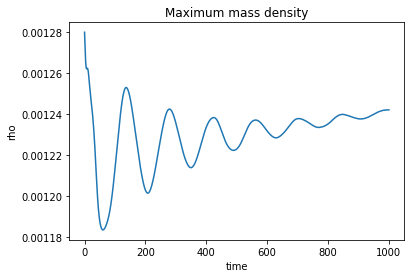

In [90]:
fig, ax = plt.subplots(1,1)
ax.plot(time, rhomax)
ax.set_title('Maximum mass density')
ax.set_xlabel('time')
ax.set_ylabel('rho')
plt.show()

Congratulations! You have setup Cactus, run your first simulations, and visualized some of the results! 

# Going Further

To learn more about Cactus, Simfactory and the Einstein Toolkit, check out these documentation pages:
- http://simfactory.org/info/documentation/userguide/index.html
- http://einsteintoolkit.org/documentation.html

Here are some articles that give an overview of the Cactus framework, Simfactory, and the Einstein Toolkit: 
- https://arxiv.org/abs/1008.4571
- https://arxiv.org/abs/1009.1341
- https://arxiv.org/abs/1111.3344